# ML Models for Paris House Price Prediction: Regression

## Table of contents
---------------------------------------------
-  Import  Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Features
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Engineering 
-  Feature Selection
-  Statistics Analysis
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
-  Predication
-  Save The Machien Learning Models 

# Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

#   Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

##      Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

##      Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##      Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#   Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

#   Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

#   Feature Selection
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.
from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for Regression tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for Regression tasks.

#   Data Splitting 
from sklearn.model_selection import train_test_split

#   sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import accuracy_score # To get the accuracy score 

#   Supervised Machine Learning Models
##      Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

##      Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

##      Histogram-based Gradient Boosting Regression Tree
from sklearn.ensemble import HistGradientBoostingRegressor

##      AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

##      Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

##      K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

##      Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

##      Linear Regressor with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDRegressor

##      XGBoost Regressor
from xgboost import XGBRegressor

##      Support Vector Machines Regressor
from sklearn.svm import SVR

##      Linear Support Vector Regression
from sklearn.svm import LinearSVR

##      Multilayer Perceptron Regressor
from sklearn.neural_network import MLPRegressor

#   Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Save and Load the Machine Learning Models 
import pickle

# Function Helper

In [2]:
'''
Read Dataset
'''
def CSV_File(path): 

    df_csv = pd.read_csv(path)

    return df_csv


'''
Drop Varibales
'''
def DropVariables(dfDrop, col):

    dfDrop = dfDrop.drop(col, axis=1)

    return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):

    for colu in col :
        old_data_type = Con_df_str[colu].dtype
        Con_df_str[colu] = Con_df_str[colu].apply(str)
        print ('\nData Type for Variable:',[colu], ', Changed From',old_data_type, 'to',Con_df_str[colu].dtype)

    return Con_df_str
      
'''
Missong Value Information
'''
def missing_values(df_missing_value_per):

    missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

    return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):

    print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
        colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):

    null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
    
    return null_data

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):

    Obj = df_split.select_dtypes(include = ['object'])
    Num = df_split.select_dtypes(include = np.number) 

    return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):
            fig = px.histogram(df_EDA, x=target)
            fig.show()
            

def EDA_target2(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):

            df_EDA.boxplot(column=target, figsize=(40, 30))
            plt.show()

def obj_EDA(df_EDA, cols):

    for col in cols:
        table = pd.DataFrame(df_EDA[col].value_counts())
        print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
        plt.figure(figsize = (30, 20))
        df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
        plt.title(col)
        plt.show()

def EDA_obj(df_EDA, cols, Target):

    for col in cols:
        print('Variable Name: ', df_EDA[col].name)
        pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):

    for col in cols: 
        fig, ax = plt.subplots(figsize=(30, 20))
        df_EDA.hist(column=[col], ax=ax )

def EDA_num_2(df_EDA, cols):

    for col in cols: 
        df_EDA.boxplot(column=col, figsize=(30, 20))
        plt.show()
    
def EDA_num_with_DV(df_eda, NUMcols_eda, target): 

    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue = target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):

    for col in list(dataframe_series.columns):
        if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'): # and (col != target):
                print ('\nStandardization Applied On:', col)
                dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

    return dataframe_series
      
'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le_orig = preprocessing.LabelEncoder()

    df_old = dataframe_series.copy(deep = False)

    if dataframe_series.dtype=='object':
        col = dataframe_series.name

        dataframe_series = le.fit_transform(dataframe_series)
        print('\nLable Encoding Applied On:', col)

        le.fit(dataframe_series)
        print('New Value for',col,' Variable:', le.classes_)

        le_orig.fit(df_old)
        print('Old Value for',col,'Variable:', le_orig.classes_)

    return dataframe_series

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):

    # Split the df into Obj and Num
    obj, num = Data_Splitting_Num_Obj(df_forward)

    list_df_num = list(num.columns)
    if target not in list_df_num: 
        list_df_num.append(target)
    print('All the Num Variables:',list_df_num)

    list_df_Obj = list(obj.columns)
    print('\nAll the obj Variables:',list_df_Obj)

    # Create New DataFrame Hvae only the Num Variables
    df_num = df_forward[list_df_num]

    # define dataset
    X = df_num.drop(target, axis=1)
    y = df_num[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forward_FS = SequentialFeatureSelector(RandomForestRegressor(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                k_features= (1, X.shape[1]),
                                                                forward=True,
                                                                floating=False,
                                                                scoring = 'neg_mean_squared_error', # mean_squared_error, neg_mean_squared_error
                                                                verbose=2,
                                                                cv= 5
                ).fit(X_train, y_train)

    new_list_num = list(forward_FS.k_feature_names_)

    print ('\nMost Variables Can Effect The Target Variables: ',new_list_num)
    print ('\nWith Highest Score: ',forward_FS.k_score_)

    
    if target not in new_list_num: 
        new_list_num.append(target)
    print('\nAll the Variables Selected: ',new_list_num)

    new_df_list = new_list_num + list_df_Obj
    df_forward = df_forward[new_df_list]

    forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

    return df_forward, forward_FS

def Save_ML(ML_Name, _ml):

    i = 0 

    for ML in ML_Name:

        with open(ML, "wb") as file:
            
            print(f'Create file name {ML}')

            pickle.dump(_ml[i], file)
            print('Model:', _ml[i], 'Saved\n')

        i += 1  

# Import Dataset & Data Description

## Import Dataset

In [3]:
Path = '/content/ParisHousing.csv'
file_type = 'C'

if file_type == 'C':
    df = CSV_File(Path)

In [4]:
pd.DataFrame(df.head(10))

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.500
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.500
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.100
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.200
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.000
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.200
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.500
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.300
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.200
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.100


## Data Description

# Data Understanding

In [5]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [7]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+-------------------+---------+-----------------+-----------------+---------+----------------+-----------------+-----------------+-----------------+
|                   |   count |            mean |             std |     min |            25% |             50% |             75% |             max |
|-------------------+---------+-----------------+-----------------+---------+----------------+-----------------+-----------------+-----------------|
| squareMeters      |   10000 | 49870.1         | 28774.4         |    89   | 25098.5        | 50105.5         | 74609.8         | 99999           |
| numberOfRooms     |   10000 |    50.3584      |    28.8167      |     1   |    25          |    50           |    75           |   100           |
| hasYard           |   10000 |     0.5087      |     0.499949    |     0   |     0          |     1           |     1           |     1           |
| hasPool           |   10000 |     0.4968      |     0.500015    |     0   |     0          |     0      

In [8]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

In [9]:
pd.DataFrame(df.var())

,0
squareMeters,827964676.800
numberOfRooms,830.402
hasYard,0.250
hasPool,0.250
floors,834.584
cityCode,841387240.925
cityPartRange,8.249
numPrevOwners,8.161
made,86.641
isNewBuilt,0.250


# Select the Features

In [10]:
'''
                1)        Target Varibale
'''
target = 'price'

'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable Need to Drop
col_drop = [ 
        
            'cityCode'

        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  
                    
                    'hasYard', 'hasPool', 'floors', 'numPrevOwners', 
                    'made', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom', 
                    'hasGuestRoom'
                ]



Drop_All_Missing = 'Enable' 


'''
                7)        Data Transformation
'''
DT = 'StandardScaler' 


'''
                8)        Featuers Selection And Featuers Engineering
'''
# Featuers
FE = 'LableEncodeing' 
FS = 'Forward' 

'''
                10)        Data Splitting
'''
# Randomly
Random = 'Enable'
Split_size = 0.2 # Testing Size
Randon_state_size = 42
'''
                11)        Machine Learning Models 
'''
ML_ST = 'Enable'

'''  
                12)        Machine Learning Optimization 
'''
ML_OP = 'Enable'

# Data Pre-Processing

## Drop Varibales 

In [11]:
if drop == 'Enable': 
    df = DropVariables(df, col_drop)
    print(col_drop,'Droped\n')
    
print(tabulate(df.info(), headers = 'keys', tablefmt = 'psql'))

['cityCode'] Droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  int64  
 9   hasStormProtector  10000 non-null  int64  
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  int64  
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
dtypes:

## Convert Data Type

In [12]:
if convert_to_str == 'Enable': 
    df = Convert_Data_Typt_to_str(df,col_convert_str)


Data Type for Variable: ['hasYard'] , Changed From int64 to object

Data Type for Variable: ['hasPool'] , Changed From int64 to object

Data Type for Variable: ['floors'] , Changed From int64 to object

Data Type for Variable: ['numPrevOwners'] , Changed From int64 to object

Data Type for Variable: ['made'] , Changed From int64 to object

Data Type for Variable: ['isNewBuilt'] , Changed From int64 to object

Data Type for Variable: ['hasStormProtector'] , Changed From int64 to object

Data Type for Variable: ['hasStorageRoom'] , Changed From int64 to object

Data Type for Variable: ['hasGuestRoom'] , Changed From int64 to object


## Missing Value

In [13]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

### Drop Missing Value

In [14]:
if Drop_All_Missing == 'Enable':
    df = df.dropna()
    df = df.reset_index()
    df = df.drop(columns=['index'])
    missing_values_info(df)

Missing Values for Catuogirical Dataset:
                   Missing_Number  Missing_Percent
squareMeters                    0            0.000
numberOfRooms                   0            0.000
hasYard                         0            0.000
hasPool                         0            0.000
floors                          0            0.000
cityPartRange                   0            0.000
numPrevOwners                   0            0.000
made                            0            0.000
isNewBuilt                      0            0.000
hasStormProtector               0            0.000
basement                        0            0.000
attic                           0            0.000
garage                          0            0.000
hasStorageRoom                  0            0.000
hasGuestRoom                    0            0.000
price                           0            0.000
-------------------------------------------------------------------------------


# Exploratory Data Analysis (EDA)

In [15]:
NUMcols = df.select_dtypes(np.number).columns
NUMcols = NUMcols.drop(target)

Objcols = df.select_dtypes(include = ['object']).columns

## Dependent Variables

In [16]:
EDA_target(df, target)

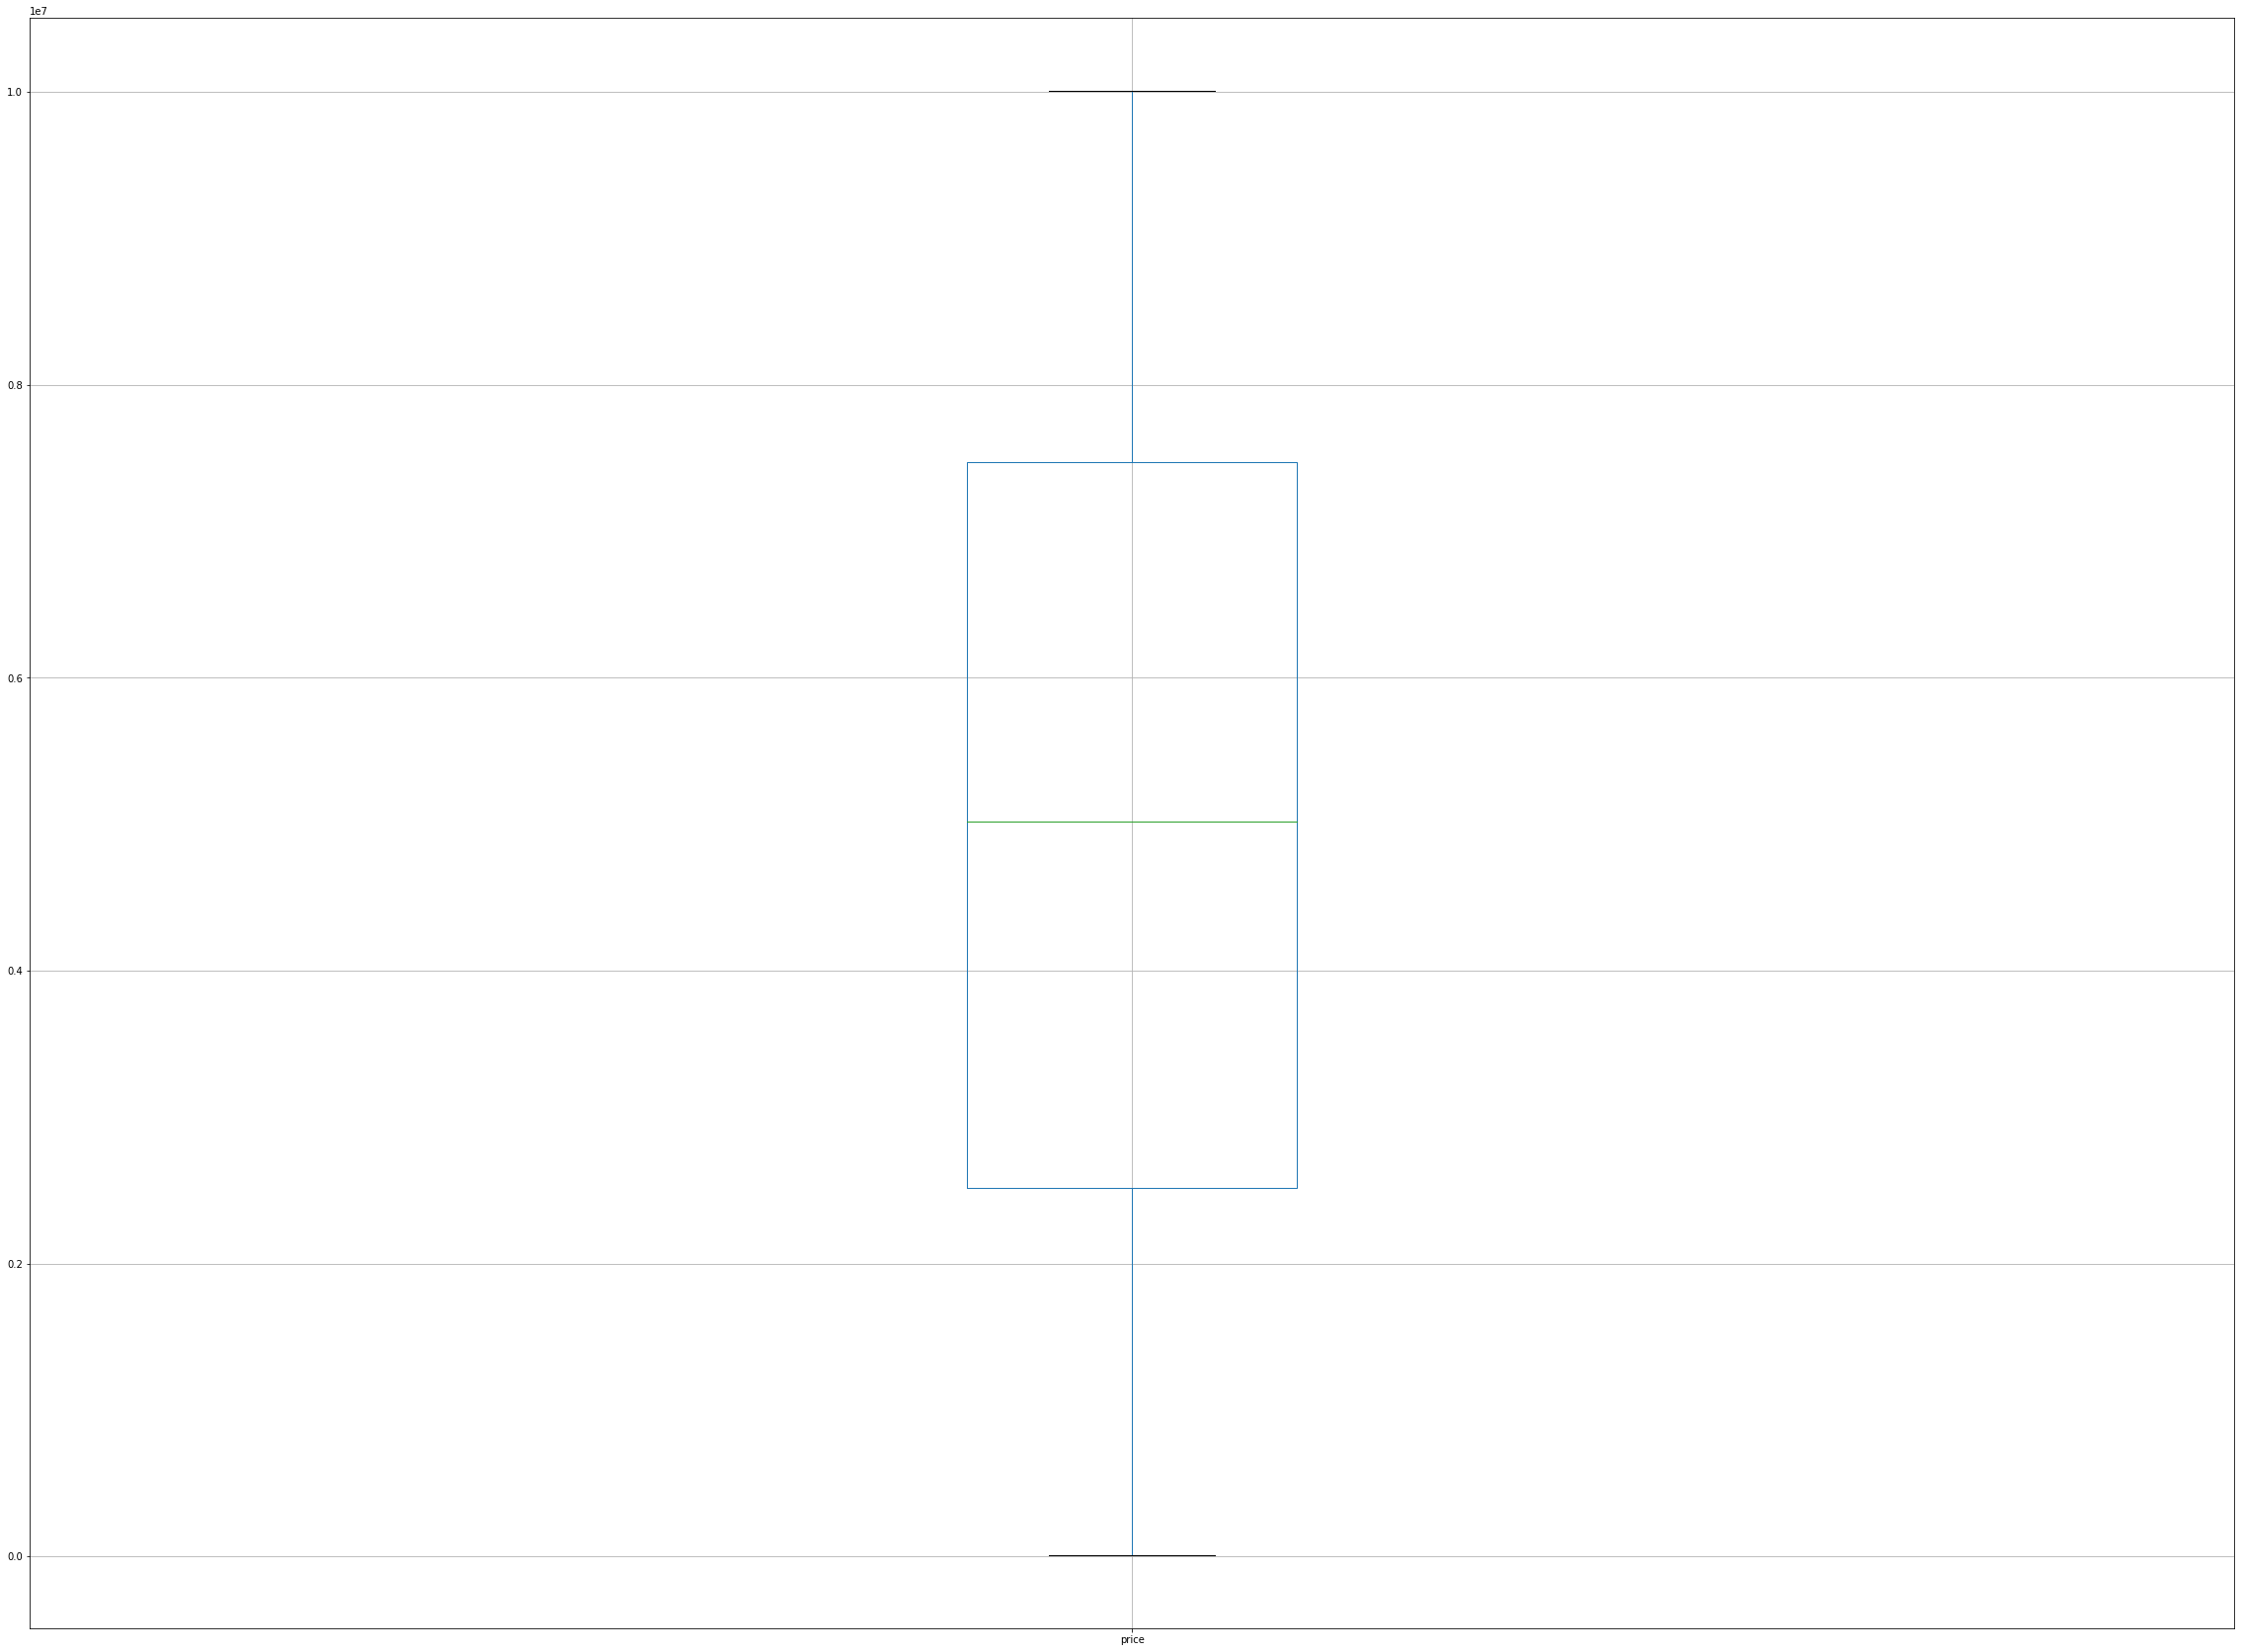

In [17]:
EDA_target2(df, target)

## Independent Dependent Variables

### Independent Dependent Variables (Object Variables) 

+----+-----------+
|    |   hasYard |
|----+-----------|
|  1 |      5087 |
|  0 |      4913 |
+----+-----------+


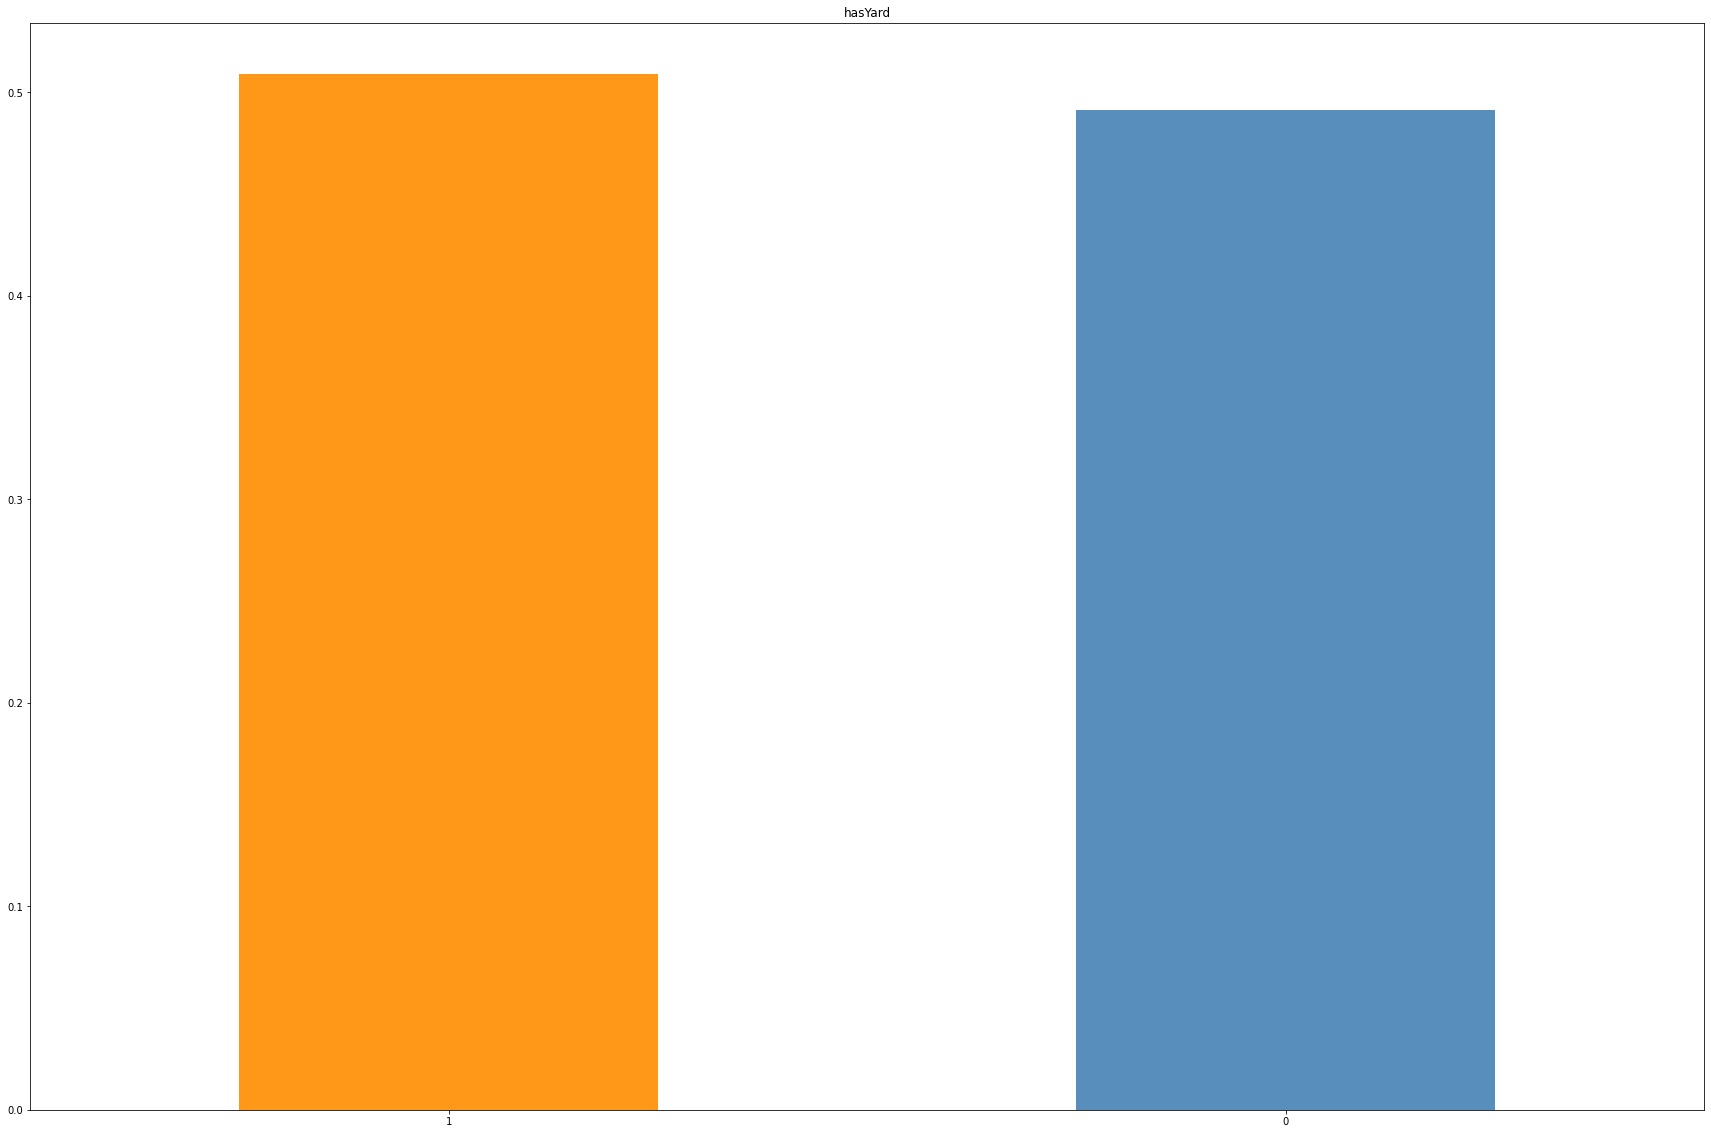

+----+-----------+
|    |   hasPool |
|----+-----------|
|  0 |      5032 |
|  1 |      4968 |
+----+-----------+


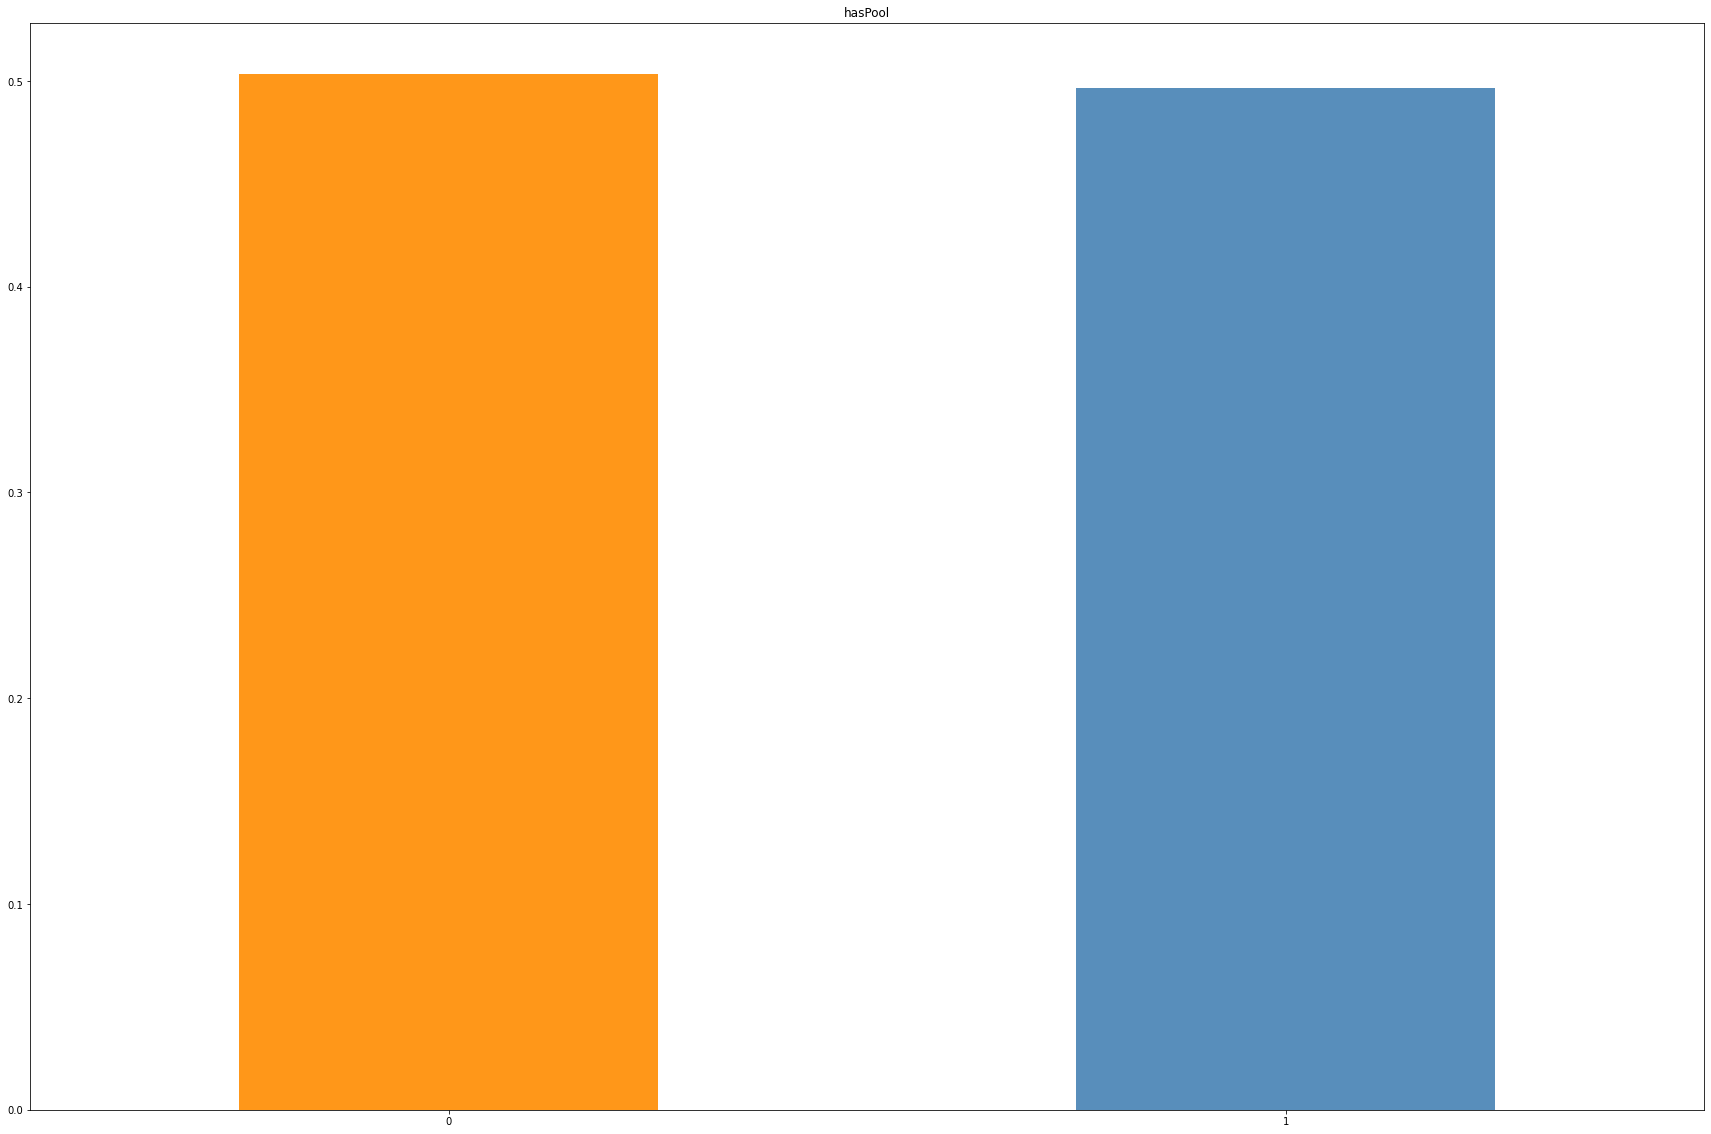

+-----+----------+
|     |   floors |
|-----+----------|
|  97 |      126 |
|  55 |      122 |
|  77 |      117 |
|  28 |      116 |
|   3 |      116 |
|  34 |      115 |
|  80 |      115 |
|  18 |      114 |
|  46 |      114 |
|  93 |      113 |
|  21 |      112 |
|  98 |      111 |
|  37 |      111 |
|  54 |      111 |
|  83 |      110 |
|  79 |      110 |
|  41 |      110 |
|  51 |      109 |
|  29 |      109 |
|  27 |      108 |
|   4 |      107 |
|  53 |      107 |
|  14 |      107 |
|  99 |      107 |
|  24 |      106 |
|  44 |      106 |
|   9 |      106 |
|  68 |      106 |
|  32 |      105 |
|   6 |      105 |
|  82 |      105 |
|  13 |      105 |
|  60 |      105 |
|   8 |      104 |
|  64 |      104 |
|  23 |      104 |
|  73 |      103 |
|  59 |      103 |
|  89 |      103 |
|  84 |      103 |
|  31 |      103 |
|  25 |      103 |
|  81 |      102 |
|  39 |      102 |
|   2 |      101 |
|  66 |      101 |
|  72 |      100 |
|  43 |      100 |
|  69 |      100 |
|  87 |     

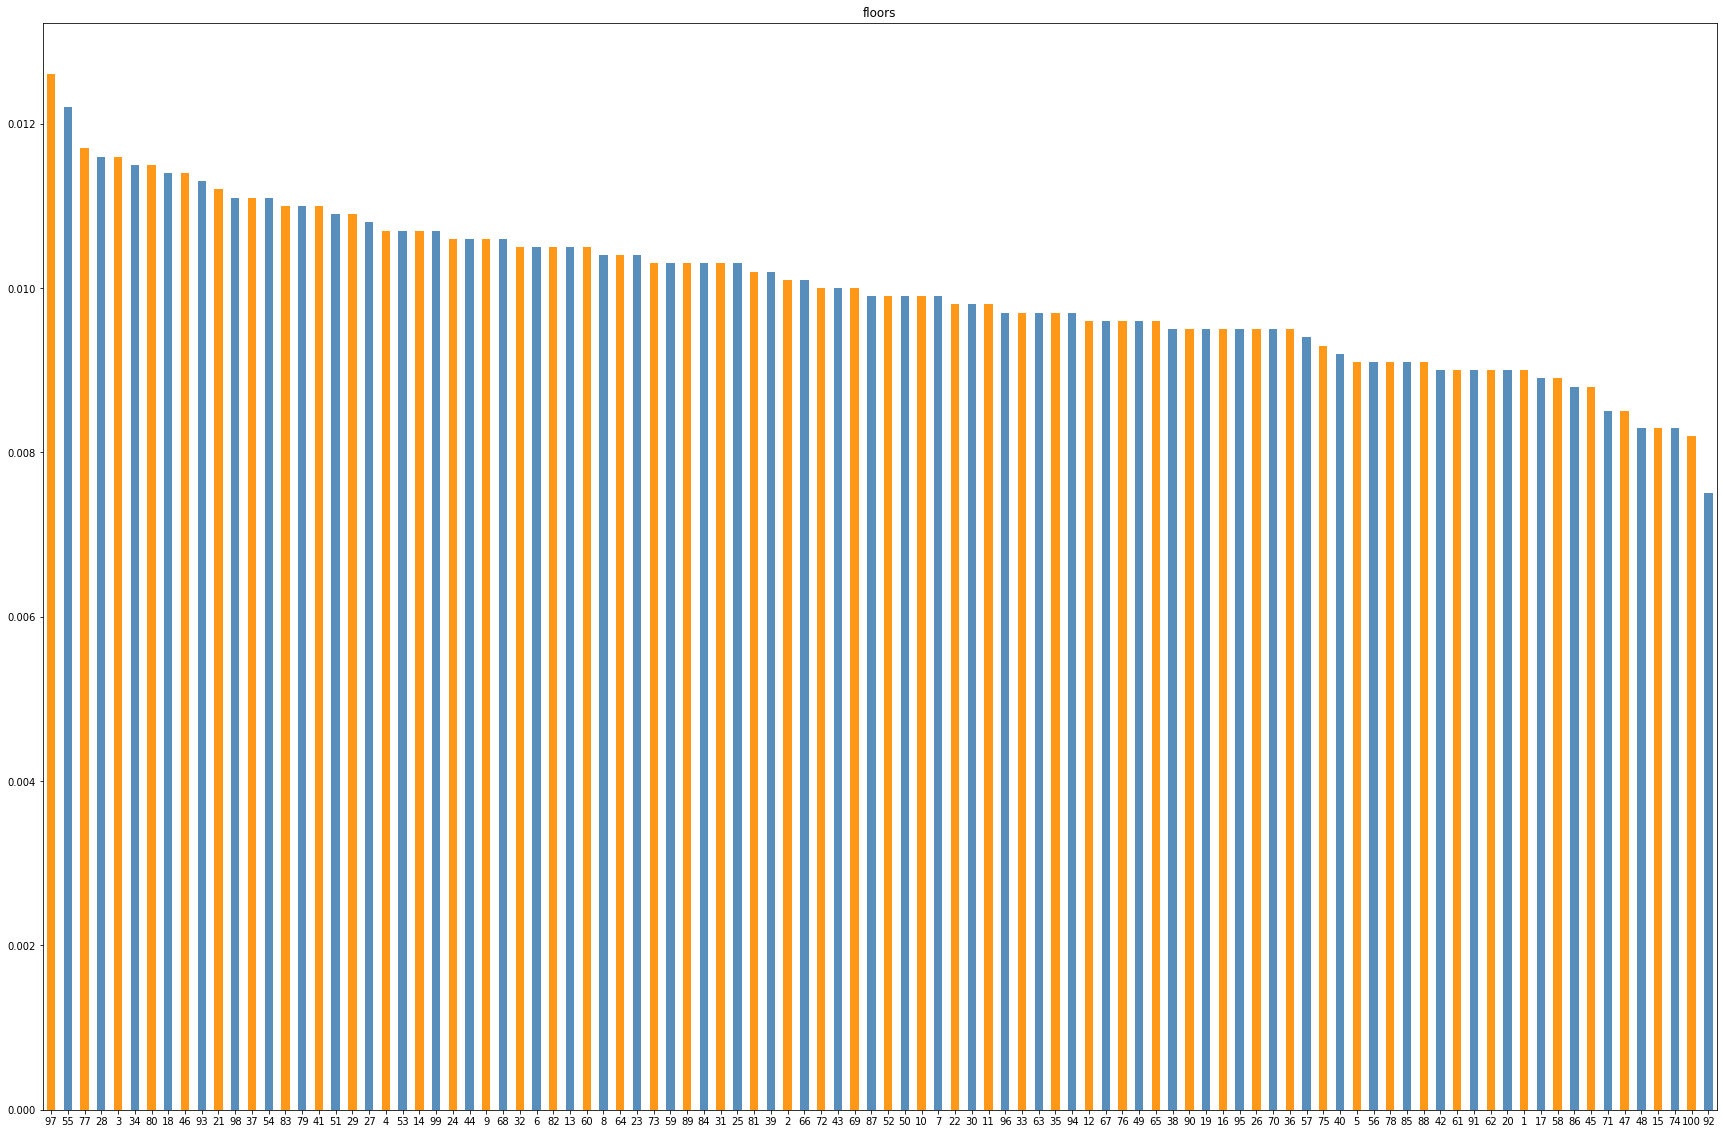

+----+-----------------+
|    |   numPrevOwners |
|----+-----------------|
|  4 |            1043 |
|  9 |            1036 |
|  5 |            1036 |
|  6 |            1011 |
| 10 |             999 |
|  3 |             991 |
|  2 |             987 |
|  7 |             974 |
|  8 |             971 |
|  1 |             952 |
+----+-----------------+


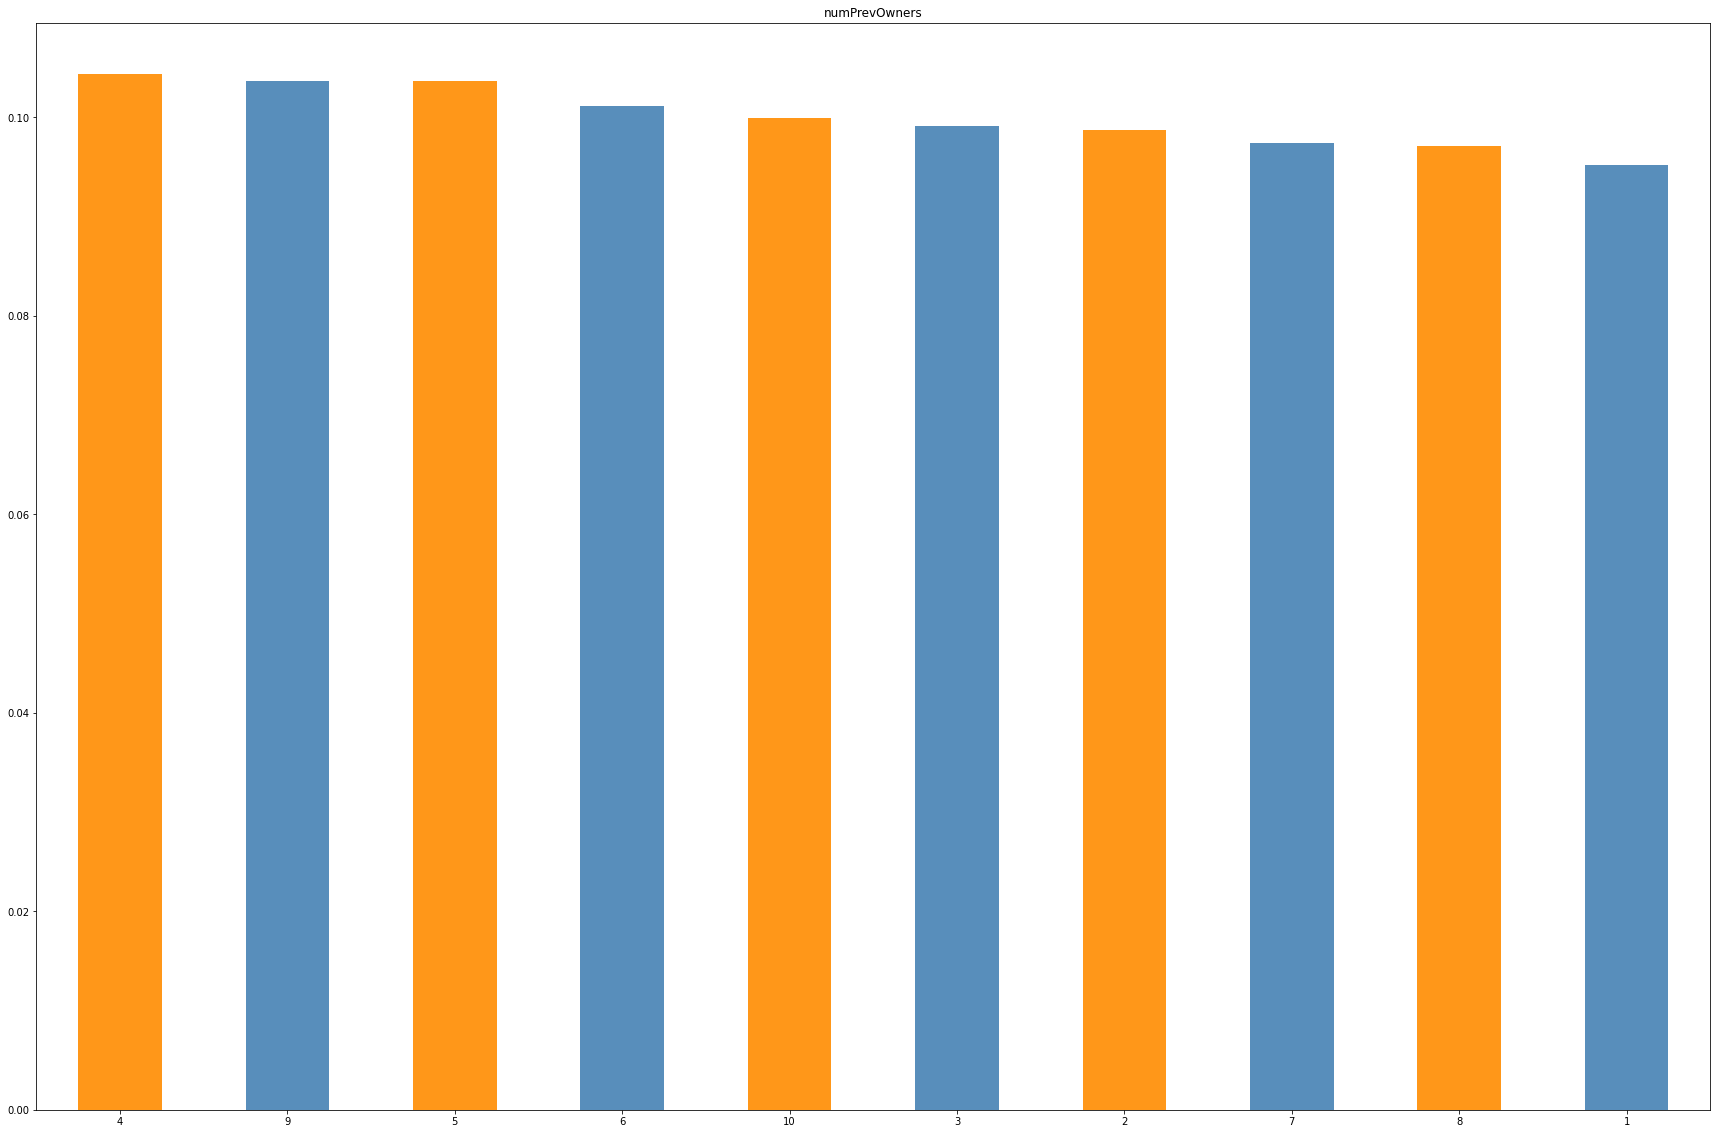

+------+--------+
|      |   made |
|------+--------|
| 1992 |    356 |
| 2013 |    352 |
| 2020 |    336 |
| 2018 |    334 |
| 2003 |    332 |
| 2001 |    332 |
| 1996 |    327 |
| 1991 |    324 |
| 2009 |    324 |
| 2011 |    321 |
| 2019 |    321 |
| 1993 |    320 |
| 1998 |    318 |
| 1990 |    317 |
| 1994 |    312 |
| 2014 |    312 |
| 2004 |    307 |
| 2016 |    307 |
| 2012 |    305 |
| 2015 |    305 |
| 2021 |    304 |
| 2007 |    302 |
| 2008 |    302 |
| 1997 |    296 |
| 2006 |    296 |
| 2005 |    296 |
| 2000 |    295 |
| 1999 |    293 |
| 2010 |    291 |
| 2002 |    290 |
| 2017 |    288 |
| 1995 |    285 |
+------+--------+


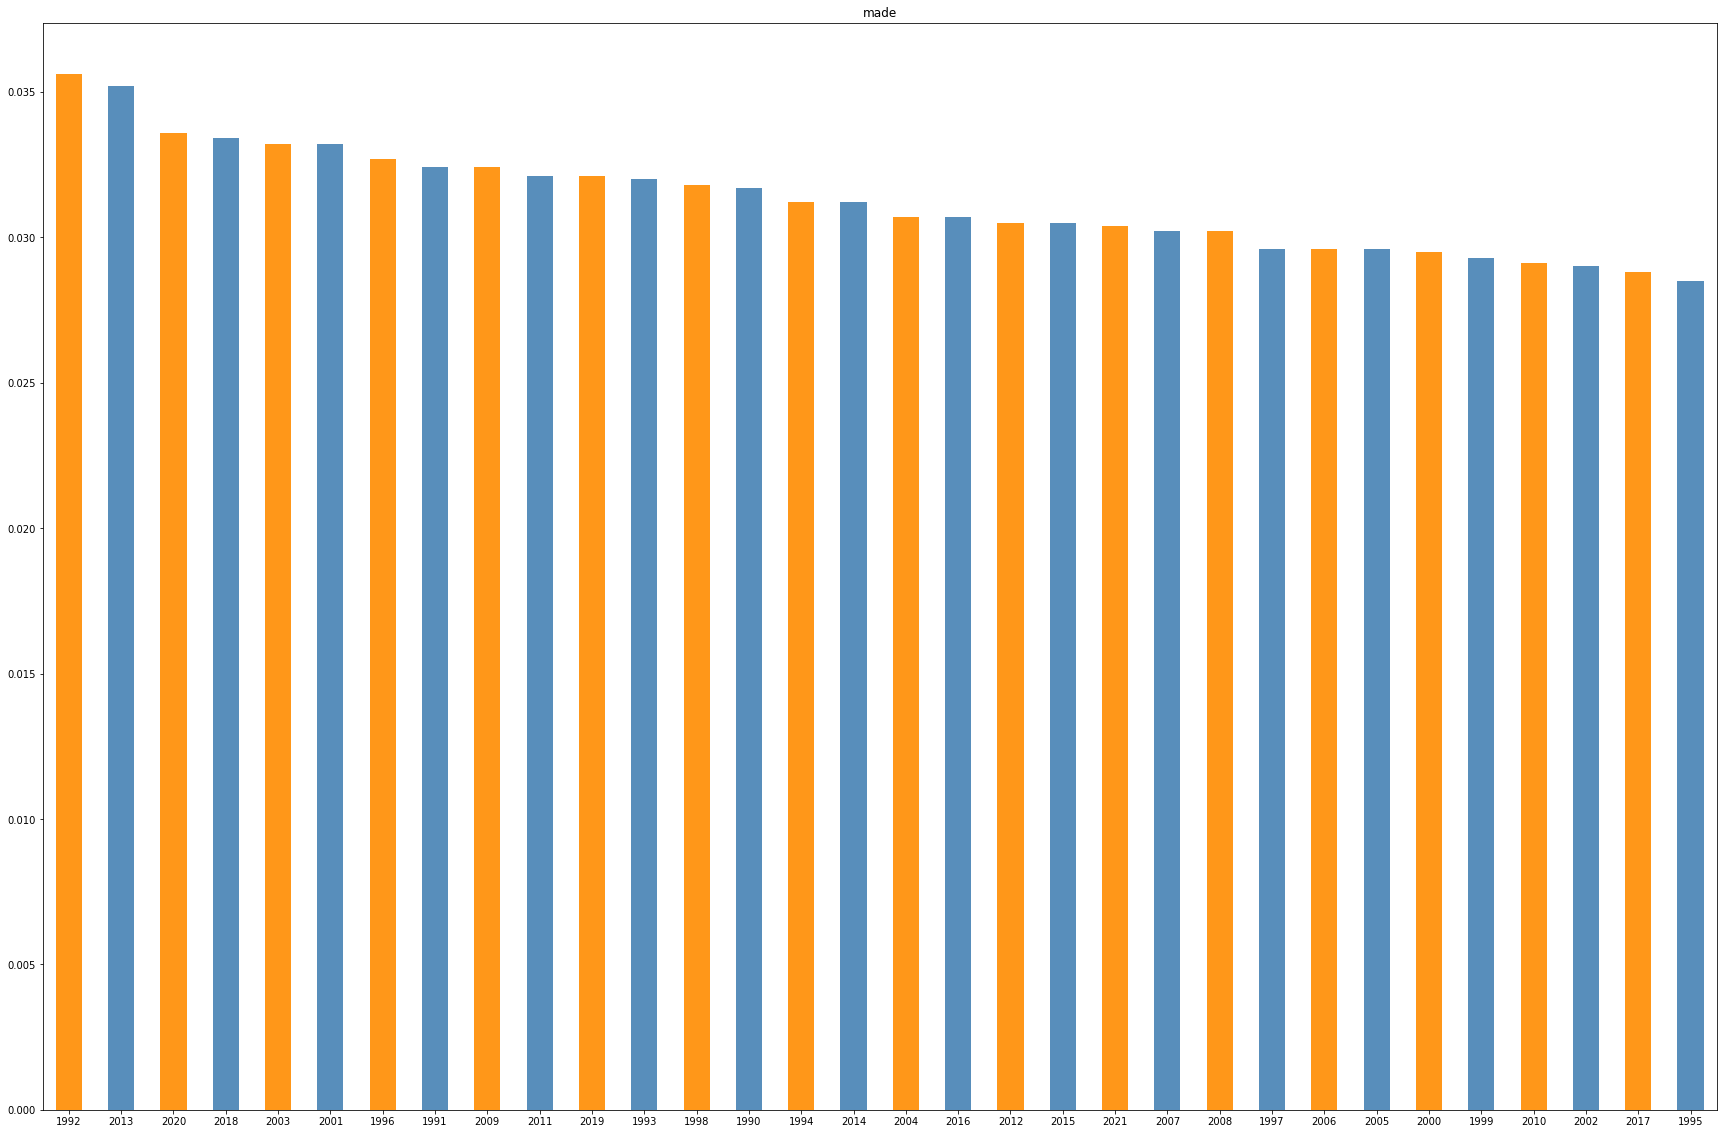

+----+--------------+
|    |   isNewBuilt |
|----+--------------|
|  0 |         5009 |
|  1 |         4991 |
+----+--------------+


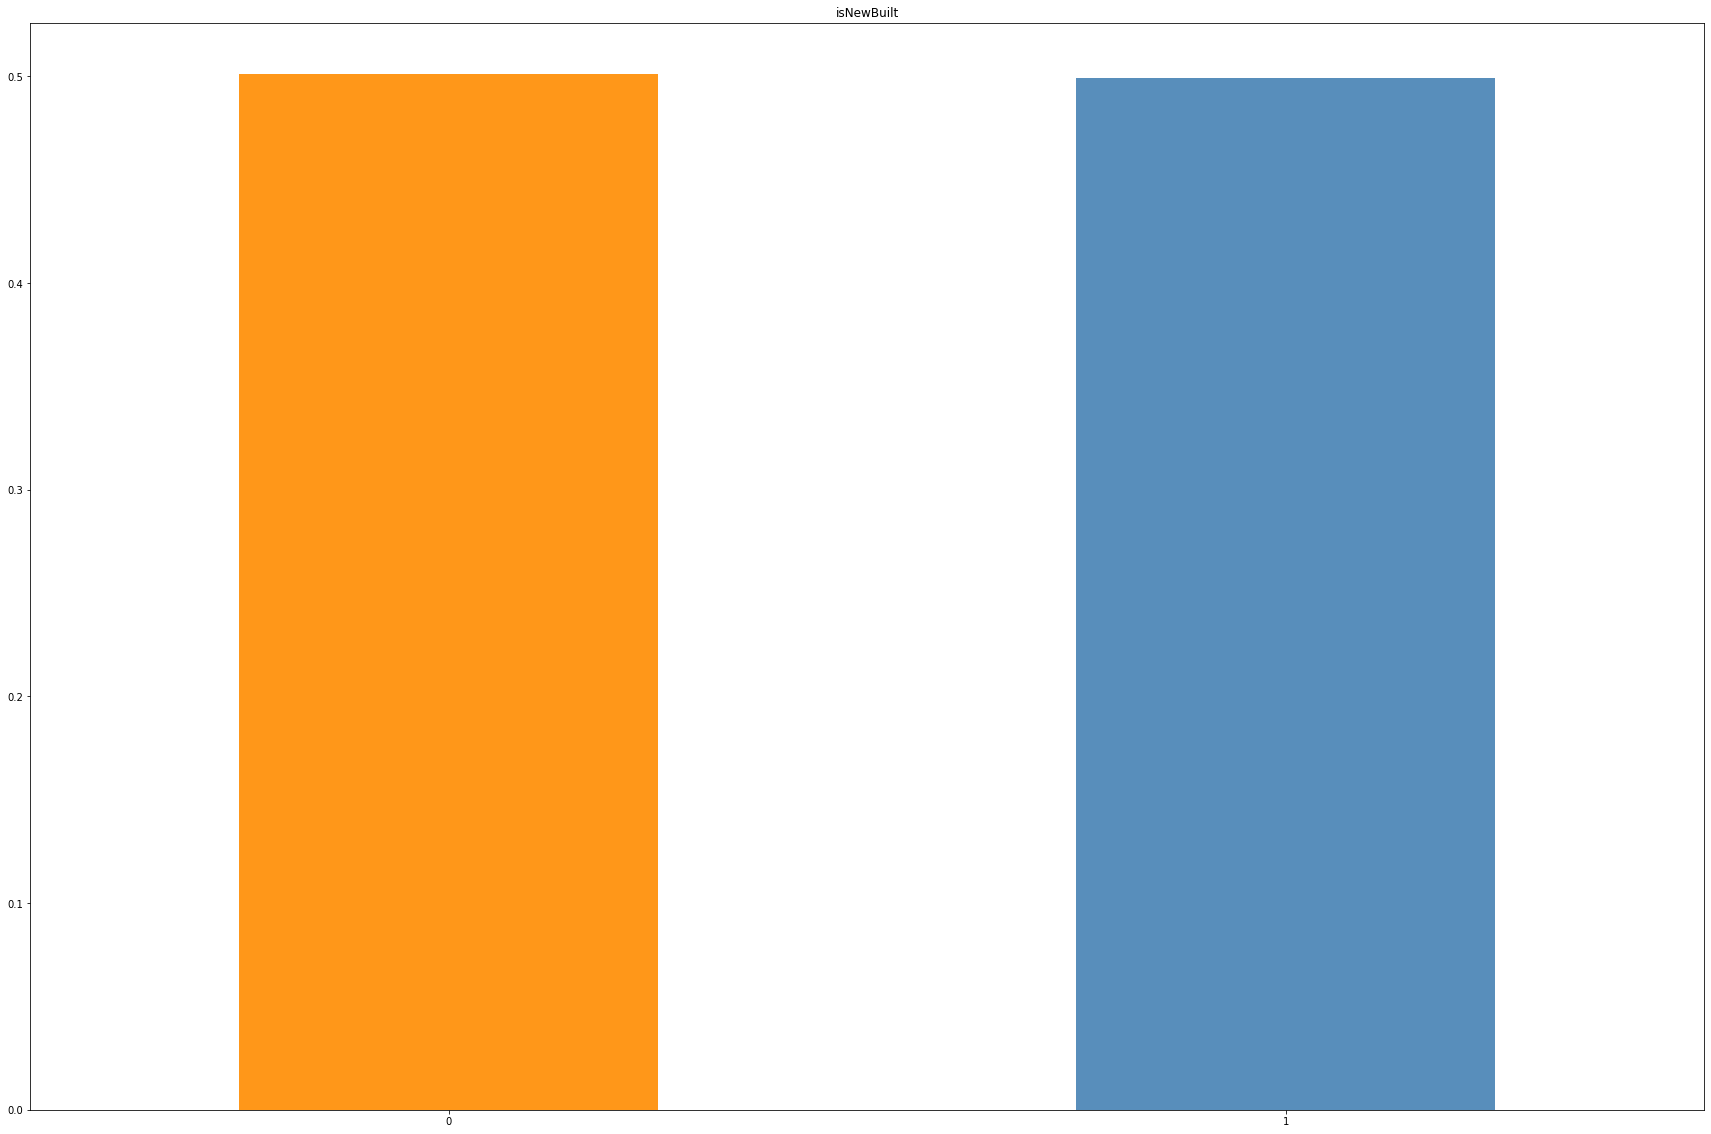

+----+---------------------+
|    |   hasStormProtector |
|----+---------------------|
|  0 |                5001 |
|  1 |                4999 |
+----+---------------------+


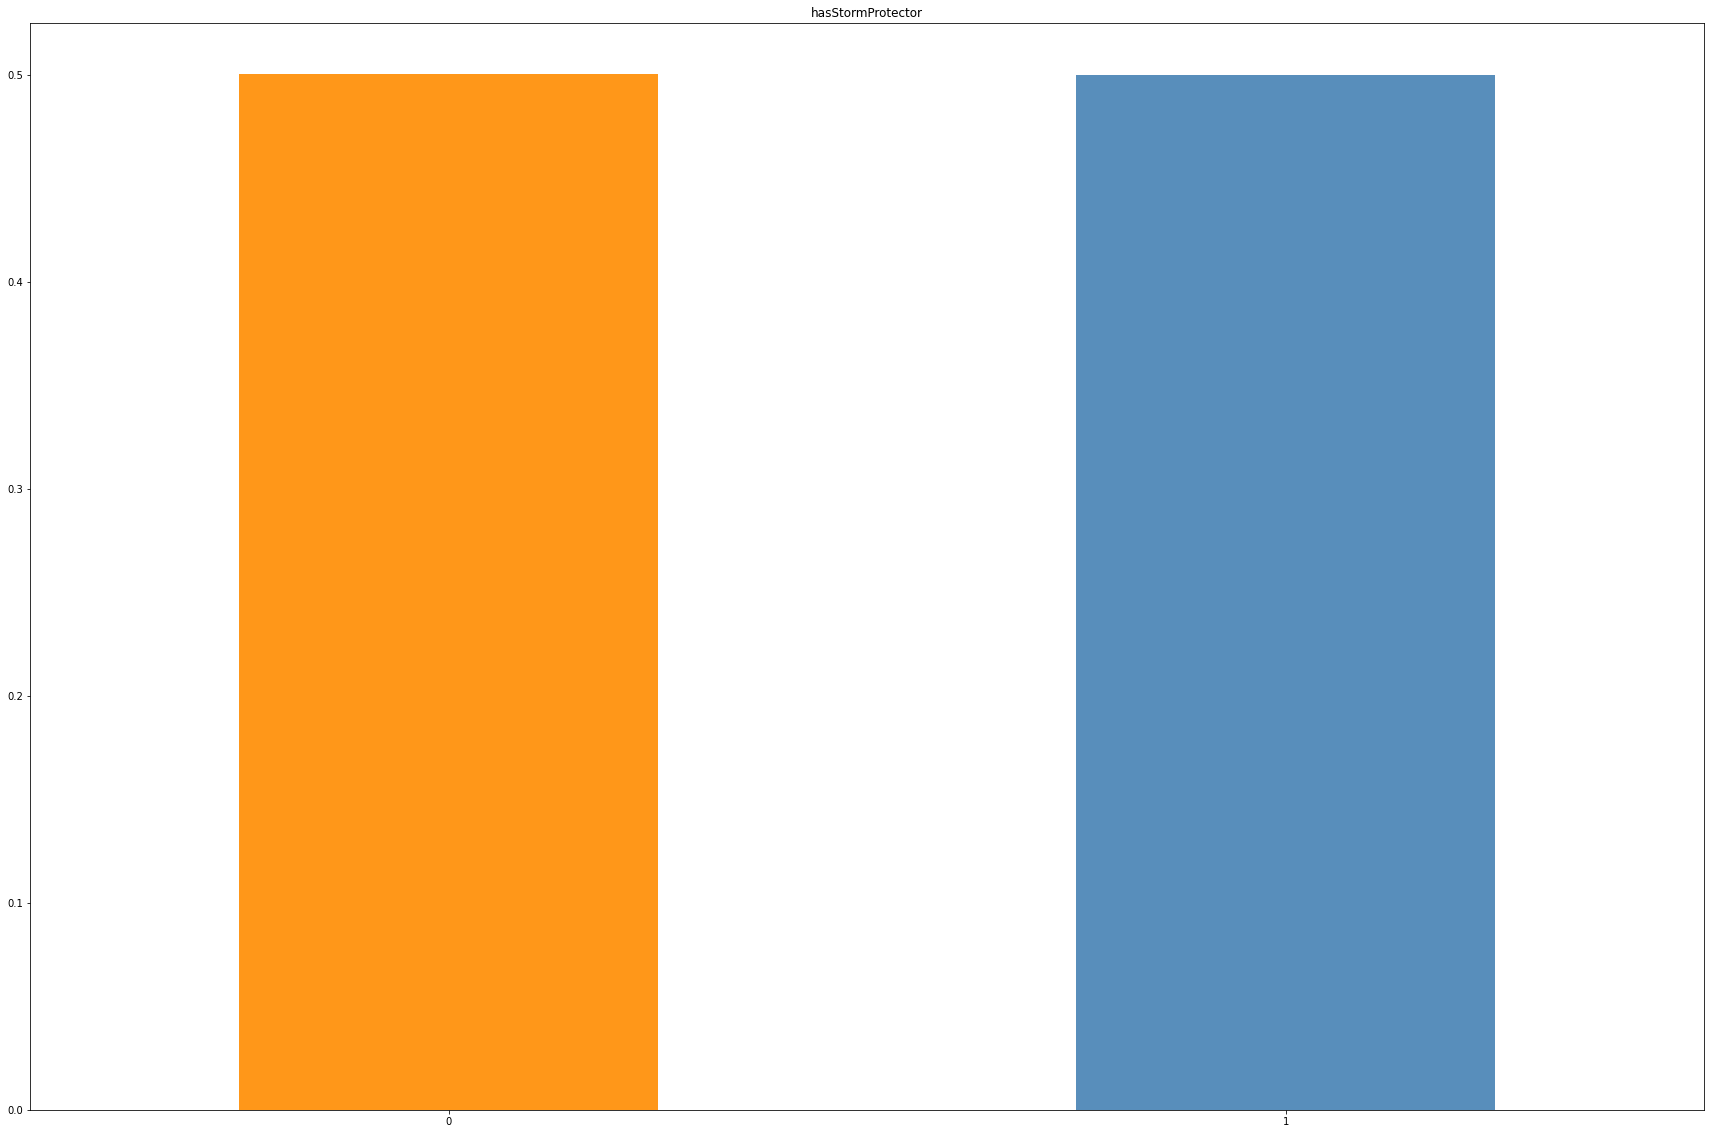

+----+------------------+
|    |   hasStorageRoom |
|----+------------------|
|  1 |             5030 |
|  0 |             4970 |
+----+------------------+


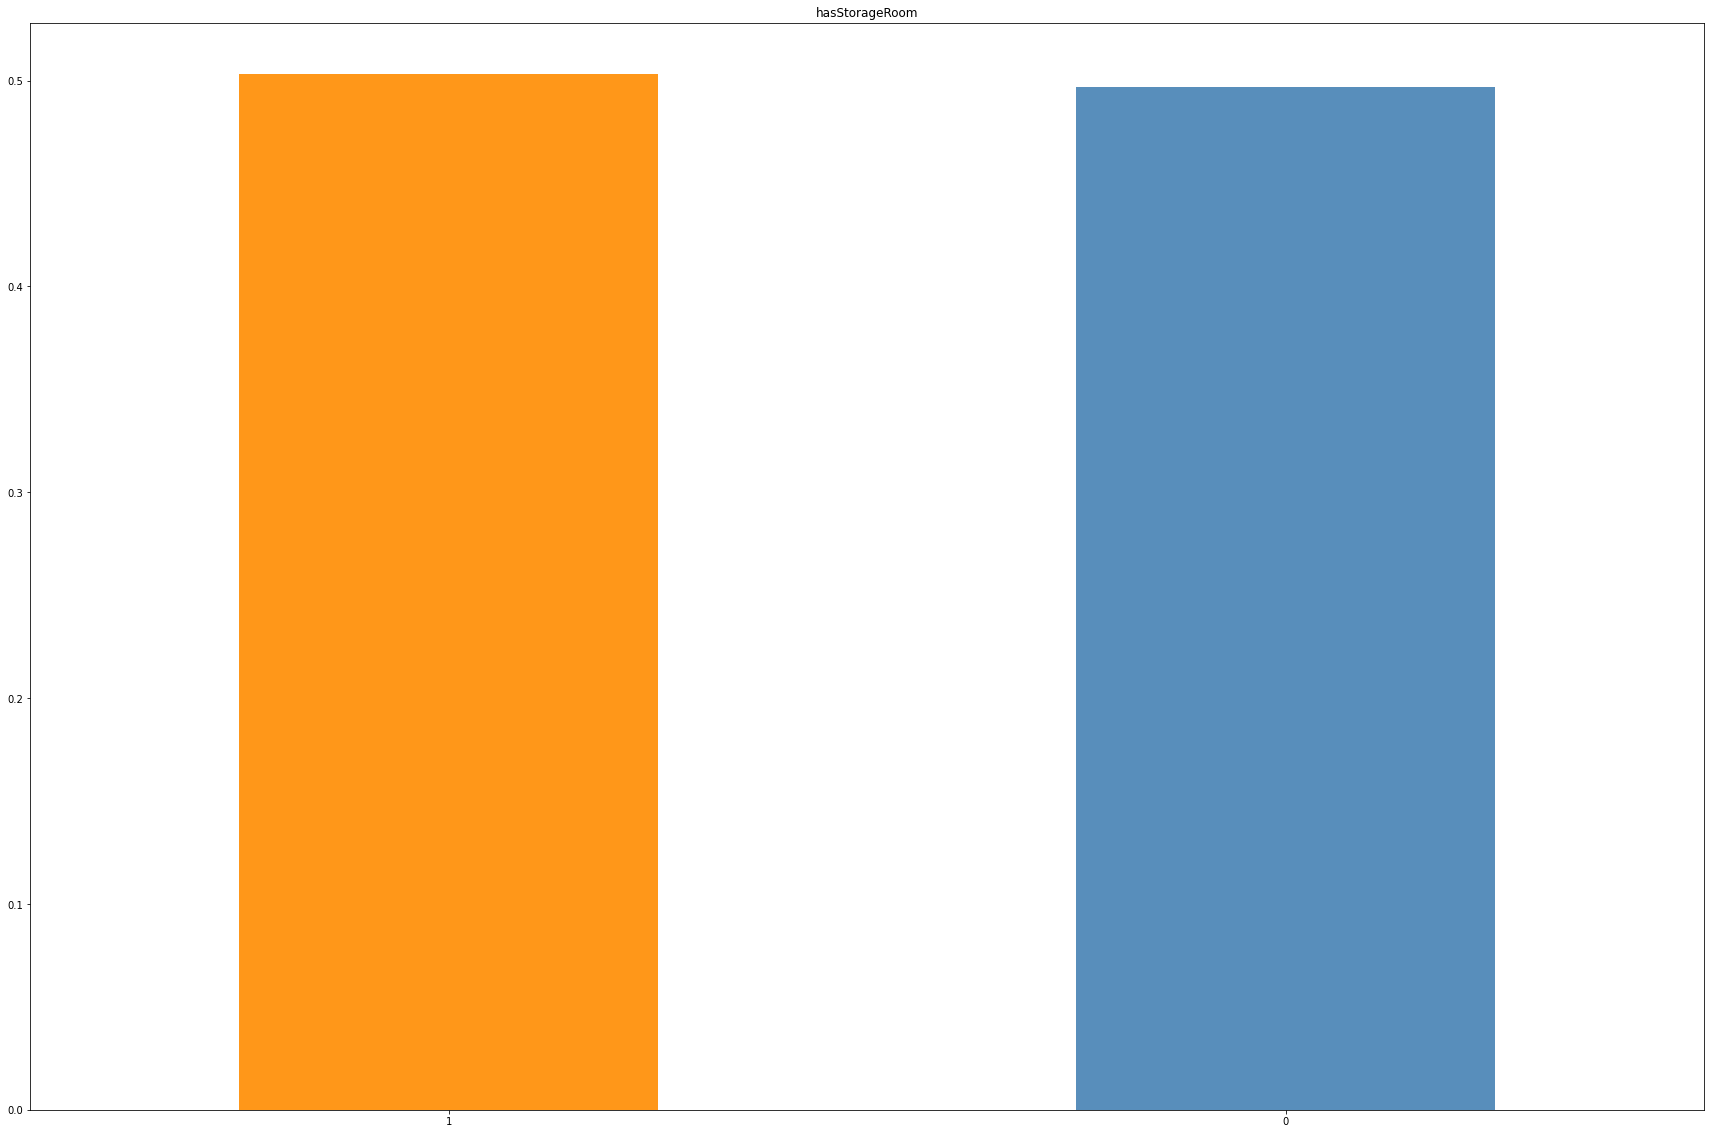

+----+----------------+
|    |   hasGuestRoom |
|----+----------------|
|  2 |            942 |
| 10 |            926 |
|  9 |            916 |
|  0 |            914 |
|  8 |            913 |
|  4 |            911 |
|  1 |            910 |
|  3 |            906 |
|  6 |            904 |
|  7 |            884 |
|  5 |            874 |
+----+----------------+


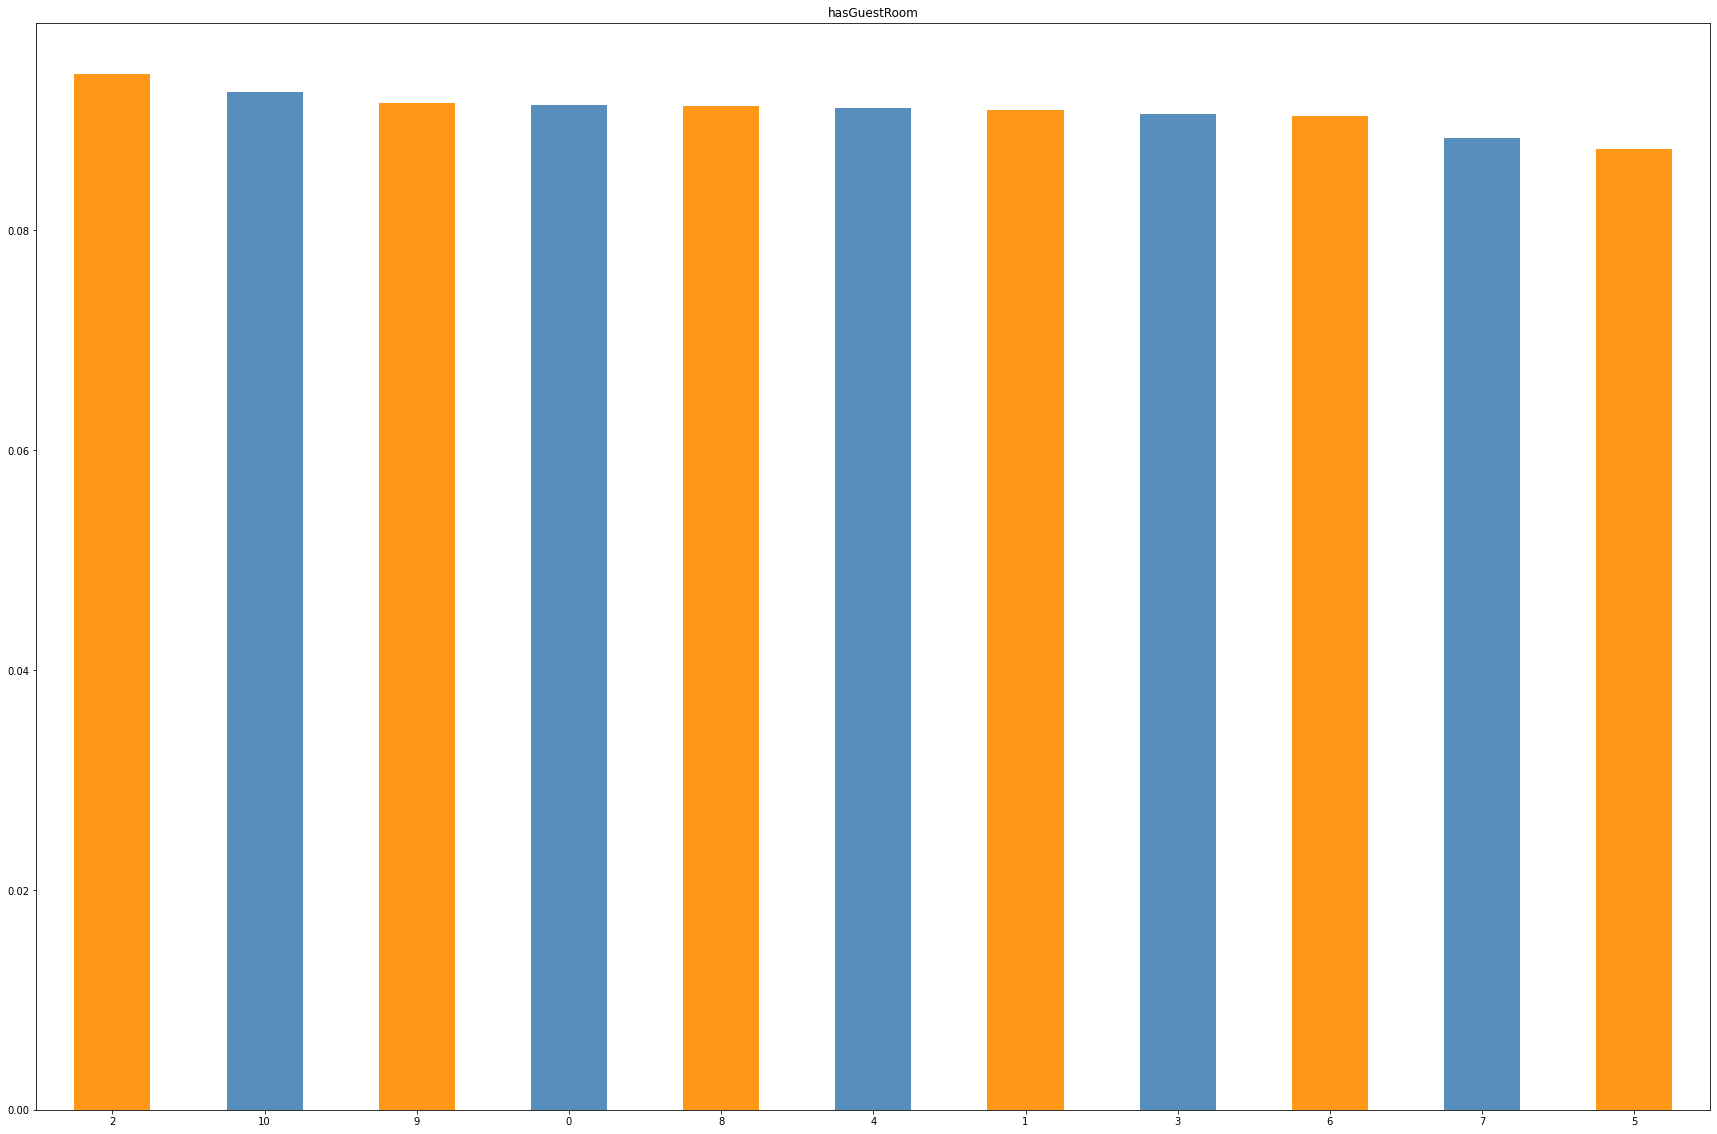

In [18]:
obj_EDA(df, Objcols)

### Independent Dependent Variables (Numerical)

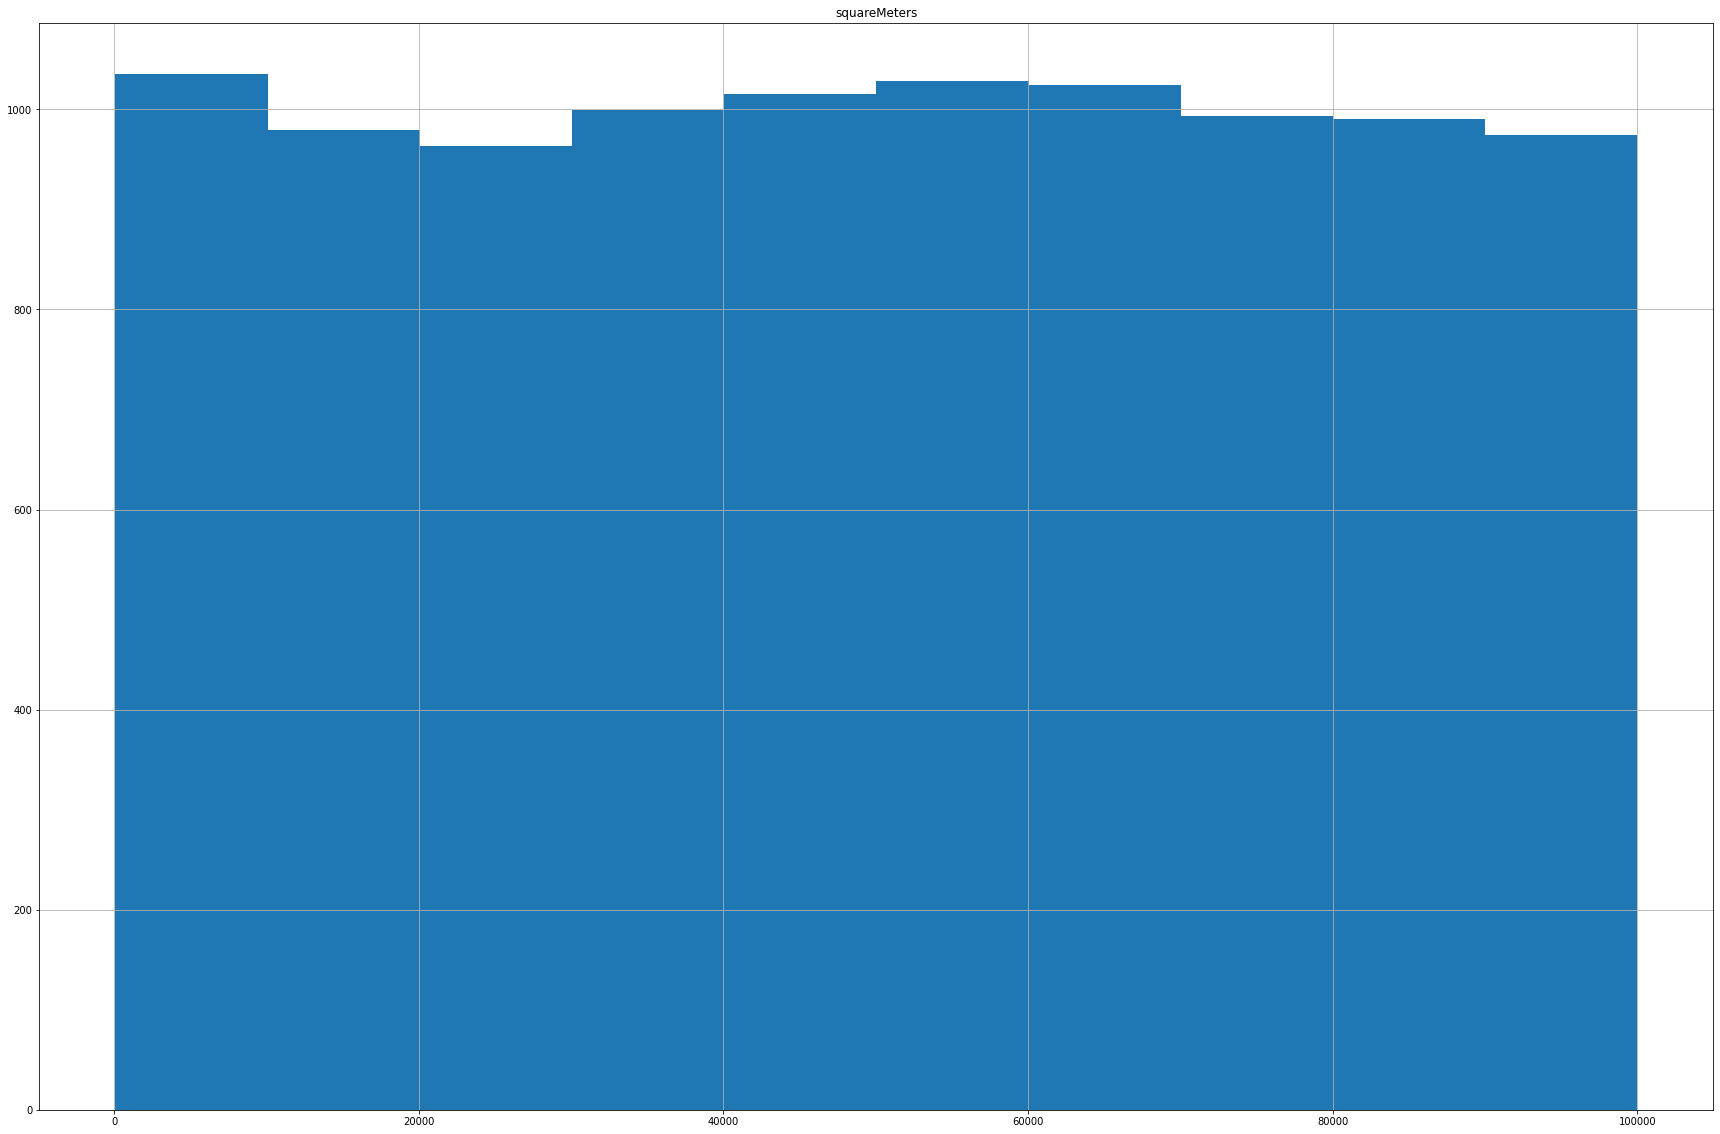

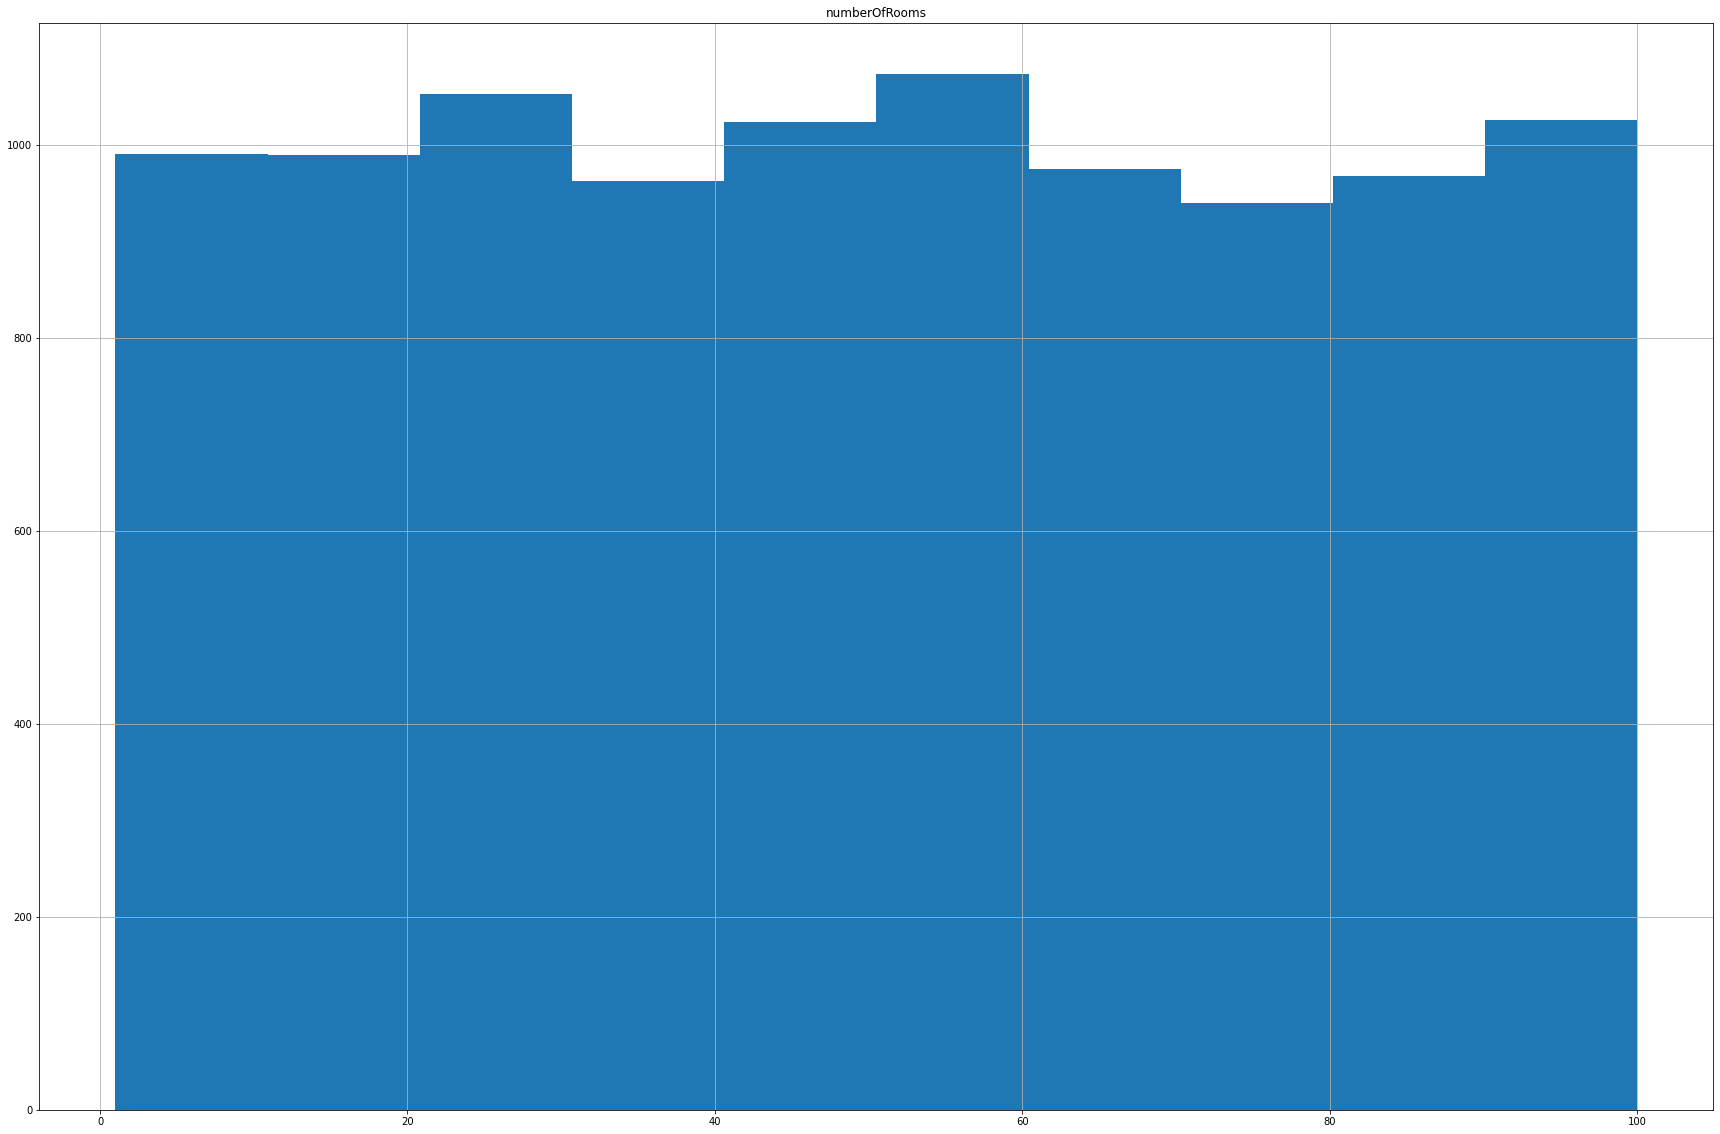

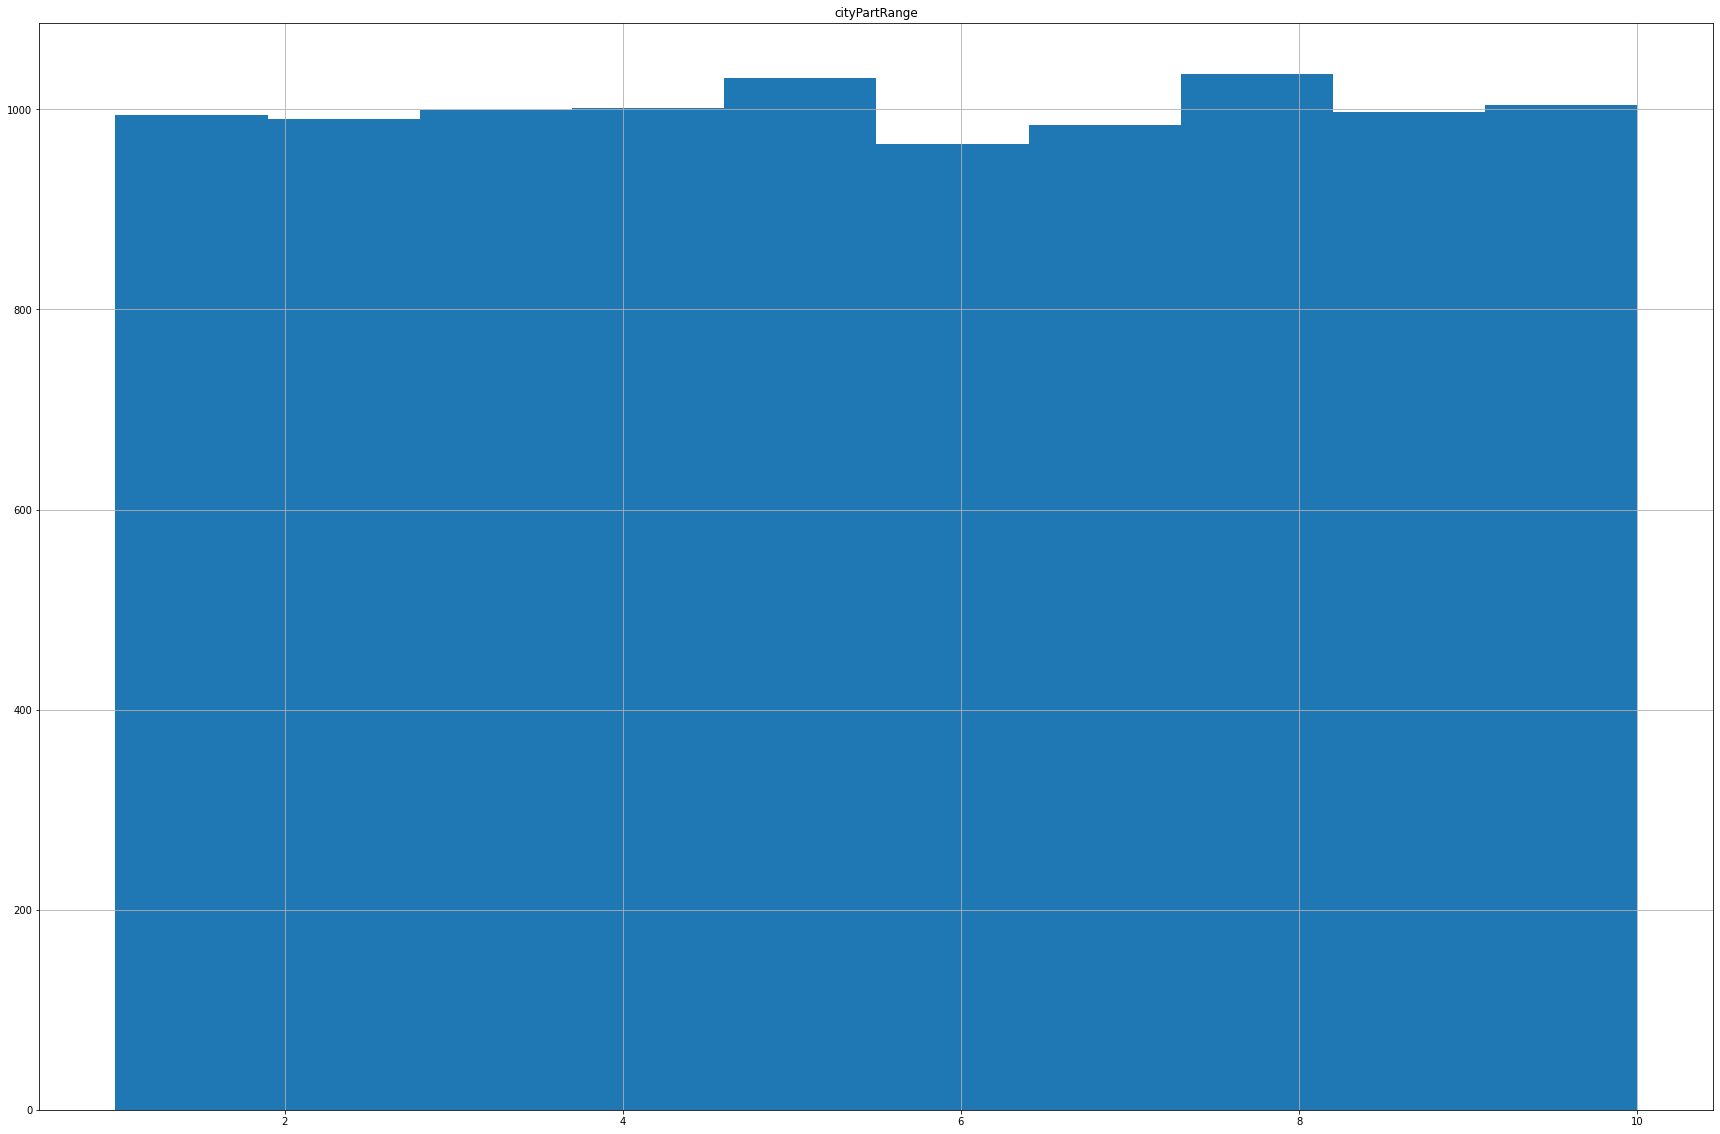

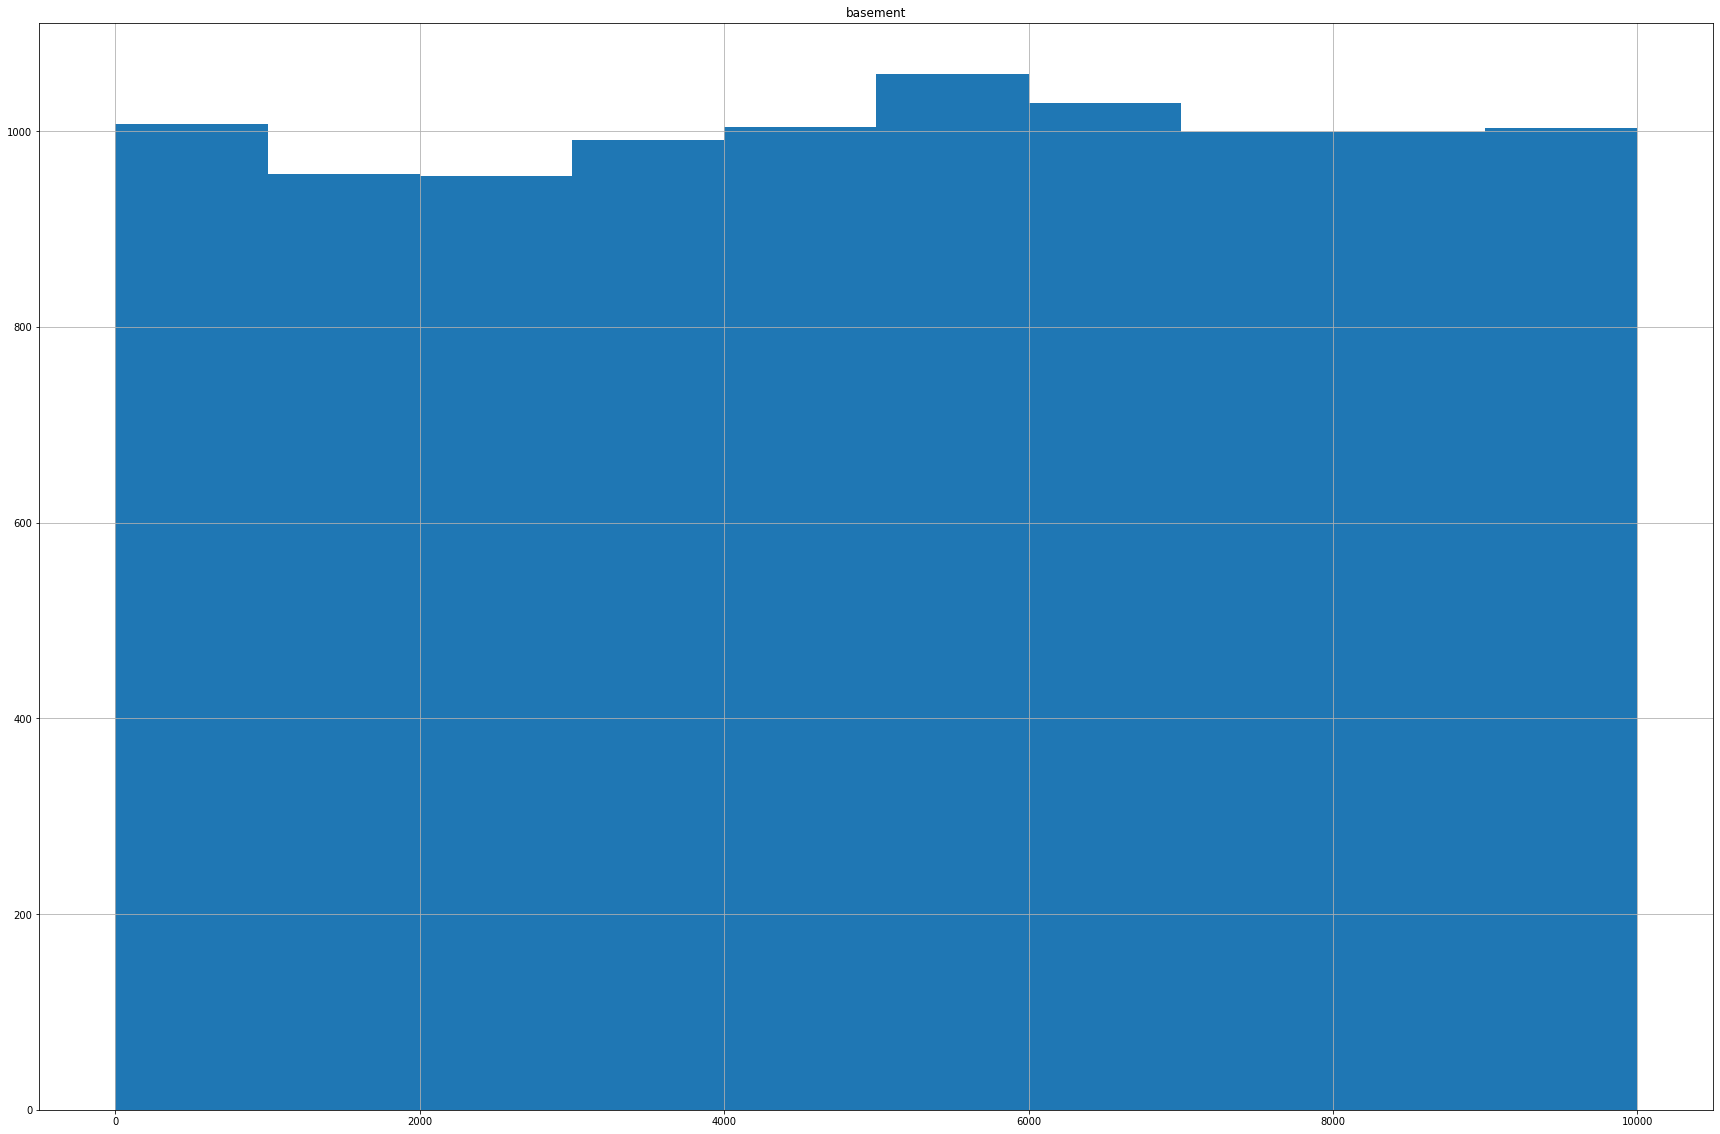

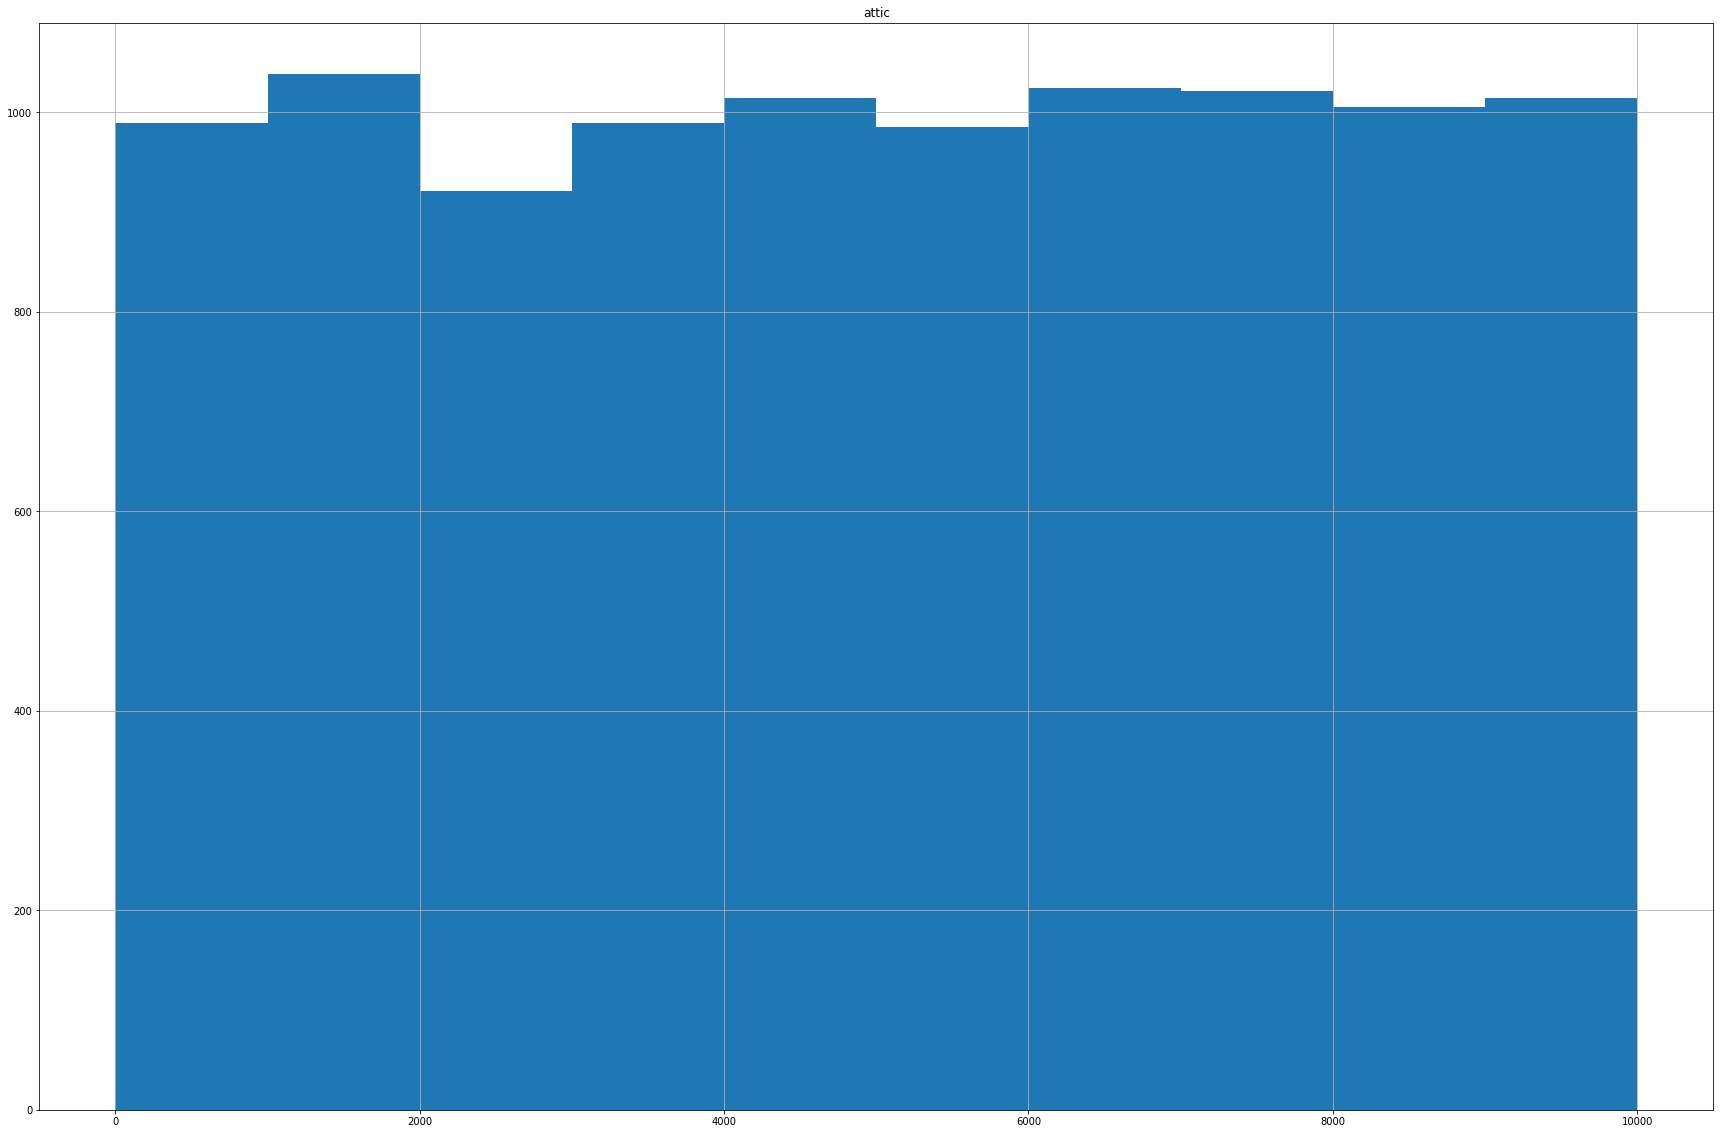

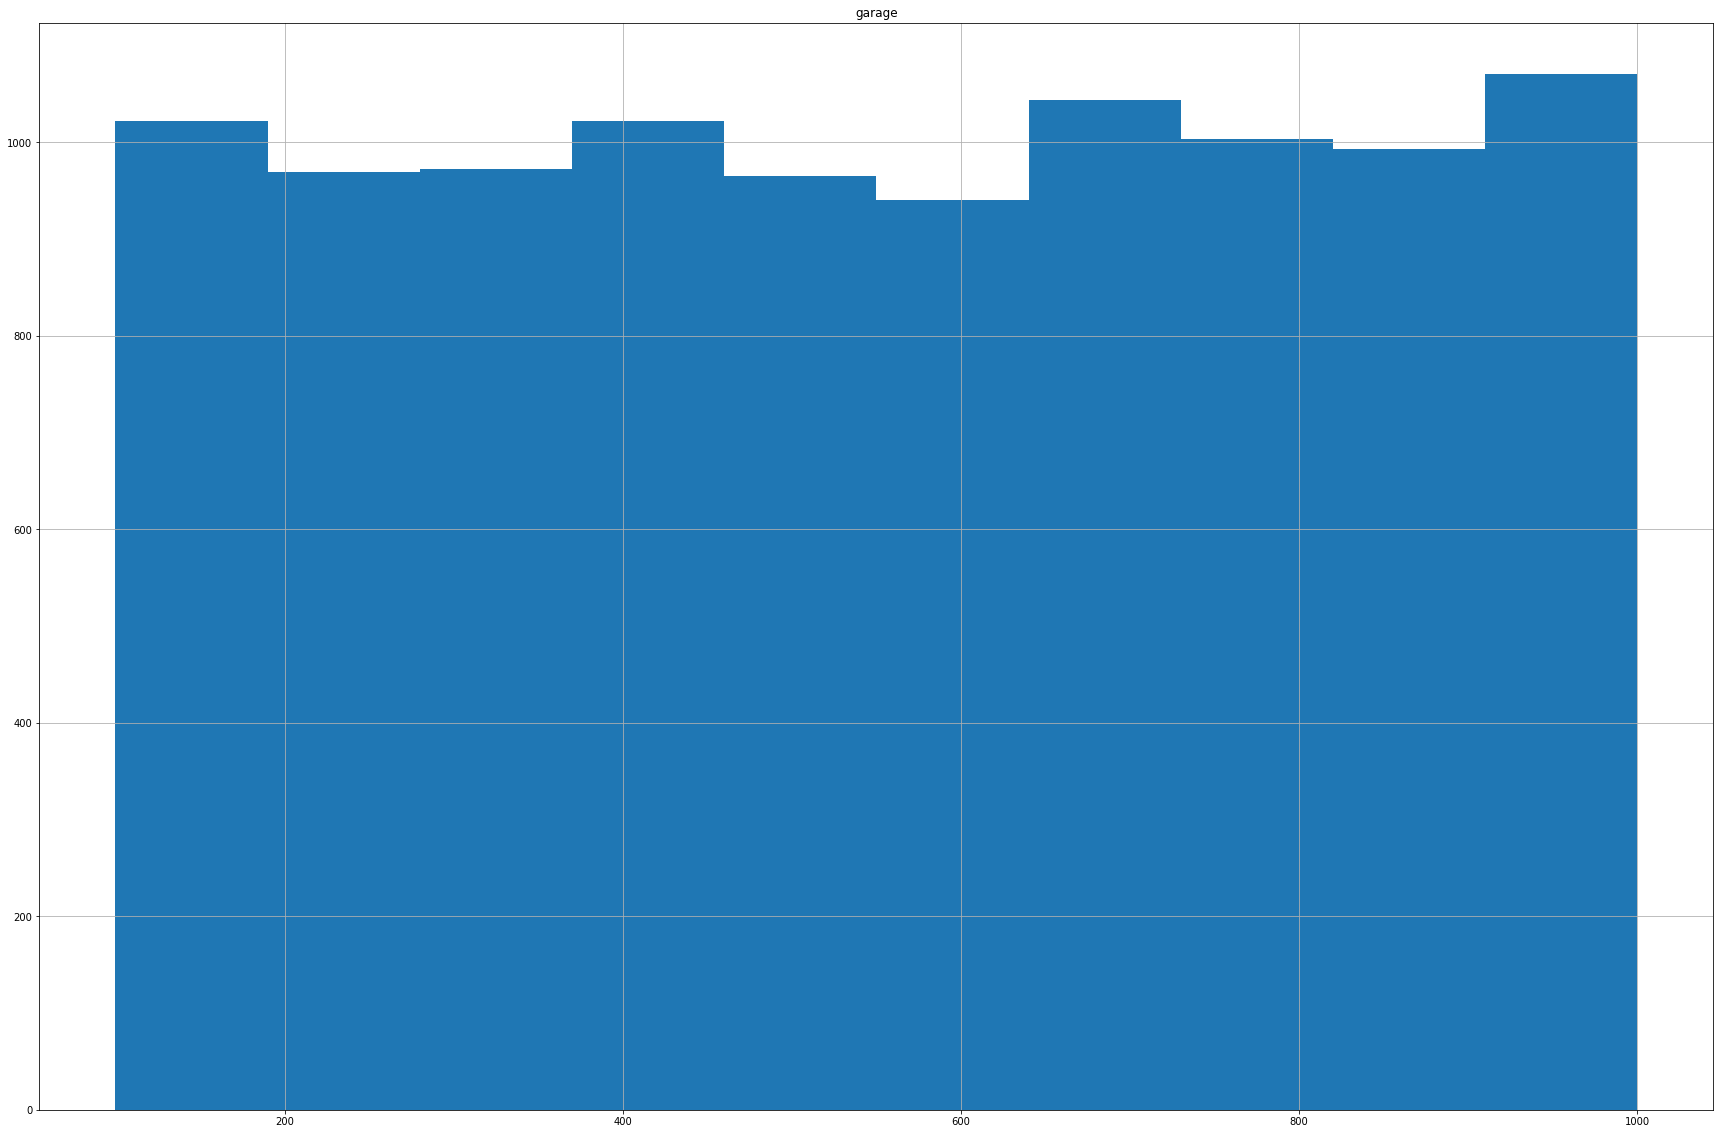

In [19]:
EDA_num(df, NUMcols)

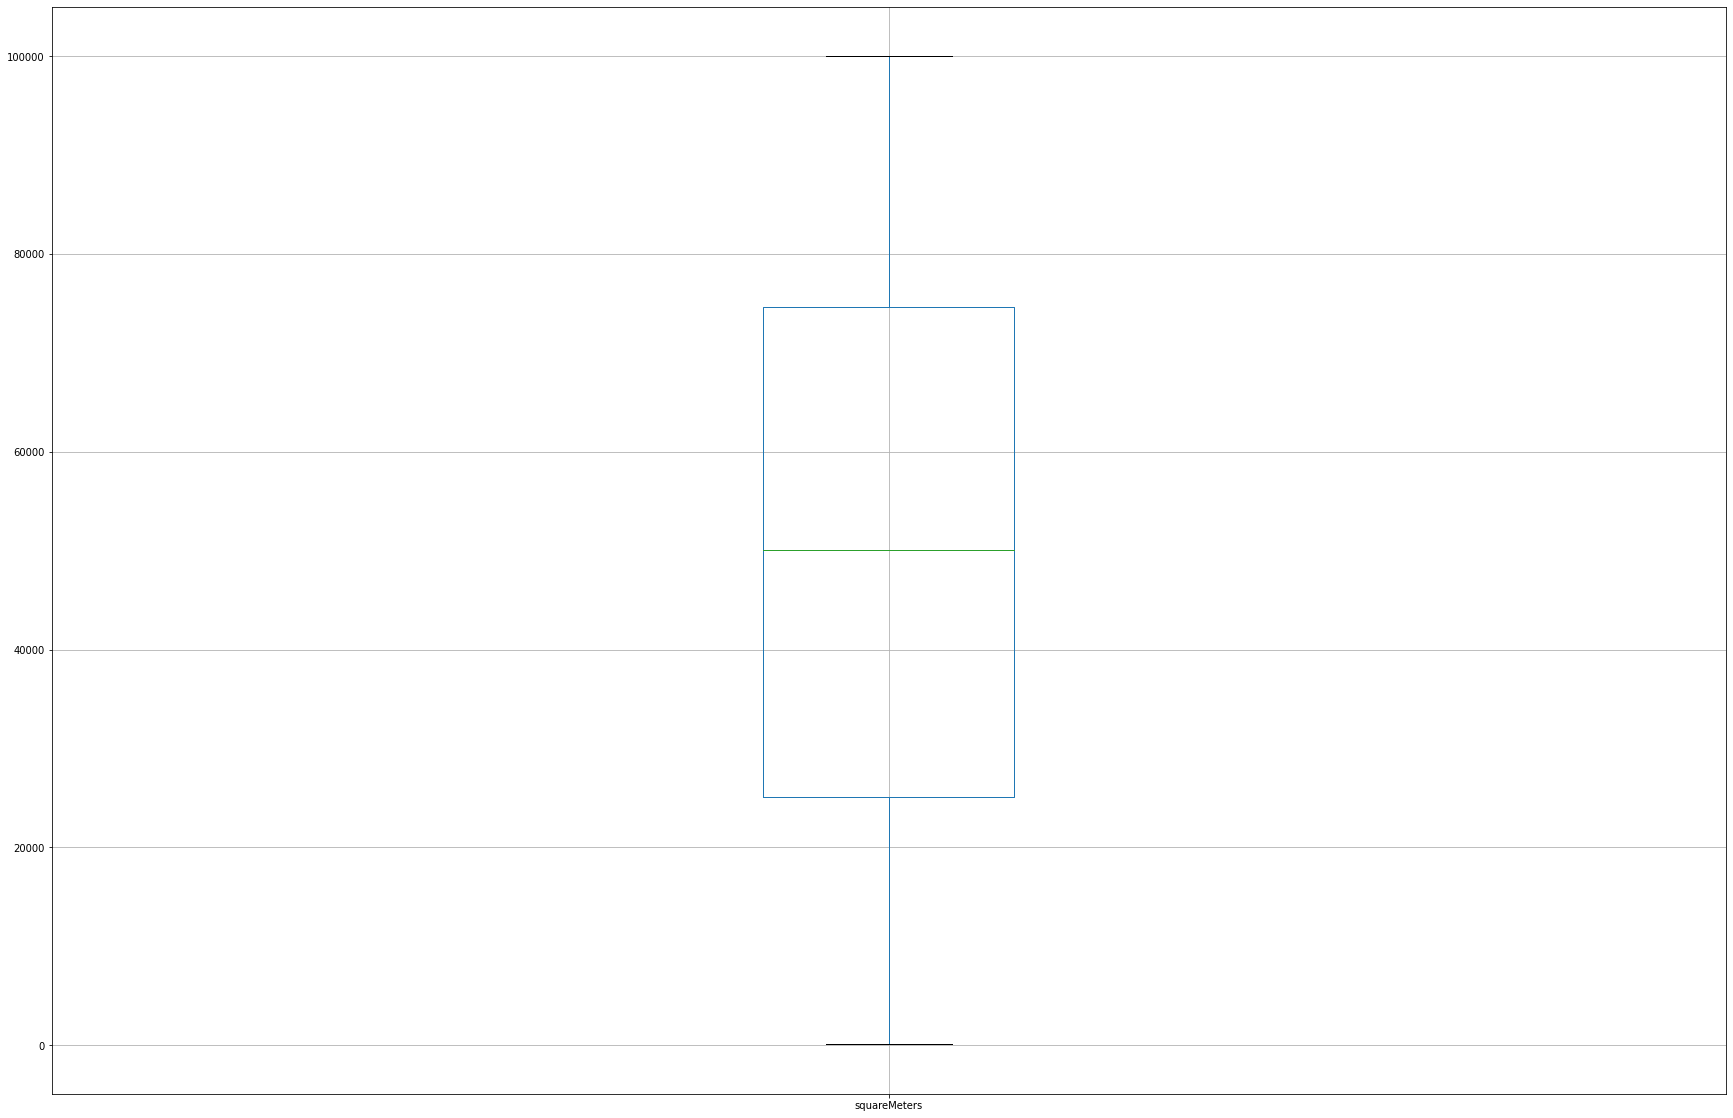

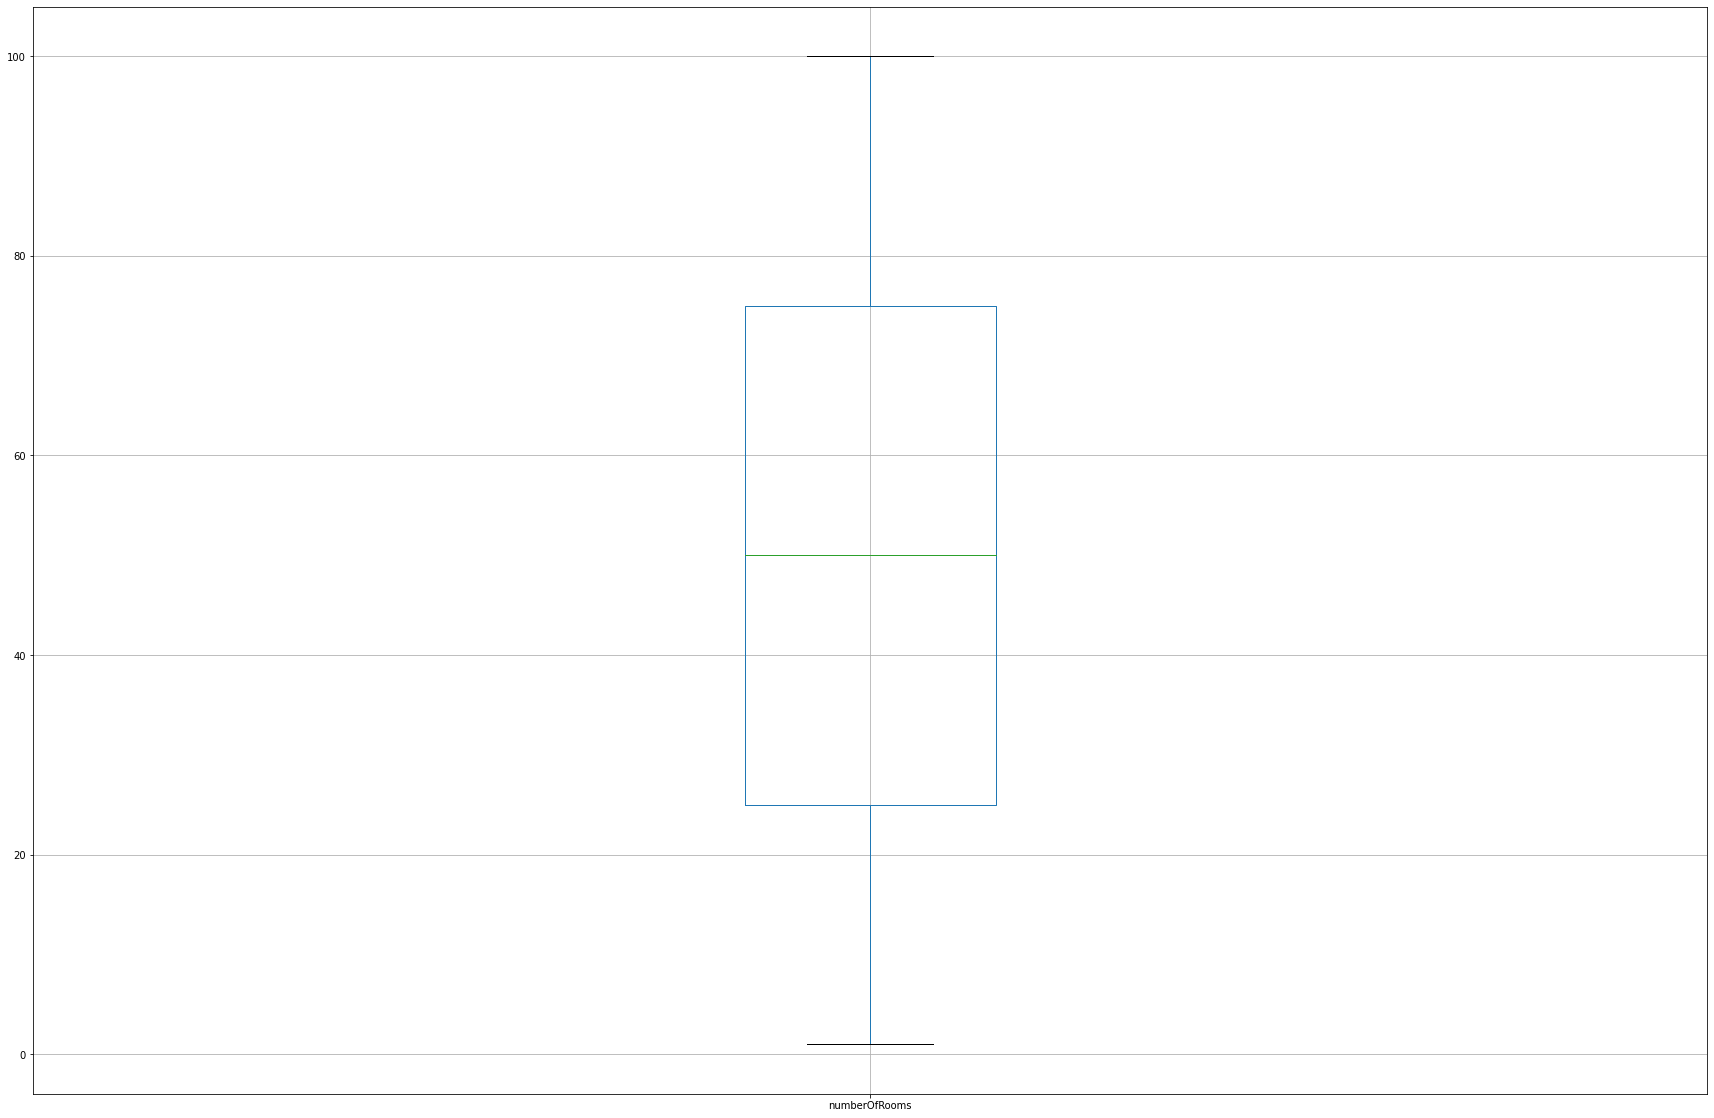

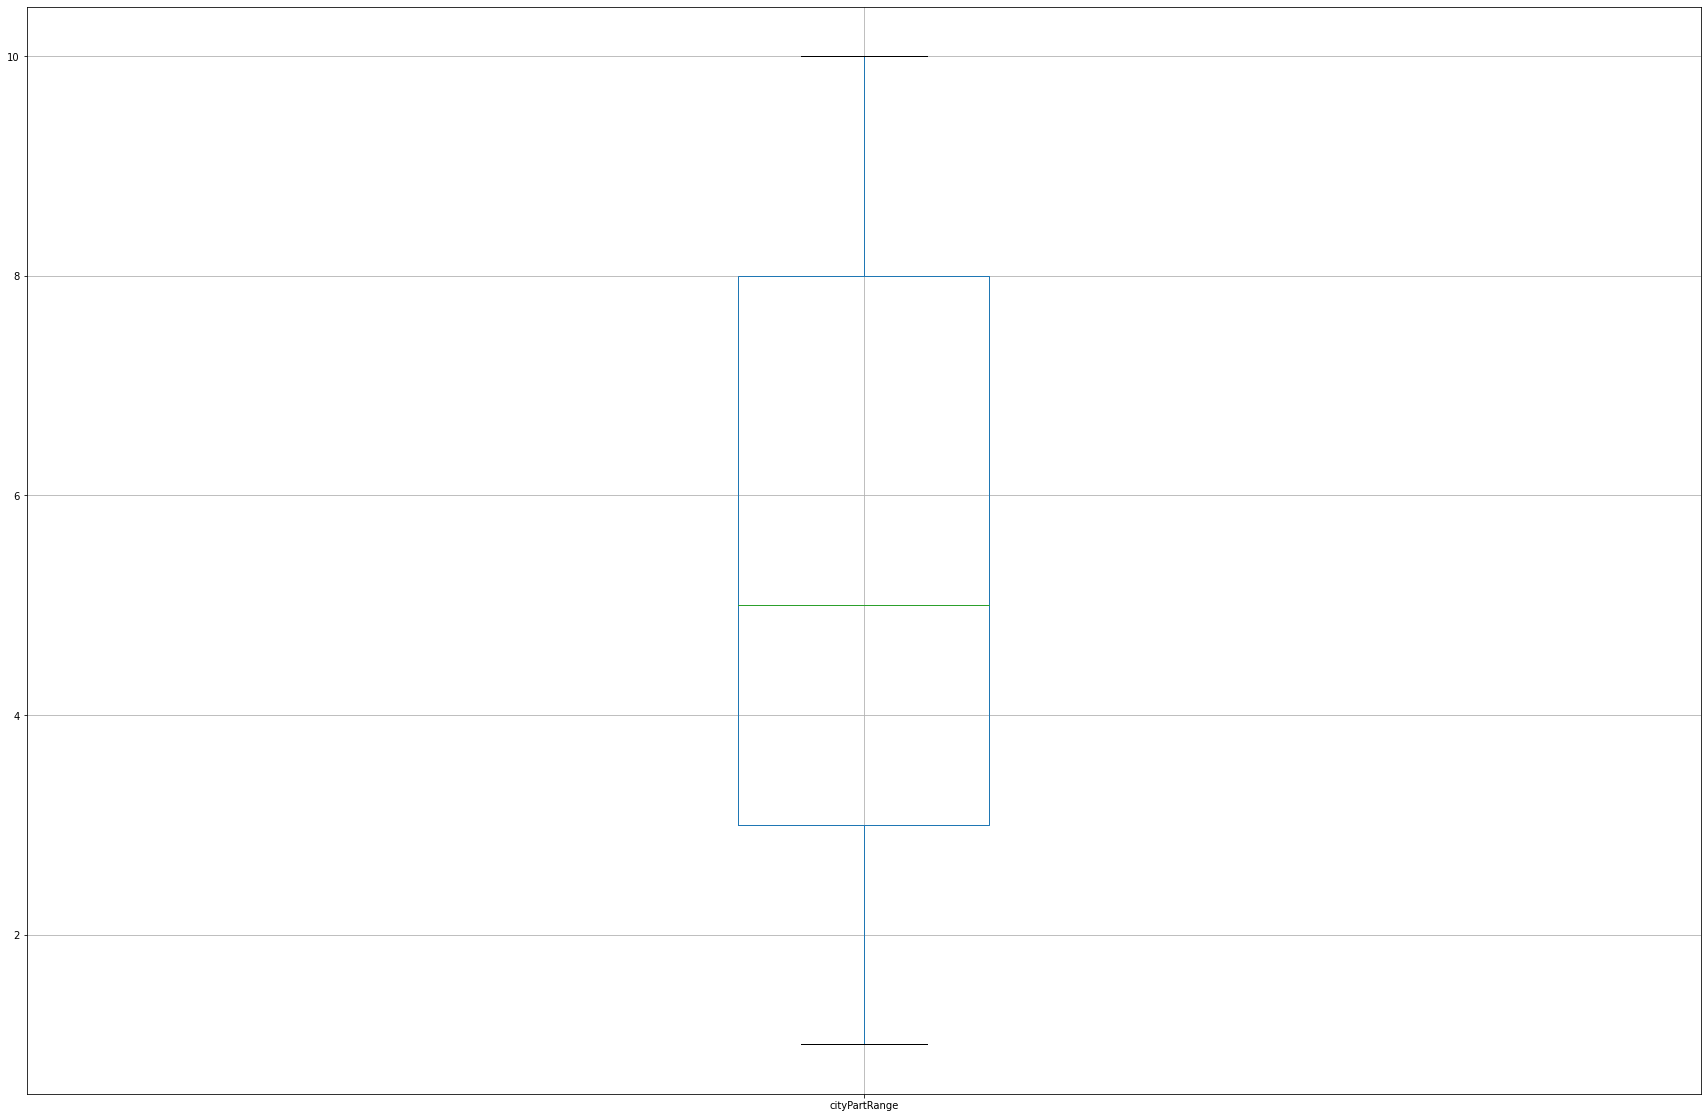

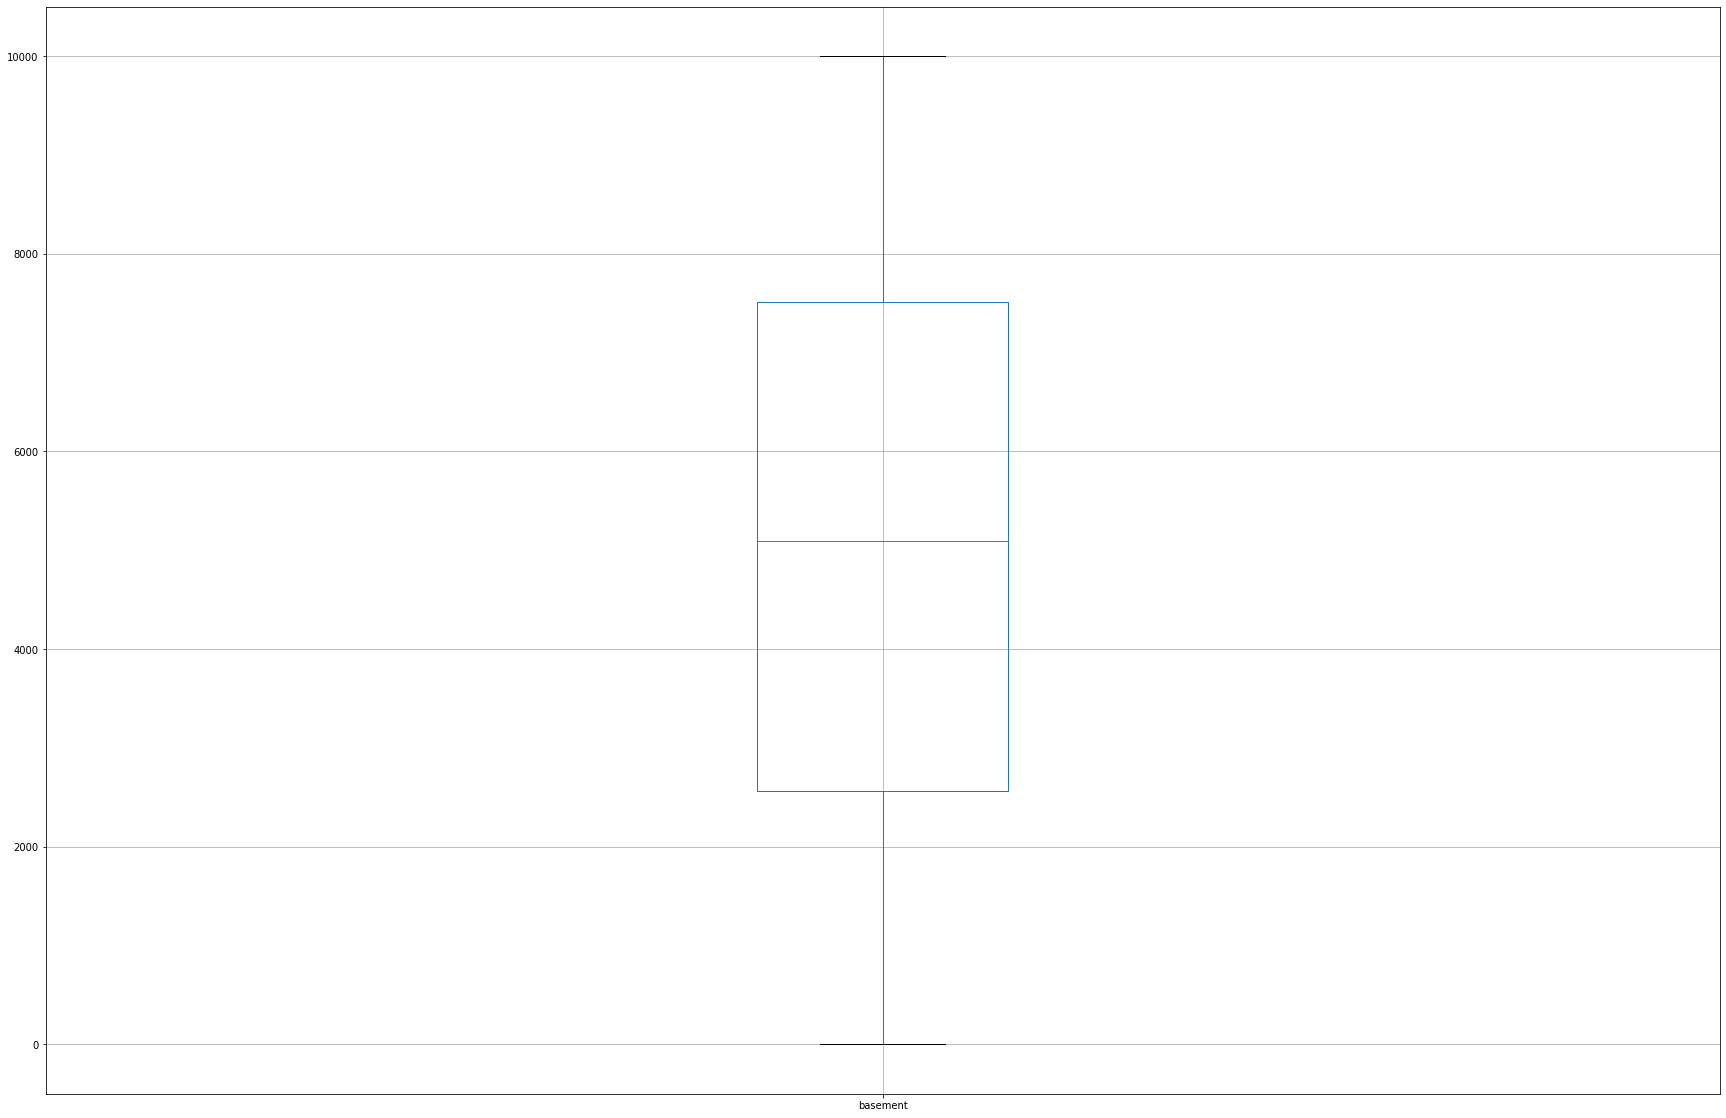

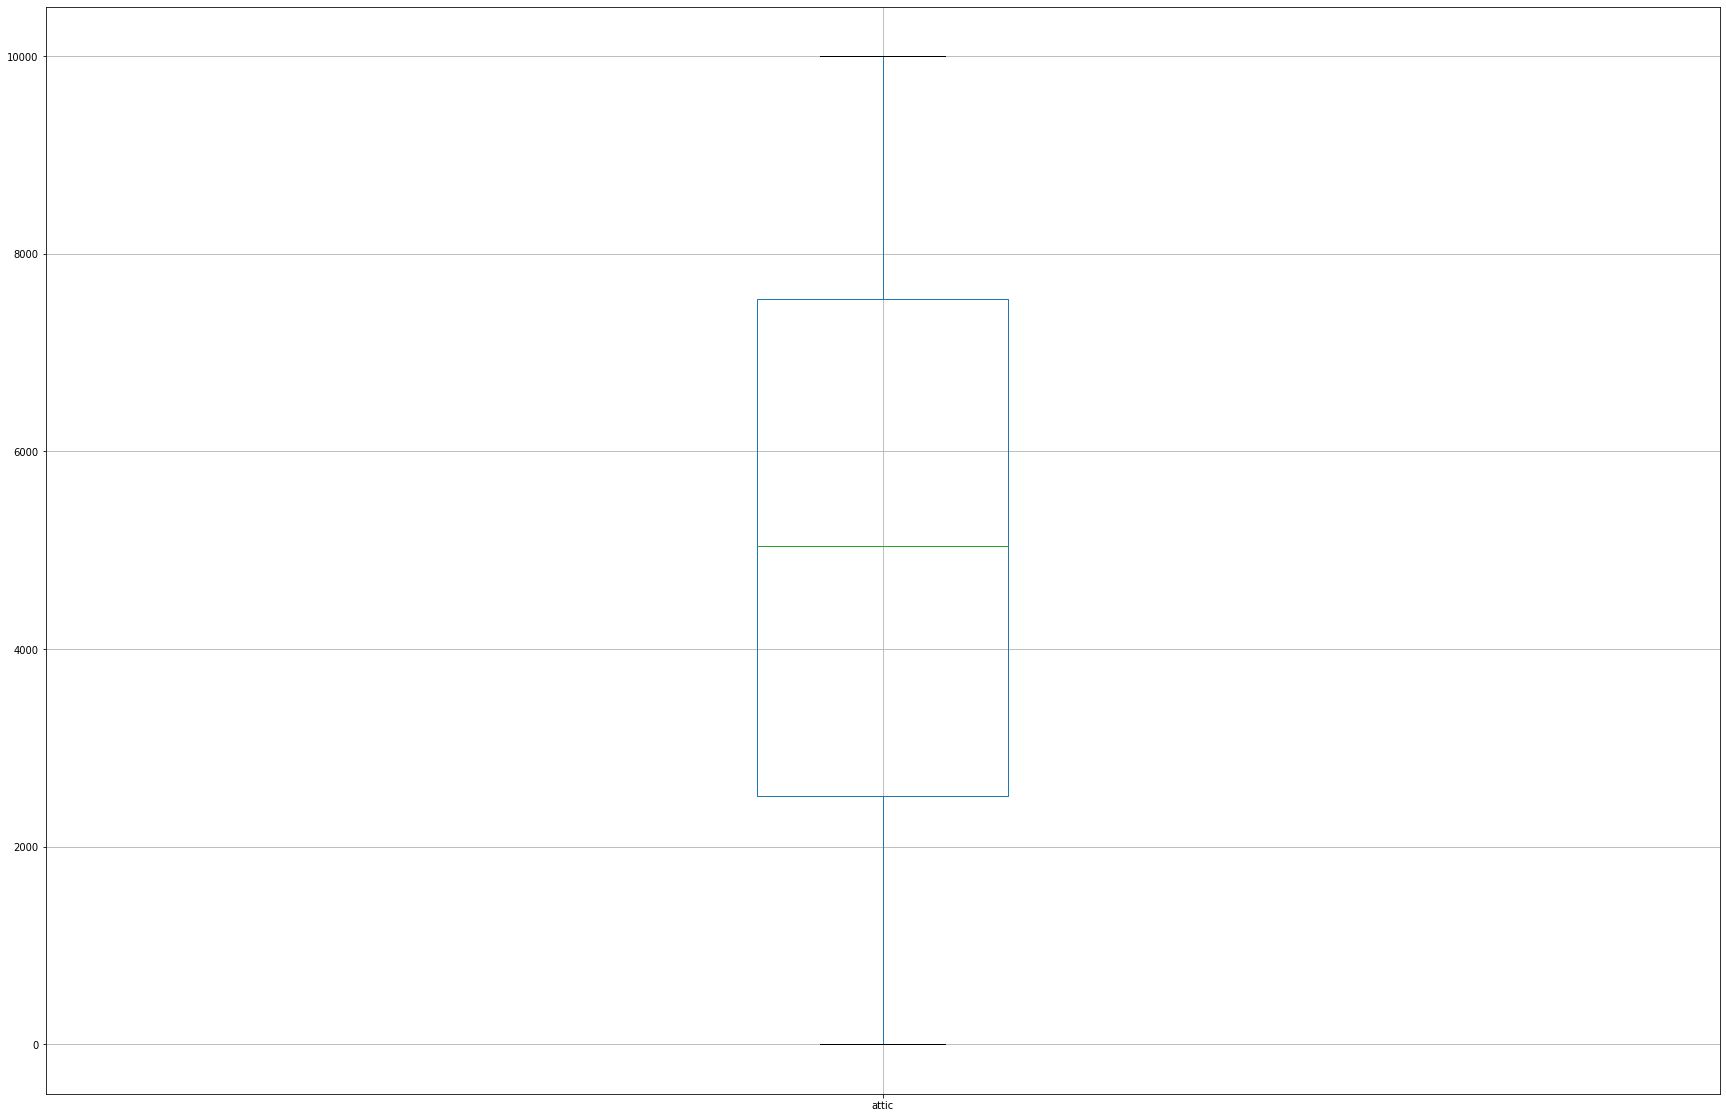

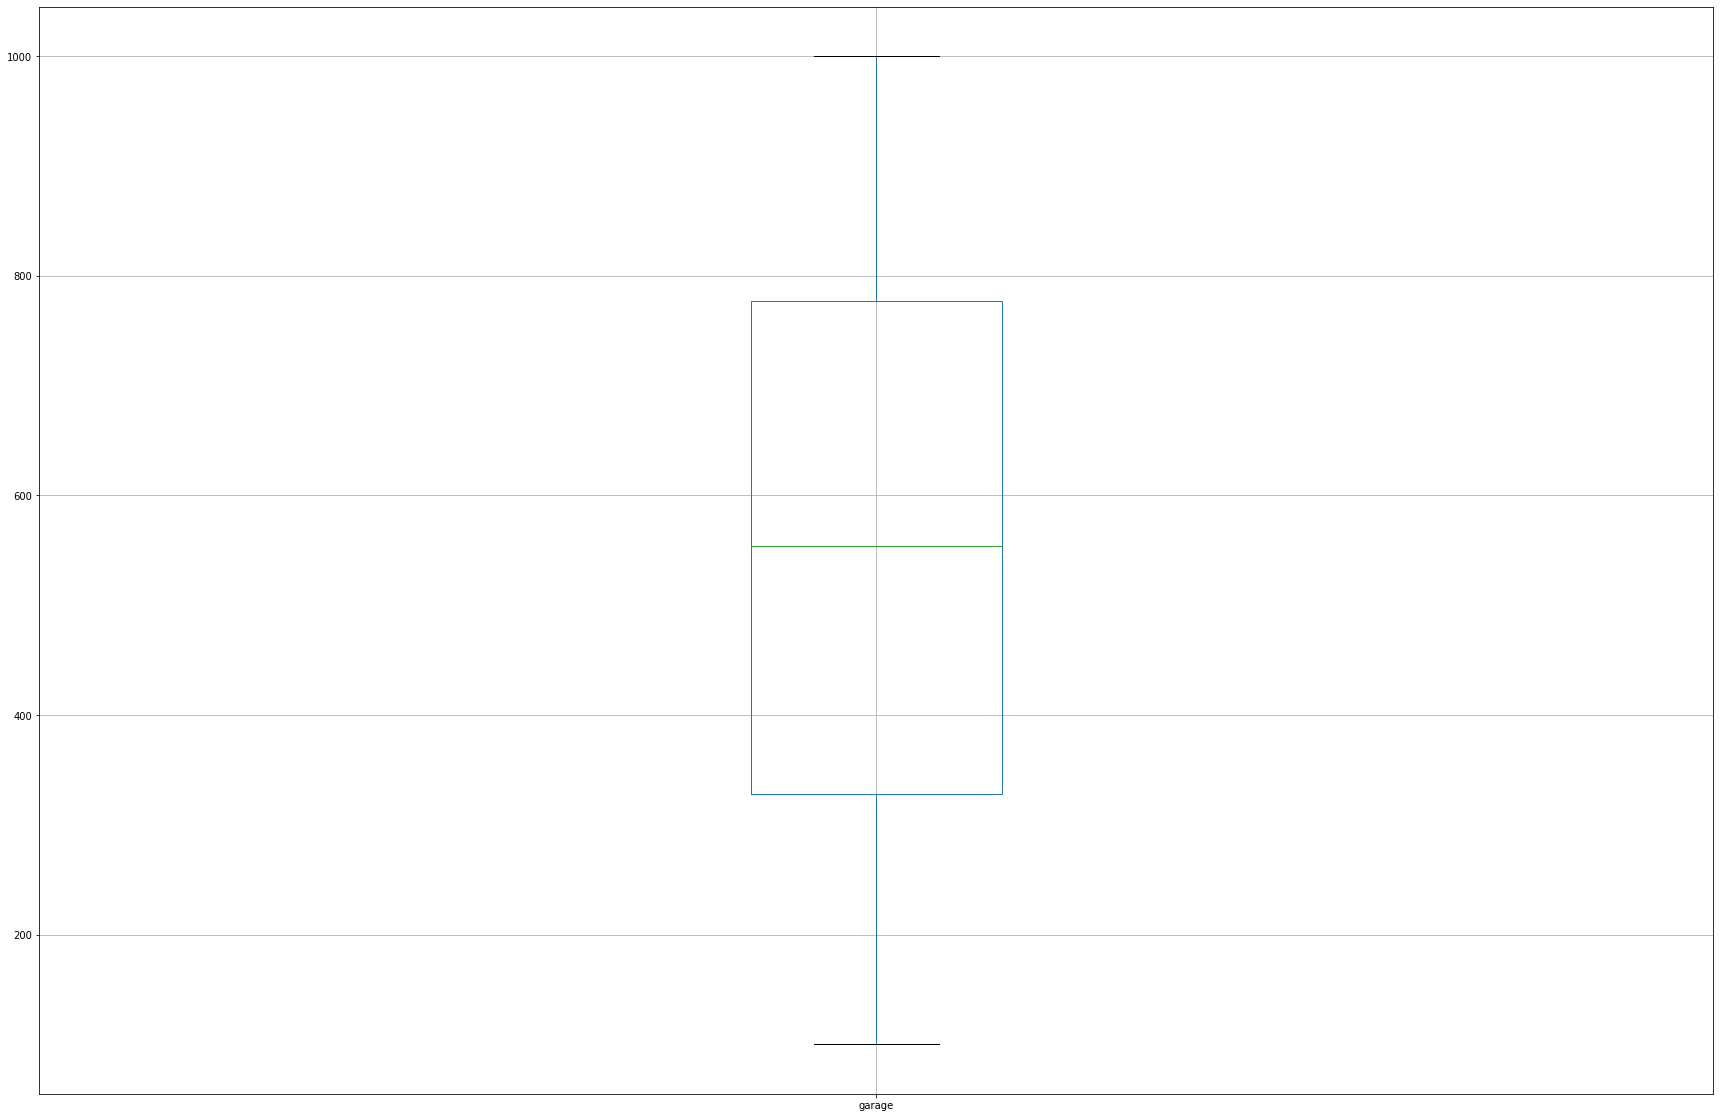

In [20]:
EDA_num_2(df, NUMcols)

# Data Transformation

In [21]:
if DT == 'StandardScaler' : 
    # StandardScaler
    df = NumStandardScaler(df)



Standardization Applied On: squareMeters

Standardization Applied On: numberOfRooms

Standardization Applied On: cityPartRange

Standardization Applied On: basement

Standardization Applied On: attic

Standardization Applied On: garage

Standardization Applied On: price


In [22]:
pd.DataFrame(df.head())

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.892,-1.644,0,1,63,-0.874,8,2005,0,1,-0.250,1.374,1.537,0,7,0.892
1,1.074,-0.394,1,1,98,0.867,6,2015,1,0,-0.480,-0.896,-1.622,1,2,1.075
2,0.203,0.265,0,1,19,0.171,8,2021,0,0,-0.729,1.321,-1.596,1,9,0.202
3,-0.610,-0.117,0,0,6,1.563,4,2012,0,1,-1.521,0.730,-0.741,0,3,-0.612
4,0.715,-1.088,1,1,90,-0.874,7,1990,1,0,1.183,-0.898,-0.997,1,4,0.717


# Feature Engineering 

In [23]:
if FE == 'LableEncodeing':
    df = df.apply(lambda x: AllObjLabelEncoder(x))


Lable Encoding Applied On: hasYard
New Value for hasYard  Variable: [0 1]
Old Value for hasYard Variable: ['0' '1']

Lable Encoding Applied On: hasPool
New Value for hasPool  Variable: [0 1]
Old Value for hasPool Variable: ['0' '1']

Lable Encoding Applied On: floors
New Value for floors  Variable: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Old Value for floors Variable: ['1' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74

In [24]:
pd.DataFrame(df.head())

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.892,-1.644,0,1,60,-0.874,8,15,0,1,-0.250,1.374,1.537,0,8,0.892
1,1.074,-0.394,1,1,98,0.867,6,25,1,0,-0.480,-0.896,-1.622,1,3,1.075
2,0.203,0.265,0,1,11,0.171,8,31,0,0,-0.729,1.321,-1.596,1,10,0.202
3,-0.610,-0.117,0,0,56,1.563,4,22,0,1,-1.521,0.730,-0.741,0,4,-0.612
4,0.715,-1.088,1,1,90,-0.874,7,0,1,0,1.183,-0.898,-0.997,1,5,0.717


# Feature Selection

In [25]:
fs = None

if FS == 'Forward':
    df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']

All the obj Variables: []


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   48.7s finished

[2022-07-20 09:56:04] Features: 1/15 -- score: -1.9267179354656166e-06[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  1.4min finished

[2022-07-20 09:57:26] Features: 2/15 -- score: -1.7423477257321529e-06[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  1.5min finished

[2022-07-20 09:58:56] Features: 3/15 -- score: -1.6261365004210718e-06[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j


Most Variables Can Effect The Target Variables:  ['squareMeters', 'hasYard', 'hasPool']

With Highest Score:  -1.6261365004210718e-06

All the Variables Selected:  ['squareMeters', 'hasYard', 'hasPool', 'price']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s finished

[2022-07-20 10:11:24] Features: 15/15 -- score: -1.919791303111824e-06

In [26]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-1.8862895773448149e-06, -1.9408470395631246e-06, -1.8920468091107162e-06, -1.944365334995034e-06, -1.9700409163143915e-06]",-0.000,"(squareMeters,)",0.000,0.000,0.000
2,"(0, 2)","[-1.6884061300961145e-06, -1.7374044059016038e-06, -1.7467745611172036e-06, -1.7454123754214857e-06, -1.7937411561243566e-06]",-0.000,"(squareMeters, hasYard)",0.000,0.000,0.000
3,"(0, 2, 3)","[-1.6014300189107742e-06, -1.6265396856005731e-06, -1.6134758114824807e-06, -1.6343549477786773e-06, -1.6548820383328531e-06]",-0.000,"(squareMeters, hasYard, hasPool)",0.000,0.000,0.000
4,"(0, 2, 3, 4)","[-1.5981433582874486e-06, -1.6906827210354478e-06, -1.6178980973940575e-06, -1.6203778944143713e-06, -1.673729944631874e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors)",0.000,0.000,0.000
5,"(0, 2, 3, 4, 8)","[-1.6171208434957583e-06, -1.7136064611159252e-06, -1.6320380517190404e-06, -1.61848952789414e-06, -1.699454415566939e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors, isNewBuilt)",0.000,0.000,0.000
6,"(0, 2, 3, 4, 8, 9)","[-1.6526717336545942e-06, -1.7054468961498915e-06, -1.6754756149568715e-06, -1.6224456772637639e-06, -1.731648165660891e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors, isNewBuilt, hasStormProtector)",0.000,0.000,0.000
7,"(0, 2, 3, 4, 8, 9, 13)","[-1.6891976767479662e-06, -1.7338985701166273e-06, -1.7002225435769694e-06, -1.6772966595525641e-06, -1.7702141597477459e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors, isNewBuilt, hasStormProtector, hasStorageRoom)",0.000,0.000,0.000
8,"(0, 2, 3, 4, 6, 8, 9, 13)","[-1.6954384384240884e-06, -1.7802730942825252e-06, -1.7502104959430073e-06, -1.721667726326153e-06, -1.8194745891585433e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors, numPrevOwners, isNewBuilt, hasStormProtector, hasStorageRoom)",0.000,0.000,0.000
9,"(0, 2, 3, 4, 5, 6, 8, 9, 13)","[-1.7581134330349468e-06, -1.794072123755456e-06, -1.7719370216385445e-06, -1.7727479040798239e-06, -1.802949768332747e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors, cityPartRange, numPrevOwners, isNewBuilt, hasStormProtector, hasStorageRoom)",0.000,0.000,0.000
10,"(0, 2, 3, 4, 5, 6, 8, 9, 13, 14)","[-1.7802311417176484e-06, -1.8277883276250817e-06, -1.8001098116636737e-06, -1.7849298608220831e-06, -1.8632737172306958e-06]",-0.000,"(squareMeters, hasYard, hasPool, floors, cityPartRange, numPrevOwners, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom)",0.000,0.000,0.000


In [27]:
pd.DataFrame(df.head())

,squareMeters,hasYard,hasPool,price
0,0.892,0,1,0.892
1,1.074,1,1,1.075
2,0.203,0,1,0.202
3,-0.610,0,0,-0.612
4,0.715,1,1,0.717


# Statistical Analysis

## Correlation between Independent and Dependent Variables

In [28]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,price
0,price,1.000
1,squareMeters,1.000
2,hasPool,-0.005
3,hasYard,-0.006


## Correlation between all the Variables

In [29]:
pd.DataFrame(df.corr())

,squareMeters,hasYard,hasPool,price
squareMeters,1.000,-0.007,-0.006,1.000
hasYard,-0.007,1.000,0.016,-0.006
hasPool,-0.006,0.016,1.000,-0.005
price,1.000,-0.006,-0.005,1.000


In [30]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,squareMeters,hasYard,hasPool,price
squareMeters,1.000000,-0.006650,-0.005594,0.999999
hasYard,-0.006650,1.000000,0.015514,-0.006119
hasPool,-0.005594,0.015514,1.000000,-0.005070
price,0.999999,-0.006119,-0.005070,1.000000


# Data Splitting 

In [31]:
X = df.drop(target, axis=1)
y = df[target]

if Random == 'Enable': 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Split_size, random_state=Randon_state_size)

print('X_train Rows size: ', X_train.shape[0])
print('X_train Columns size: ', X_train.shape[1])
print('\ny_train Rows size: ', y_train.shape[0])
print('\nX_test Rows size: ', X_test.shape[0])
print('X_test Columns size: ', X_test.shape[1])
print('\ny_test Rows size: ', y_test.shape[0])

X_train Rows size:  8000
X_train Columns size:  3

y_train Rows size:  8000

X_test Rows size:  2000
X_test Columns size:  3

y_test Rows size:  2000


# Machine Learning Models 

## Build the Machine Learning Models on 

In [32]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST = RandomForestRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nRandom Forest Regressor model trained')

    # Gradient Boosting Regressor
    gb_ST = GradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nGradient Boosting Regressor model trained')

    # Histogram-based Gradient Boosting Regression
    hgb_ST = HistGradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nHistogram-based Gradient Boosting Regression model trained')

    # AdaBoost Regressor
    ad_ST = AdaBoostRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nAdaBoost Regressor model trained')

    # Extra Trees Regressor
    et_ST = ExtraTreesRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nExtra Trees Regressor model trained')

    # K Neighbors Regressor
    knn_ST = KNeighborsRegressor().fit(X_train, y_train)
    print ('\nK Neighbors Regressor model trained')

    # Decision Tree Regressor
    dt_ST = DecisionTreeRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nDecision Tree Regressor model trained')

    # XGBoost Regressors
    xgb_ST = XGBRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nXGBoost Regressors model trained')

    # Support Vector Machines Regressors
    svm_ST = SVR().fit(X_train, y_train)
    print ('\nSupport Vector Machines Regressors model trained')

    # Linear Support Vector Regression
    lsvm_ST = LinearSVR(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nLinear Support Vector Regression model trained')

    # Multilayer Perceptron Regressor
    mlp_ST = MLPRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nMultilayer Perceptron Regressor model trained')


Random Forest Regressor model trained

Gradient Boosting Regressor model trained

Histogram-based Gradient Boosting Regression model trained

AdaBoost Regressor model trained

Extra Trees Regressor model trained

K Neighbors Regressor model trained

Decision Tree Regressor model trained
[10:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost Regressors model trained

Support Vector Machines Regressors model trained

Linear Support Vector Regression model trained

Multilayer Perceptron Regressor model trained


## Predict y_test Using Machine Learning  Models

In [33]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST_pred = rf_ST.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model')

    # Gradient Boosting Regressor
    gb_ST_pred = gb_ST.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

    # Histogram-based Gradient Boosting Regression Tree
    hgb_ST_pred = hgb_ST.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

    # AdaBoost Regressor
    ad_ST_pred = ad_ST.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

    # Extra Trees Regressor
    et_ST_pred = et_ST.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

    # K Neighbors Regressor
    knn_ST_pred = knn_ST.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

    # Decision Tree Regressor
    dt_ST_pred = dt_ST.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

    # XGBoost Regressors
    xgb_ST_pred = xgb_ST.predict(X_test)
    print ('\nPredict y_test using XGBoost Regressors model done')

    # Support Vector Machines Regressors
    svm_ST_pred = svm_ST.predict(X_test)
    print ('\nPredict y_test using Support Vector Machines Regressors model done')

    # Linear Support Vector Regression
    lsvm_ST_pred = lsvm_ST.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regression model done')

    # Multilayer Perceptron Regressor
    mlp_ST_pred = mlp_ST.predict(X_test)
    print ('\nPredict y_test using Multilayer Perceptron Regressor model done')


Predict y_test using Random Forest Regressor model

Predict y_test using Gradient Boosting Regressor model done

Predict y_test using Histogram-based Gradient Boosting Regression model done

Predict y_test using AdaBoost Regressor model done

Predict y_test using Extra Trees Regressor model done

Predict y_test using K Neighbors Regressor model done

Predict y_test using Decision Tree Regressor model done

Predict y_test using XGBoost Regressors model done

Predict y_test using Support Vector Machines Regressors model done

Predict y_test using Linear Support Vector Regression model done

Predict y_test using Multilayer Perceptron Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [34]:
if ML_ST == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_ST = mean_absolute_error(y_test, rf_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_ST = explained_variance_score(y_test, rf_ST_pred)

    # Max Error
    max_error_rf_ST = max_error(y_test, rf_ST_pred)

    # Median Absolute Error
    median_absolute_error_rf_ST = median_absolute_error(y_test, rf_ST_pred)

    # R^2
    r2_score_rf_ST = r2_score(y_test, rf_ST_pred)

    _rf_ST_valid_compare = pd.DataFrame({"Random Forest Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_ST, 
                                                mean_squared_error_rf_ST,
                                                Root_mean_squared_error_rf_ST,
                                                explained_variance_score_rf_ST,
                                                max_error_rf_ST,
                                                median_absolute_error_rf_ST,
                                                r2_score_rf_ST,
                                                ],
                                        })  
    print(tabulate(_rf_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+-------------+
|    | Random Forest Regressor Standered Models   |    Accuracy |
|----+--------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                  | 0.00100998  |
|  1 | Mean Squared Error (MSE)                   | 1.62429e-06 |
|  2 | Root Mean Squared Error (RMSE)             | 0.00127447  |
|  3 | Explained Variance Score                   | 0.999998    |
|  4 | Max Error                                  | 0.00428857  |
|  5 | Median Absolute Error                      | 0.000853524 |
|  6 | R^2                                        | 0.999998    |
+----+--------------------------------------------+-------------+


### Gradient Boosting Regressor

In [35]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_ST = mean_absolute_error(y_test, gb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_ST = explained_variance_score(y_test, gb_ST_pred)

    # Max Error
    max_error_gb_ST = max_error(y_test, gb_ST_pred)

    # Median Absolute Error
    median_absolute_error_gb_ST = median_absolute_error(y_test, gb_ST_pred)

    # R^2
    r2_score_gb_ST = r2_score(y_test, gb_ST_pred)

    _gb_ST_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_ST, 
                                                mean_squared_error_gb_ST,
                                                Root_mean_squared_error_gb_ST,
                                                explained_variance_score_gb_ST,
                                                max_error_gb_ST,
                                                median_absolute_error_gb_ST,
                                                r2_score_gb_ST,
                                                ],
                                        })  
    print(tabulate(_gb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+-------------+
|    | Gradient Boosting Regressor Standered Models   |    Accuracy |
|----+------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                      | 0.00521774  |
|  1 | Mean Squared Error (MSE)                       | 4.75247e-05 |
|  2 | Root Mean Squared Error (RMSE)                 | 0.00689381  |
|  3 | Explained Variance Score                       | 0.999955    |
|  4 | Max Error                                      | 0.0266519   |
|  5 | Median Absolute Error                          | 0.00396498  |
|  6 | R^2                                            | 0.999955    |
+----+------------------------------------------------+-------------+


### Histogram-based Gradient Boosting Regressor

In [36]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_ST = mean_absolute_error(y_test, hgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_ST = explained_variance_score(y_test, hgb_ST_pred)

    # Max Error
    max_error_hgb_ST = max_error(y_test, hgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_hgb_ST = median_absolute_error(y_test, hgb_ST_pred)

    # R^2
    r2_score_hgb_ST = r2_score(y_test, hgb_ST_pred)

    _hgb_ST_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_ST, 
                                                mean_squared_error_hgb_ST,
                                                Root_mean_squared_error_hgb_ST,
                                                explained_variance_score_hgb_ST,
                                                max_error_hgb_ST,
                                                median_absolute_error_hgb_ST,
                                                r2_score_hgb_ST,
                                                ],
                                        })  
    print(tabulate(_hgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------------------+-------------+
|    | Histogram-based Gradient Boosting Regressor Standered Models   |    Accuracy |
|----+----------------------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                                      | 0.0035598   |
|  1 | Mean Squared Error (MSE)                                       | 1.79308e-05 |
|  2 | Root Mean Squared Error (RMSE)                                 | 0.00423447  |
|  3 | Explained Variance Score                                       | 0.999983    |
|  4 | Max Error                                                      | 0.0119933   |
|  5 | Median Absolute Error                                          | 0.00330002  |
|  6 | R^2                                                            | 0.999983    |
+----+----------------------------------------------------------------+-------------+


### AdaBoost Regressor

In [37]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_ST = mean_absolute_error(y_test, ad_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_ST = explained_variance_score(y_test, ad_ST_pred)

    # Max Error
    max_error_ad_ST = max_error(y_test, ad_ST_pred)

    # Median Absolute Error
    median_absolute_error_ad_ST = median_absolute_error(y_test, ad_ST_pred)

    # R^2
    r2_score_ad_ST = r2_score(y_test, ad_ST_pred)

    _ad_ST_valid_compare = pd.DataFrame({"AdaBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_ST, 
                                                mean_squared_error_ad_ST,
                                                Root_mean_squared_error_ad_ST,
                                                explained_variance_score_ad_ST,
                                                max_error_ad_ST,
                                                median_absolute_error_ad_ST,
                                                r2_score_ad_ST,
                                                ],
                                        })  
    print(tabulate(_ad_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------+------------+
|    | AdaBoost Regressor Standered Models   |   Accuracy |
|----+---------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)             |  0.107152  |
|  1 | Mean Squared Error (MSE)              |  0.0153385 |
|  2 | Root Mean Squared Error (RMSE)        |  0.123849  |
|  3 | Explained Variance Score              |  0.985543  |
|  4 | Max Error                             |  0.234707  |
|  5 | Median Absolute Error                 |  0.10628   |
|  6 | R^2                                   |  0.985502  |
+----+---------------------------------------+------------+


### Extra Trees Regressor

In [38]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_ST = mean_absolute_error(y_test, et_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_ST = explained_variance_score(y_test, et_ST_pred)

    # Max Error
    max_error_et_ST = max_error(y_test, et_ST_pred)

    # Median Absolute Error
    median_absolute_error_et_ST = median_absolute_error(y_test, et_ST_pred)

    # R^2
    r2_score_et_ST = r2_score(y_test, et_ST_pred)

    _et_ST_valid_compare = pd.DataFrame({"Extra Trees Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_ST, 
                                                mean_squared_error_et_ST,
                                                Root_mean_squared_error_et_ST,
                                                explained_variance_score_et_ST,
                                                max_error_et_ST,
                                                median_absolute_error_et_ST,
                                                r2_score_et_ST,
                                                ],
                                        })  
    print(tabulate(_et_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+-------------+
|    | Extra Trees Regressor Standered Models   |    Accuracy |
|----+------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                | 0.000923211 |
|  1 | Mean Squared Error (MSE)                 | 1.34539e-06 |
|  2 | Root Mean Squared Error (RMSE)           | 0.00115991  |
|  3 | Explained Variance Score                 | 0.999999    |
|  4 | Max Error                                | 0.00407605  |
|  5 | Median Absolute Error                    | 0.000784307 |
|  6 | R^2                                      | 0.999999    |
+----+------------------------------------------+-------------+


### K Neighbors Regressor

In [39]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_ST = mean_absolute_error(y_test, knn_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_ST = explained_variance_score(y_test, knn_ST_pred)

    # Max Error
    max_error_knn_ST = max_error(y_test, knn_ST_pred)

    # Median Absolute Error
    median_absolute_error_knn_ST = median_absolute_error(y_test, knn_ST_pred)

    # R^2
    r2_score_knn_ST = r2_score(y_test, knn_ST_pred)

    _knn_ST_valid_compare = pd.DataFrame({"K Neighbors Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_ST, 
                                                mean_squared_error_knn_ST,
                                                Root_mean_squared_error_knn_ST,
                                                explained_variance_score_knn_ST,
                                                max_error_knn_ST,
                                                median_absolute_error_knn_ST,
                                                r2_score_knn_ST,
                                                ],
                                        })  
    print(tabulate(_knn_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+-------------+
|    | K Neighbors Regressor Standered Models   |    Accuracy |
|----+------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                | 0.00134755  |
|  1 | Mean Squared Error (MSE)                 | 3.08193e-06 |
|  2 | Root Mean Squared Error (RMSE)           | 0.00175554  |
|  3 | Explained Variance Score                 | 0.999997    |
|  4 | Max Error                                | 0.00809076  |
|  5 | Median Absolute Error                    | 0.00107525  |
|  6 | R^2                                      | 0.999997    |
+----+------------------------------------------+-------------+


### Decision Tree Regressor

In [40]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_ST = mean_absolute_error(y_test, dt_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_ST = explained_variance_score(y_test, dt_ST_pred)

    # Max Error
    max_error_dt_ST = max_error(y_test, dt_ST_pred)

    # Median Absolute Error
    median_absolute_error_dt_ST = median_absolute_error(y_test, dt_ST_pred)

    # R^2
    r2_score_dt_ST = r2_score(y_test, dt_ST_pred)

    _dt_ST_valid_compare = pd.DataFrame({"Decision Tree Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_ST, 
                                                mean_squared_error_dt_ST,
                                                Root_mean_squared_error_dt_ST,
                                                explained_variance_score_dt_ST,
                                                max_error_dt_ST,
                                                median_absolute_error_dt_ST,
                                                r2_score_dt_ST,
                                                ],
                                        })  
    print(tabulate(_dt_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+-------------+
|    | Decision Tree Regressor Standered Models   |    Accuracy |
|----+--------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                  | 0.0012436   |
|  1 | Mean Squared Error (MSE)                   | 2.43851e-06 |
|  2 | Root Mean Squared Error (RMSE)             | 0.00156157  |
|  3 | Explained Variance Score                   | 0.999998    |
|  4 | Max Error                                  | 0.00608609  |
|  5 | Median Absolute Error                      | 0.00102772  |
|  6 | R^2                                        | 0.999998    |
+----+--------------------------------------------+-------------+


### XGBoost Regressor

In [41]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_xgb_ST = mean_absolute_error(y_test, xgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_xgb_ST = explained_variance_score(y_test, xgb_ST_pred)

    # Max Error
    max_error_xgb_ST = max_error(y_test, xgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_xgb_ST = median_absolute_error(y_test, xgb_ST_pred)

    # R^2
    r2_score_xgb_ST = r2_score(y_test, xgb_ST_pred)

    _xgb_ST_valid_compare = pd.DataFrame({"XGBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_xgb_ST, 
                                                mean_squared_error_xgb_ST,
                                                Root_mean_squared_error_xgb_ST,
                                                explained_variance_score_xgb_ST,
                                                max_error_xgb_ST,
                                                median_absolute_error_xgb_ST,
                                                r2_score_xgb_ST,
                                                ],
                                        })  
    print(tabulate(_xgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------+-------------+
|    | XGBoost Regressor Standered Models   |    Accuracy |
|----+--------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)            | 0.00527402  |
|  1 | Mean Squared Error (MSE)             | 4.79148e-05 |
|  2 | Root Mean Squared Error (RMSE)       | 0.00692205  |
|  3 | Explained Variance Score             | 0.999955    |
|  4 | Max Error                            | 0.0220534   |
|  5 | Median Absolute Error                | 0.00398123  |
|  6 | R^2                                  | 0.999955    |
+----+--------------------------------------+-------------+


### Support Vector Regressor

In [42]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_ST = mean_absolute_error(y_test, svm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_ST = explained_variance_score(y_test, svm_ST_pred)

    # Max Error
    max_error_svm_ST = max_error(y_test, svm_ST_pred)

    # Median Absolute Error
    median_absolute_error_svm_ST = median_absolute_error(y_test, svm_ST_pred)

    # R^2
    r2_score_svm_ST = r2_score(y_test, svm_ST_pred)

    _svm_ST_valid_compare = pd.DataFrame({"Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_ST, 
                                                mean_squared_error_svm_ST,
                                                Root_mean_squared_error_svm_ST,
                                                explained_variance_score_svm_ST,
                                                max_error_svm_ST,
                                                median_absolute_error_svm_ST,
                                                r2_score_svm_ST,
                                                ],
                                        })  
    print(tabulate(_svm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Support Vector Regressor Standered Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   | 0.0431341  |
|  1 | Mean Squared Error (MSE)                    | 0.00312175 |
|  2 | Root Mean Squared Error (RMSE)              | 0.0558727  |
|  3 | Explained Variance Score                    | 0.997057   |
|  4 | Max Error                                   | 0.105446   |
|  5 | Median Absolute Error                       | 0.035597   |
|  6 | R^2                                         | 0.997049   |
+----+---------------------------------------------+------------+


### Linear Support Vector Regressor

In [43]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_ST = mean_absolute_error(y_test, lsvm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_ST = explained_variance_score(y_test, lsvm_ST_pred)

    # Max Error
    max_error_lsvm_ST = max_error(y_test, lsvm_ST_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_ST = median_absolute_error(y_test, lsvm_ST_pred)

    # R^2
    r2_score_lsvm_ST = r2_score(y_test, lsvm_ST_pred)

    _lsvm_ST_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_ST, 
                                                mean_squared_error_lsvm_ST,
                                                Root_mean_squared_error_lsvm_ST,
                                                explained_variance_score_lsvm_ST,
                                                max_error_lsvm_ST,
                                                median_absolute_error_lsvm_ST,
                                                r2_score_lsvm_ST,
                                                ],
                                        })  
    print(tabulate(_lsvm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+-------------+
|    | Linear Support Vector Regressor Standered Models   |    Accuracy |
|----+----------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                          | 0.000859041 |
|  1 | Mean Squared Error (MSE)                           | 1.27081e-06 |
|  2 | Root Mean Squared Error (RMSE)                     | 0.0011273   |
|  3 | Explained Variance Score                           | 0.999999    |
|  4 | Max Error                                          | 0.00384701  |
|  5 | Median Absolute Error                              | 0.000656953 |
|  6 | R^2                                                | 0.999999    |
+----+----------------------------------------------------+-------------+


### Multilayer Perceptron Regressor

In [44]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_mlp_ST = mean_absolute_error(y_test, mlp_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_mlp_ST = explained_variance_score(y_test, mlp_ST_pred)

    # Max Error
    max_error_mlp_ST = max_error(y_test, mlp_ST_pred)

    # Median Absolute Error
    median_absolute_error_mlp_ST = median_absolute_error(y_test, mlp_ST_pred)

    # R^2
    r2_score_mlp_ST = r2_score(y_test, mlp_ST_pred)

    _mlp_ST_valid_compare = pd.DataFrame({"Multilayer Perceptron Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_mlp_ST, 
                                                mean_squared_error_mlp_ST,
                                                Root_mean_squared_error_mlp_ST,
                                                explained_variance_score_mlp_ST,
                                                max_error_mlp_ST,
                                                median_absolute_error_mlp_ST,
                                                r2_score_mlp_ST,
                                                ],
                                        })  
    print(tabulate(_mlp_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+-------------+
|    | Multilayer Perceptron Regressor Standered Models   |    Accuracy |
|----+----------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                          | 0.0074404   |
|  1 | Mean Squared Error (MSE)                           | 9.57497e-05 |
|  2 | Root Mean Squared Error (RMSE)                     | 0.00978518  |
|  3 | Explained Variance Score                           | 0.99991     |
|  4 | Max Error                                          | 0.0480215   |
|  5 | Median Absolute Error                              | 0.0060314   |
|  6 | R^2                                                | 0.999909    |
+----+----------------------------------------------------+-------------+


# Machine Learning Models Optimization

##  random grid for  Models

### Random Forest Regressor

In [45]:
if ML_OP == 'Enable':

    n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)] # int, default=100 (The number of trees in the forest)
    criterion = ['squared_error', 'absolute_error', 'poisson'] # {“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'log2', 'auto'] # {“sqrt”, “log2”, 'auto' ,None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease = [0.0, 0.2, 0.5, 0.75] # float, default=0.0
    bootstrap = [True, False] # bool, default=True
    oob_score = [False, True] # bool, default=False
    n_jobs = [-1] # int, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    verbose = [0] # int, default=0
    warm_start = [False] # bool, default=False
    ccp_alpha = [0.0] # non-negative float, default=0.0
    max_samples = [None] # int or float, default=None

    # Create the random grid
    random_grid_rf = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features': max_features,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs, 
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start' : warm_start, 
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
                }
                
    for key, value in random_grid_rf.items():
        print(key, ' : ', value)

n_estimators  :  [50, 65, 81, 96, 112, 127, 143, 158, 174, 189, 205, 220, 236, 251, 267, 282, 298, 313, 329, 344, 360, 375, 391, 406, 422, 437, 453, 468, 484, 500]
criterion  :  ['squared_error', 'absolute_error', 'poisson']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
min_samples_leaf  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_weight_fraction_leaf  :  [0.0]
max_features  :  ['sqrt', 'log2', 'auto']
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]
min_impurity_decrease  :  [0.0, 0.2, 0.5, 0.75]
bootstrap  :  [True, False]
oob_score  :  [False, True]
n_jobs  :  [-1]
random_state  :  [42]
verbose  :  [0]
warm_start  :  [False]
ccp_alpha  :  [0.0]
max_samples  :  [None]


### Gradient Boosting Regressor

In [46]:
if ML_OP == 'Enable':
    
    loss = ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
    learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.1 (Values must be in the range (0.0, inf))
    n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=100 (Values must be in the range [1, inf))
    subsample = [0.5, 1.0] # float, default=1.0 (Values must be in the range (0.0, 1.0])
    criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse'] # {‘friedman_mse’, ‘squared_error’, ‘mse’}, default=’friedman_mse’
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [2, inf))
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [1, inf))
    min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5] # float, default=0.0 (Values must be in the range [0.0, 0.5])
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=3
    min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.0
    init = [None] # estimator or ‘zero’, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_features = ['sqrt', 'log2', 'auto'] # {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    alpha = [0.9] # float, default=0.9 (Values must be in the range (0.0, 1.0))
    verbose = [0] # int, default=0
    max_leaf_nodes = [None] # int, default=None
    warm_start = [False] # bool, default=False
    validation_fraction = [0.1] # float, default=0.1 (Values must be in the range (0.0, 1.0))
    n_iter_no_change = [None] # int, default=None
    tol = [0.0001] # float, default=1e-4
    ccp_alpha = [0.0] # non-negative float, default=0.0

    # Create the random grid
    random_grid_gb = {'loss': loss,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'subsample': subsample,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf, 
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_depth' : max_depth,
                'min_impurity_decrease' : min_impurity_decrease,
                'init' : init, 
                'random_state' : random_state,
                'max_features' : max_features,
                'alpha' : alpha,
                'verbose' : verbose, 
                'max_leaf_nodes' : max_leaf_nodes,
                'warm_start' : warm_start,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change, 
                'tol' : tol,
                'ccp_alpha' : ccp_alpha
                }
                
    for key, value in random_grid_gb.items():
        print(key, ' : ', value)

loss  :  ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile']
learning_rate  :  [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators  :  [50, 73, 97, 121, 144, 168, 192, 215, 239, 263, 286, 310, 334, 357, 381, 405, 428, 452, 476, 500]
subsample  :  [0.5, 1.0]
criterion  :  ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0, 0.1, 0.2, 0.5]
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_impurity_decrease  :  [0.0, 0.1, 0.2, 0.5, 0.75]
init  :  [None]
random_state  :  [42]
max_features  :  ['sqrt', 'log2', 'auto']
alpha  :  [0.9]
verbose  :  [0]
max_leaf_nodes  :  [None]
warm_start  :  [False]
validation_fraction  :  [0.1]
n_iter_no_change  :  [None]
tol  :  [0.0001]
ccp_alpha  :  [0.0]


### Histogram-based Gradient Boosting Regressor

In [47]:
if ML_OP == 'Enable':
    
    loss= ['squared_error', 'absolute_error', 'poisson', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘poisson’, ‘quantile’}, default=’squared_error’
    quantile = [None] # float, default=None (If loss is “quantile”, this parameter specifies which quantile to be estimated and must be between 0 and 1)
    learning_rate=[0.05, 0.1, 0.2, 0.3, 0.9] # float, default=0.1
    max_iter= [int(x) for x in np.linspace(50, 150, num = 10)] # int, default=100 (the maximum number of trees.)
    max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] # int or None, default=31 (Must be strictly greater than 1. If None, there is no maximum limit.)
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int or None, default=None 
    min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=20
    l2_regularization=[0.0, 0.1, 0.6] # float, default=0
    max_bins=[int(x) for x in np.linspace(100, 255, num = 20)] # int, default=255 (Must be no larger than 255) 

    categorical_features=[None] # array-like of {bool, int} of shape (n_features) or shape (n_categorical_features,), default=None (None : no feature will be considered categorical , boolean array-like : boolean mask indicating categorical features and integer array-like : integer indices indicating categorical features)
    monotonic_cst=[None] # array-like of int of shape (n_features), default=None
    warm_start=[False] # bool, default=False
    early_stopping=['auto'] # ‘auto’ or bool, default=’auto’
    scoring=['loss'] # str or callable or None, default=’loss’
    validation_fraction=[0.1] # int or float or None, default=0.1
    n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=10
    tol=[1e-07] # float, default=1e-7
    verbose=[0] # int, default=0
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_hgb = {'loss' : loss,
                    'learning_rate' : learning_rate,
                    'max_iter' : max_iter,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'max_depth' : max_depth,
                    'min_samples_leaf' : min_samples_leaf,
                    'l2_regularization' : l2_regularization,
                    'max_bins' : max_bins,
                    'categorical_features' : categorical_features,
                    'monotonic_cst' : monotonic_cst,
                    'warm_start' : warm_start,
                    'early_stopping' : early_stopping,
                    'scoring' : scoring,
                    'validation_fraction' : validation_fraction,
                    'n_iter_no_change' : n_iter_no_change,
                    'tol' : tol,
                    'verbose' : verbose,
                    'random_state' : random_state
                        }
                        
    for key, value in random_grid_hgb.items():
        print(key, ' : ', value)

loss  :  ['squared_error', 'absolute_error', 'poisson', 'quantile']
learning_rate  :  [0.05, 0.1, 0.2, 0.3, 0.9]
max_iter  :  [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]
max_leaf_nodes  :  [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 41, 43, 45, 47, 49, 51, 53, 55, 57, 60]
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_samples_leaf  :  [10, 13, 16, 20, 23, 26, 30, 33, 36, 40]
l2_regularization  :  [0.0, 0.1, 0.6]
max_bins  :  [100, 108, 116, 124, 132, 140, 148, 157, 165, 173, 181, 189, 197, 206, 214, 222, 230, 238, 246, 255]
categorical_features  :  [None]
monotonic_cst  :  [None]
warm_start  :  [False]
early_stopping  :  ['auto']
scoring  :  ['loss']
validation_fraction  :  [0.1]
n_iter_no_change  :  [10, 13, 16, 20, 23, 26, 30, 33, 36, 40]
tol  :  [1e-07]
verbose  :  [0]
random_state  :  [42]


### AdaBoost Regressor

In [48]:
if ML_OP == 'Enable':
    
    base_estimator=[DecisionTreeRegressor(max_depth=3)] # object, default=None, None is a DecisionTreeRegressor initialized with max_depth=3.
    # , RandomForestRegressor(), HistGradientBoostingRegressor(), GradientBoostingRegressor(), SVR(), ExtraTreesRegressor()
    n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=50 (Values must be in the range [1, inf))
    learning_rate=[1.0] # float, default=1.0 (Values must be in the range (0.0, inf))
    loss =['linear','square', 'exponential'] # {‘linear’, ‘square’, ‘exponential’}, default=’linear’
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_ad = {'base_estimator' : base_estimator,
                    'n_estimators' : n_estimators,
                    'learning_rate' : learning_rate,
                    'loss' : loss,
                    'random_state' : random_state
    }

    for key, value in random_grid_ad.items():
        print(key, ' : ', value)

base_estimator  :  [DecisionTreeRegressor(max_depth=3)]
n_estimators  :  [50, 73, 97, 121, 144, 168, 192, 215, 239, 263, 286, 310, 334, 357, 381, 405, 428, 452, 476, 500]
learning_rate  :  [1.0]
loss  :  ['linear', 'square', 'exponential']
random_state  :  [42]


### Extra Trees Regressor

In [49]:
if ML_OP == 'Enable':
    
    n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)] # int, default=100
    criterion = ['squared_error', 'absolute_error'] # {“squared_error”, “absolute_error”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0, 0.05, 0.1, 0.3] # float, default=0.0
    max_features = ['sqrt', 'log2', None, 1.0] # {“sqrt”, “log2”, None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    #max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0

    bootstrap=[False] # bool, default=False
    oob_score=[True,False] # bool, default=False
    n_jobs=[None] # int, default=None
    random_state=[42] # int, RandomState instance or None, default=None
    verbose=[0] # int, default=0
    warm_start=[False] #bool, default=False
    ccp_alpha=[0.0] # non-negative float, default=0.0
    max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=None
    max_samples.append(None)

    random_grid_et = {'n_estimators' : n_estimators,
                    'criterion' : criterion,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'min_impurity_decrease' : min_impurity_decrease,
                    'bootstrap' : bootstrap,
                    'oob_score' : oob_score,
                    'n_jobs' : n_jobs,
                    'random_state' : random_state,
                    'verbose' : verbose,
                    'warm_start': warm_start,
                    'ccp_alpha' : ccp_alpha,
                    'max_samples' : max_samples
    }

    for key, value in random_grid_et.items():
        print(key, ' : ', value)

n_estimators  :  [100, 121, 142, 163, 184, 205, 226, 247, 268, 289, 310, 331, 352, 373, 394, 415, 436, 457, 478, 500]
criterion  :  ['squared_error', 'absolute_error']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0, 0.05, 0.1, 0.3]
max_features  :  ['sqrt', 'log2', None, 1.0]
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_impurity_decrease  :  [0.0]
bootstrap  :  [False]
oob_score  :  [True, False]
n_jobs  :  [None]
random_state  :  [42]
verbose  :  [0]
warm_start  :  [False]
ccp_alpha  :  [0.0]
max_samples  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]


### K Neighbors Regressor

In [50]:
if ML_OP == 'Enable':
    
    n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=5
    weights = ['uniform', 'distance'] # {‘uniform’, ‘distance’} or callable, default=’uniform’
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)] # int, default=30
    p = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=2
    metric = ['minkowski'] # str or callable, default=’minkowski’
    metric_params=[None] 
    n_jobs=[None]

    random_grid_knn = {'n_neighbors' : n_neighbors,
                    'weights' : weights,
                    'algorithm' : algorithm,
                    'leaf_size' : leaf_size,
                    'p' : p,
                    'metric' : metric,
                    'metric_params' : metric_params,
                    'n_jobs' : n_jobs
    }

    for key, value in random_grid_knn.items():
        print(key, ' : ', value)

n_neighbors  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weights  :  ['uniform', 'distance']
algorithm  :  ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size  :  [10, 14, 18, 23, 27, 32, 36, 41, 45, 50]
p  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
metric  :  ['minkowski']
metric_params  :  [None]
n_jobs  :  [None]


### Decision Tree Regressor

In [51]:
if ML_OP == 'Enable':
    
    criterion = ['squared_error','friedman_mse', 'absolute_error', 'poisson'] # {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    splitter = ['best', 'random'] # {“best”, “random”}, default=”best”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None (max number of levels in each decision tree)
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'auto', 'log2'] # int, float or {“auto”, “sqrt”, “log2”}, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0
    ccp_alpha=[0.0] # non-negative float, default=0.0

    random_grid_dt = {'criterion' : criterion,
                    'splitter' : splitter,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'random_state' : random_state,
                    'max_leaf_nodes' : max_leaf_nodes, 
                    'min_impurity_decrease' : min_impurity_decrease,
                    'ccp_alpha' : ccp_alpha                
    }

    for key, value in random_grid_dt.items():
        print(key, ' : ', value)

criterion  :  ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter  :  ['best', 'random']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0]
max_features  :  ['sqrt', 'auto', 'log2']
random_state  :  [42]
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]
min_impurity_decrease  :  [0.0]
ccp_alpha  :  [0.0]


### Support Vector Regressor

In [52]:
if ML_OP == 'Enable':
    
    kernel=['rbf', 'linear', 'poly', 'sigmoid'] # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    degree = [int(x) for x in np.linspace(1, 15, num = 10)] # int, default=3
    gamma = ['scale', 'auto'] # {‘scale’, ‘auto’} or float, default=’scale’
    coef0=[0.0] # float, default=0.0
    tol=[0.001]# float, default=1e-3
    C=[1.0] # float, default=1.0
    epsilon = [0.1] # float, default=0.1
    shrinking=[True, False] # bool, default=True
    cache_size=[int(x) for x in np.linspace(750, 600, num = 20)] # float, default=200
    verbose=[False] # bool, default=False
    max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] # int, default=-1


    random_grid_svm = {'C' : C,
                    'kernel' : kernel,
                    'degree' : degree,
                    'gamma' : gamma,
                    'coef0' : coef0,
                    'tol' : tol,
                    'epsilon' : epsilon,
                    'shrinking' : shrinking,
                    'cache_size' : cache_size,
                    'verbose' : verbose,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_svm.items():
        print(key, ' : ', value)

C  :  [1.0]
kernel  :  ['rbf', 'linear', 'poly', 'sigmoid']
degree  :  [1, 2, 4, 5, 7, 8, 10, 11, 13, 15]
gamma  :  ['scale', 'auto']
coef0  :  [0.0]
tol  :  [0.001]
epsilon  :  [0.1]
shrinking  :  [True, False]
cache_size  :  [750, 742, 734, 726, 718, 710, 702, 694, 686, 678, 671, 663, 655, 647, 639, 631, 623, 615, 607, 600]
verbose  :  [False]
max_iter  :  [-5, -3, -2, 0, 0, 2, 3, 5]


### Linear Support Vector Regression

In [53]:
if ML_OP == 'Enable':
    
    epsilon = [0.0] # float, default=0.0
    tol=[0.0001] # float, default=1e-4
    C=[1.0] # float, default=1.0
    loss = ['epsilon_insensitive', 'squared_epsilon_insensitive'] # {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
    fit_intercept=[True, False] # bool, default=True
    intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] # float, default=1
    dual=[True, False] # bool, default=True    
    verbose=[0 ]# int, default=0
    random_state=[42] # int, RandomState instance or None, default=None
    max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)] # int, default=1000

    random_grid_lsvm = {'epsilon' : epsilon,
                    'loss' : loss, 
                    'dual' : dual,
                    'tol' : tol,
                    'C' : C,
                    'fit_intercept' : fit_intercept,
                    'intercept_scaling' : intercept_scaling,
                    'verbose' : verbose,
                    'random_state' : random_state,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_lsvm.items():
        print(key, ' : ', value)

epsilon  :  [0.0]
loss  :  ['epsilon_insensitive', 'squared_epsilon_insensitive']
dual  :  [True, False]
tol  :  [0.0001]
C  :  [1.0]
fit_intercept  :  [True, False]
intercept_scaling  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
verbose  :  [0]
random_state  :  [42]
max_iter  :  [600, 855, 1110, 1365, 1620, 1875, 2131, 2386, 2641, 2896, 3151, 3406, 3662, 3917, 4172, 4427, 4682, 4937, 5193, 5448, 5703, 5958, 6213, 6468, 6724, 6979, 7234, 7489, 7744, 8000]


## Hyperparameters Testing & Build the Optmization Models Using  

In [54]:
'''
        Random Forest Regressor
'''
if ML_OP == 'Enable':

        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        rf_op = rf_random.best_estimator_

        print('Parameters currently in use:\n')
        print(rf_op.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 42, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 58, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 251, 'n_jobs': -1, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [55]:
'''
        Gradient Boosting Regressor
'''
if ML_OP == 'Enable':
        
        gb = GradientBoostingRegressor()
        gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        gb_op = gb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(gb_op.get_params())

Parameters currently in use:

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 84, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 73, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [56]:
'''
        Histogram-based Gradient Boosting Regression Tree
'''
if ML_OP == 'Enable':
        
        hgb = HistGradientBoostingRegressor()
        hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        hgb_op = hgb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(hgb_op.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.1, 'learning_rate': 0.9, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': 37, 'max_iter': 138, 'max_leaf_nodes': 38, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 33, 'random_state': 42, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [57]:
'''
        AdaBoost Regressor
'''
if ML_OP == 'Enable':
        
        ad = AdaBoostRegressor()
        ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        ad_op = ad_random.best_estimator_

        print('Parameters currently in use:\n')
        print(ad_op.get_params())

Parameters currently in use:

{'base_estimator__ccp_alpha': 0.0, 'base_estimator__criterion': 'squared_error', 'base_estimator__max_depth': 3, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 500, 'random_state': 42}


In [58]:
'''   
        Extra Trees Regressor
'''
if ML_OP == 'Enable':
        
        et = ExtraTreesRegressor()
        et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        et_op = et_random.best_estimator_

        print('Parameters currently in use:\n')
        print(et_op.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 32, 'max_features': 1.0, 'max_leaf_nodes': 7, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 352, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [59]:
'''   
        K Neighbors Regressor
'''
if ML_OP == 'Enable':
        
        knn = KNeighborsRegressor()
        knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        knn_op = knn_random.best_estimator_

        print('Parameters currently in use:\n')
        print(knn_op.get_params())

Parameters currently in use:

{'algorithm': 'kd_tree', 'leaf_size': 50, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}


In [60]:
'''
            Decision Tree Regressor
'''
if ML_OP == 'Enable':
    
    dt = DecisionTreeRegressor()
    dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    dt_op = dt_random.best_estimator_

    print('Parameters currently in use:\n')
    print(dt_op.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 79, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


In [61]:
'''
            Support Vector Machines Regressor
'''
if ML_OP == 'Enable':
    
    svm = SVR()
    svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    svm_op = svm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(svm_op.get_params())

Parameters currently in use:

{'C': 1.0, 'cache_size': 663, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 5, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [62]:
'''
            Linear Support Vector Regressor
'''
if ML_OP == 'Enable':

    lsvm = LinearSVR()
    lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    lsvm_op = lsvm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(lsvm_op.get_params())

Parameters currently in use:

{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 10, 'loss': 'squared_epsilon_insensitive', 'max_iter': 5958, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


## Predict y_test Using 

In [63]:
if ML_OP == 'Enable':
    # Random Forest Regressor
    rf_op_pred = rf_op.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model done')


Predict y_test using Random Forest Regressor model done


In [64]:
if ML_OP == 'Enable':
    # Gradient Boosting Regressor
    gb_op_pred = gb_op.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')


Predict y_test using Gradient Boosting Regressor model done


In [65]:
if ML_OP == 'Enable':
    # Histogram-based Gradient Boosting Regression Tree
    hgb_op_pred = hgb_op.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')


Predict y_test using Histogram-based Gradient Boosting Regression model done


In [66]:
if ML_OP == 'Enable':
    # AdaBoost Regressor
    ad_op_pred = ad_op.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')


Predict y_test using AdaBoost Regressor model done


In [67]:
if ML_OP == 'Enable':
    # Extra Trees Regressor
    et_op_pred = et_op.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')


Predict y_test using Extra Trees Regressor model done


In [68]:
if ML_OP == 'Enable':
    # K Neighbors Regressor
    knn_op_pred = knn_op.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')


Predict y_test using K Neighbors Regressor model done


In [69]:
if ML_OP == 'Enable':
    # Decision Tree Regressor
    dt_op_pred = dt_op.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')


Predict y_test using Decision Tree Regressor model done


In [70]:
if ML_OP == 'Enable':
    # Support Vector Machines Regressor
    svm_op_pred = svm_op.predict(X_test)
    print ('\nPredict y_test using Support Vector Regressor model done')


Predict y_test using Support Vector Regressor model done


In [71]:
if ML_OP == 'Enable':
    # Linear Support Vector Regression
    lsvm_op_pred = lsvm_op.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regressor model done')


Predict y_test using Linear Support Vector Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [72]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_op = mean_absolute_error(y_test, rf_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_op = explained_variance_score(y_test, rf_op_pred)

    # Max Error
    max_error_rf_op = max_error(y_test, rf_op_pred)

    # Median Absolute Error
    median_absolute_error_rf_op = median_absolute_error(y_test, rf_op_pred)

    # R^2
    r2_score_rf_op = r2_score(y_test, rf_op_pred)

    rf_op_valid_compare = pd.DataFrame({"Random Forest Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_op, 
                                                mean_squared_error_rf_op,
                                                Root_mean_squared_error_rf_op,
                                                explained_variance_score_rf_op,
                                                max_error_rf_op,
                                                median_absolute_error_rf_op,
                                                r2_score_rf_op,
                                                ],
                                        })  
    print(tabulate(rf_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------------------------+-------------+
|    | Random Forest Regressor Optimization Models   |    Accuracy |
|----+-----------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                     | 0.00657233  |
|  1 | Mean Squared Error (MSE)                      | 6.24367e-05 |
|  2 | Root Mean Squared Error (RMSE)                | 0.00790169  |
|  3 | Explained Variance Score                      | 0.999941    |
|  4 | Max Error                                     | 0.0302719   |
|  5 | Median Absolute Error                         | 0.00606947  |
|  6 | R^2                                           | 0.999941    |
+----+-----------------------------------------------+-------------+


### Gradient Boosting Regressor

In [73]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_op = mean_absolute_error(y_test, gb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_op = explained_variance_score(y_test, gb_op_pred)

    # Max Error
    max_error_gb_op = max_error(y_test, gb_op_pred)

    # Median Absolute Error
    median_absolute_error_gb_op = median_absolute_error(y_test, gb_op_pred)

    # R^2
    r2_score_gb_op = r2_score(y_test, gb_op_pred)

    gb_op_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_op, 
                                                mean_squared_error_gb_op,
                                                Root_mean_squared_error_gb_op,
                                                explained_variance_score_gb_op,
                                                max_error_gb_op,
                                                median_absolute_error_gb_op,
                                                r2_score_gb_op,
                                                ],
                                        })  
    print(tabulate(gb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------------+-------------+
|    | Gradient Boosting Regressor Optimization Models   |    Accuracy |
|----+---------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                         | 0.00132203  |
|  1 | Mean Squared Error (MSE)                          | 2.85933e-06 |
|  2 | Root Mean Squared Error (RMSE)                    | 0.00169096  |
|  3 | Explained Variance Score                          | 0.999997    |
|  4 | Max Error                                         | 0.00810559  |
|  5 | Median Absolute Error                             | 0.00106014  |
|  6 | R^2                                               | 0.999997    |
+----+---------------------------------------------------+-------------+


### Histogram-based Gradient Boosting Regressor

In [74]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_op = mean_absolute_error(y_test, hgb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_op = explained_variance_score(y_test, hgb_op_pred)

    # Max Error
    max_error_hgb_op = max_error(y_test, hgb_op_pred)

    # Median Absolute Error
    median_absolute_error_hgb_op = median_absolute_error(y_test, hgb_op_pred)

    # R^2
    r2_score_hgb_op = r2_score(y_test, hgb_op_pred)

    hgb_op_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_op, 
                                                mean_squared_error_hgb_op,
                                                Root_mean_squared_error_hgb_op,
                                                explained_variance_score_hgb_op,
                                                max_error_hgb_op,
                                                median_absolute_error_hgb_op,
                                                r2_score_hgb_op,
                                                ],
                                        })  
    print(tabulate(hgb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------------------+-------------+
|    | Histogram-based Gradient Boosting Regressor Optimization Models   |    Accuracy |
|----+-------------------------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                                         | 0.00364772  |
|  1 | Mean Squared Error (MSE)                                          | 1.93252e-05 |
|  2 | Root Mean Squared Error (RMSE)                                    | 0.00439604  |
|  3 | Explained Variance Score                                          | 0.999982    |
|  4 | Max Error                                                         | 0.0143396   |
|  5 | Median Absolute Error                                             | 0.00336807  |
|  6 | R^2                                                               | 0.999982    |
+----+-------------------------------------------------------------------+-------------+


### AdaBoost Regressor

In [75]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_op = mean_absolute_error(y_test, ad_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_op = explained_variance_score(y_test, ad_op_pred)

    # Max Error
    max_error_ad_op = max_error(y_test, ad_op_pred)

    # Median Absolute Error
    median_absolute_error_ad_op = median_absolute_error(y_test, ad_op_pred)

    # R^2
    r2_score_ad_op = r2_score(y_test, ad_op_pred)

    ad_op_valid_compare = pd.DataFrame({"AdaBoost Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_op, 
                                                mean_squared_error_ad_op,
                                                Root_mean_squared_error_ad_op,
                                                explained_variance_score_ad_op,
                                                max_error_ad_op,
                                                median_absolute_error_ad_op,
                                                r2_score_ad_op,
                                                ],
                                        })  
    print(tabulate(ad_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+-------------+
|    | AdaBoost Regressor Optimization Models   |    Accuracy |
|----+------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                | 0.0176964   |
|  1 | Mean Squared Error (MSE)                 | 0.000542167 |
|  2 | Root Mean Squared Error (RMSE)           | 0.0232845   |
|  3 | Explained Variance Score                 | 0.999488    |
|  4 | Max Error                                | 0.0818374   |
|  5 | Median Absolute Error                    | 0.012866    |
|  6 | R^2                                      | 0.999488    |
+----+------------------------------------------+-------------+


### Extra Trees Regressor

In [76]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_op = mean_absolute_error(y_test, et_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_op = explained_variance_score(y_test, et_op_pred)

    # Max Error
    max_error_et_op = max_error(y_test, et_op_pred)

    # Median Absolute Error
    median_absolute_error_et_op = median_absolute_error(y_test, et_op_pred)

    # R^2
    r2_score_et_op = r2_score(y_test, et_op_pred)

    et_op_valid_compare = pd.DataFrame({"Extra Trees Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_op, 
                                                mean_squared_error_et_op,
                                                Root_mean_squared_error_et_op,
                                                explained_variance_score_et_op,
                                                max_error_et_op,
                                                median_absolute_error_et_op,
                                                r2_score_et_op,
                                                ],
                                        })  
    print(tabulate(et_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Extra Trees Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   | 0.054522   |
|  1 | Mean Squared Error (MSE)                    | 0.00720473 |
|  2 | Root Mean Squared Error (RMSE)              | 0.0848807  |
|  3 | Explained Variance Score                    | 0.993223   |
|  4 | Max Error                                   | 0.278629   |
|  5 | Median Absolute Error                       | 0.0220705  |
|  6 | R^2                                         | 0.99319    |
+----+---------------------------------------------+------------+


### K Neighbors Regressor

In [77]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_op = mean_absolute_error(y_test, knn_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_op = explained_variance_score(y_test, knn_op_pred)

    # Max Error
    max_error_knn_op = max_error(y_test, knn_op_pred)

    # Median Absolute Error
    median_absolute_error_knn_op = median_absolute_error(y_test, knn_op_pred)

    # R^2
    r2_score_knn_op = r2_score(y_test, knn_op_pred)

    knn_op_valid_compare = pd.DataFrame({"K Neighbors Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_op, 
                                                mean_squared_error_knn_op,
                                                Root_mean_squared_error_knn_op,
                                                explained_variance_score_knn_op,
                                                max_error_knn_op,
                                                median_absolute_error_knn_op,
                                                r2_score_knn_op,
                                                ],
                                        })  
    print(tabulate(knn_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+-------------+
|    | K Neighbors Regressor Optimization Models   |    Accuracy |
|----+---------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                   | 0.00106469  |
|  1 | Mean Squared Error (MSE)                    | 1.93154e-06 |
|  2 | Root Mean Squared Error (RMSE)              | 0.0013898   |
|  3 | Explained Variance Score                    | 0.999998    |
|  4 | Max Error                                   | 0.00858466  |
|  5 | Median Absolute Error                       | 0.000853697 |
|  6 | R^2                                         | 0.999998    |
+----+---------------------------------------------+-------------+


### Decision Tree Regressor

In [78]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_op = mean_absolute_error(y_test, dt_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_op = explained_variance_score(y_test, dt_op_pred)

    # Max Error
    max_error_dt_op = max_error(y_test, dt_op_pred)

    # Median Absolute Error
    median_absolute_error_dt_op = median_absolute_error(y_test, dt_op_pred)

    # R^2
    r2_score_dt_op = r2_score(y_test, dt_op_pred)

    dt_op_valid_compare = pd.DataFrame({"Decision Tree Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_op, 
                                                mean_squared_error_dt_op,
                                                Root_mean_squared_error_dt_op,
                                                explained_variance_score_dt_op,
                                                max_error_dt_op,
                                                median_absolute_error_dt_op,
                                                r2_score_dt_op,
                                                ],
                                        })  
    print(tabulate(dt_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------------------------+-------------+
|    | Decision Tree Regressor Optimization Models   |    Accuracy |
|----+-----------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                     | 0.00126896  |
|  1 | Mean Squared Error (MSE)                      | 2.58938e-06 |
|  2 | Root Mean Squared Error (RMSE)                | 0.00160915  |
|  3 | Explained Variance Score                      | 0.999998    |
|  4 | Max Error                                     | 0.00659995  |
|  5 | Median Absolute Error                         | 0.00103108  |
|  6 | R^2                                           | 0.999998    |
+----+-----------------------------------------------+-------------+


### Support Vector Regressor

In [79]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_op = mean_absolute_error(y_test, svm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_op = explained_variance_score(y_test, svm_op_pred)

    # Max Error
    max_error_svm_op = max_error(y_test, svm_op_pred)

    # Median Absolute Error
    median_absolute_error_svm_op = median_absolute_error(y_test, svm_op_pred)

    # R^2
    r2_score_svm_op = r2_score(y_test, svm_op_pred)

    svm_op_valid_compare = pd.DataFrame({"Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_op, 
                                                mean_squared_error_svm_op,
                                                Root_mean_squared_error_svm_op,
                                                explained_variance_score_svm_op,
                                                max_error_svm_op,
                                                median_absolute_error_svm_op,
                                                r2_score_svm_op,
                                                ],
                                        })  
    print(tabulate(svm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Support Vector Regressor Optimization Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      | 0.0510683  |
|  1 | Mean Squared Error (MSE)                       | 0.00344666 |
|  2 | Root Mean Squared Error (RMSE)                 | 0.0587082  |
|  3 | Explained Variance Score                       | 0.996747   |
|  4 | Max Error                                      | 0.100488   |
|  5 | Median Absolute Error                          | 0.05149    |
|  6 | R^2                                            | 0.996742   |
+----+------------------------------------------------+------------+


### Linear Support Vector Regressor

In [80]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_op = mean_absolute_error(y_test, lsvm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_op = explained_variance_score(y_test, lsvm_op_pred)

    # Max Error
    max_error_lsvm_op = max_error(y_test, lsvm_op_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_op = median_absolute_error(y_test, lsvm_op_pred)

    # R^2
    r2_score_lsvm_op = r2_score(y_test, lsvm_op_pred)

    lsvm_op_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_op, 
                                                mean_squared_error_lsvm_op,
                                                Root_mean_squared_error_lsvm_op,
                                                explained_variance_score_lsvm_op,
                                                max_error_lsvm_op,
                                                median_absolute_error_lsvm_op,
                                                r2_score_lsvm_op,
                                                ],
                                        })  
    print(tabulate(lsvm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+-------------+
|    | Linear Support Vector Regressor Optimization Models   |    Accuracy |
|----+-------------------------------------------------------+-------------|
|  0 | Mean Absolute Error (MAE)                             | 0.000695156 |
|  1 | Mean Squared Error (MSE)                              | 7.53602e-07 |
|  2 | Root Mean Squared Error (RMSE)                        | 0.000868102 |
|  3 | Explained Variance Score                              | 0.999999    |
|  4 | Max Error                                             | 0.00296893  |
|  5 | Median Absolute Error                                 | 0.000590303 |
|  6 | R^2                                                   | 0.999999    |
+----+-------------------------------------------------------+-------------+


# Data Predication

## Build the DataFrame

In [81]:
# Original Prediction
Predication_result = pd.DataFrame()
Predication_result['Original Score'] = y_test

# round
Predication_result_round = pd.DataFrame()
Predication_result_round['Original Score'] = y_test

# Ceiling
Predication_result_Ceiling= pd.DataFrame()
Predication_result_Ceiling['Original Score'] = y_test

# Floor
Predication_result_Floor= pd.DataFrame()
Predication_result_Floor['Original Score'] = y_test

## Original Prediction Score  Predication Using IDV  Historical Data

In [82]:
if ML_ST == 'Enable':

    Predication_result['ST_RF'] = rf_ST_pred
    Predication_result['ST_GB'] = gb_ST_pred
    Predication_result['ST_HGB'] = hgb_ST_pred
    Predication_result['ST_AD'] = ad_ST_pred
    Predication_result['ST_ET'] = et_ST_pred
    Predication_result['ST_KNN'] = knn_ST_pred
    Predication_result['ST_DT'] = dt_ST_pred
    Predication_result['ST_XGB'] = xgb_ST_pred
    Predication_result['ST_SVM'] = svm_ST_pred
    Predication_result['ST_LSVM'] = lsvm_ST_pred
    Predication_result['ST_MLP'] = mlp_ST_pred

if ML_OP == 'Enable':

    Predication_result['OP_RF'] = rf_op_pred
    Predication_result['OP_GB'] = gb_op_pred
    Predication_result['OP_HGB'] = hgb_op_pred
    Predication_result['OP_AD'] = ad_op_pred
    Predication_result['OP_ET'] = et_op_pred
    Predication_result['OP_KNN'] = knn_op_pred
    Predication_result['OP_DT'] = dt_op_pred
    Predication_result['OP_SVM'] = svm_op_pred
    Predication_result['OP_LSVM'] = lsvm_op_pred

In [83]:
Predication_result.to_csv(fr'C:\Users\MY LAPTOP\Desktop\Accuyield\Predication_Sport_Mponks\Predication_result.csv', index=False)

## Show the Predication Data

In [84]:
pd.DataFrame(Predication_result.head())

,Original Score,ST_RF,ST_GB,ST_HGB,ST_AD,ST_ET,ST_KNN,ST_DT,ST_XGB,ST_SVM,ST_LSVM,ST_MLP,OP_RF,OP_GB,OP_HGB,OP_AD,OP_ET,OP_KNN,OP_DT,OP_SVM,OP_LSVM
6252,1.033,1.031,1.024,1.032,1.063,1.031,1.031,1.030,1.023,1.115,1.030,1.026,1.038,1.030,1.033,1.059,0.982,1.030,1.030,0.973,1.032
4684,-0.445,-0.446,-0.428,-0.443,-0.647,-0.445,-0.444,-0.445,-0.464,-0.439,-0.445,-0.444,-0.447,-0.445,-0.443,-0.450,-0.453,-0.445,-0.445,-0.419,-0.445
1731,1.237,1.237,1.238,1.236,1.063,1.237,1.237,1.237,1.230,1.336,1.236,1.242,1.235,1.237,1.235,1.242,1.178,1.237,1.237,1.167,1.237
4742,0.499,0.498,0.508,0.502,0.621,0.499,0.501,0.498,0.503,0.505,0.499,0.491,0.495,0.500,0.502,0.502,0.522,0.500,0.500,0.471,0.499
4521,0.512,0.509,0.509,0.516,0.621,0.510,0.510,0.509,0.508,0.518,0.510,0.502,0.503,0.509,0.517,0.515,0.529,0.509,0.509,0.482,0.511


# Save and Load the Machine Learning Models

## Standered Machien Learning Models 

### Save the Machine Learning Models 

In [85]:
if ML_ST == 'Enable':
       
    ML_ = [
        
        rf_ST, gb_ST, hgb_ST, ad_ST, et_ST, knn_ST,
        dt_ST, xgb_ST, svm_ST, lsvm_ST, mlp_ST
        
        ]

    ML_Name_ = [
        
        'rf_ST', 'gb_ST', 'hgb_ST', 'ad_ST', 'et_ST', 'knn_ST',
        'dt_ST', 'xgb_ST', 'svm_ST', 'lsvm_ST', 'mlp_ST'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_ST
Model: RandomForestRegressor(random_state=42) Saved

Create file name gb_ST
Model: GradientBoostingRegressor(random_state=42) Saved

Create file name hgb_ST
Model: HistGradientBoostingRegressor(random_state=42) Saved

Create file name ad_ST
Model: AdaBoostRegressor(random_state=42) Saved

Create file name et_ST
Model: ExtraTreesRegressor(random_state=42) Saved

Create file name knn_ST
Model: KNeighborsRegressor() Saved

Create file name dt_ST
Model: DecisionTreeRegressor(random_state=42) Saved

Create file name xgb_ST
Model: XGBRegressor(random_state=42) Saved

Create file name svm_ST
Model: SVR() Saved

Create file name lsvm_ST
Model: LinearSVR(random_state=42) Saved

Create file name mlp_ST
Model: MLPRegressor(random_state=42) Saved



### load the Machine Learning Models 

In [86]:
if ML_ST == 'Enable':

    with open("rf_ST", "rb") as file:
        rf_ST = pickle.load(file)
        print(f'Model: {rf_ST} Loaded\n')

    with open("gb_ST", "rb") as file:
        gb_ST = pickle.load(file)
        print(f'Model: {gb_ST} Loaded\n')

    with open("hgb_ST", "rb") as file:
        hgb_ST = pickle.load(file)
        print(f'Model: {hgb_ST} Loaded\n')

    with open("ad_ST", "rb") as file:
        ad_ST = pickle.load(file)
        print(f'Model: {ad_ST} Loaded\n')

    with open("et_ST", "rb") as file:
        et_ST = pickle.load(file)
        print(f'Model: {et_ST} Loaded\n')

    with open("knn_ST", "rb") as file:
        knn_ST = pickle.load(file)
        print(f'Model: {knn_ST} Loaded\n')

    with open("dt_ST", "rb") as file:
        dt_ST = pickle.load(file)
        print(f'Model: {dt_ST} Loaded\n')

    with open("xgb_ST", "rb") as file:
        xgb_ST = pickle.load(file)
        print(f'Model: {xgb_ST} Loaded\n')

    with open("svm_ST", "rb") as file:
        svm_ST = pickle.load(file)
        print(f'Model: {svm_ST} Loaded\n')

    with open("lsvm_ST", "rb") as file:
        lsvm_ST = pickle.load(file)
        print(f'Model: {lsvm_ST} Loaded\n')

    with open("mlp_ST", "rb") as file:
        mlp_ST = pickle.load(file)
        print(f'Model: {mlp_ST} Loaded\n')

Model: RandomForestRegressor(random_state=42) Loaded

Model: GradientBoostingRegressor(random_state=42) Loaded

Model: HistGradientBoostingRegressor(random_state=42) Loaded

Model: AdaBoostRegressor(random_state=42) Loaded

Model: ExtraTreesRegressor(random_state=42) Loaded

Model: KNeighborsRegressor() Loaded

Model: DecisionTreeRegressor(random_state=42) Loaded

[11:05:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(missing=nan, random_state=42) Loaded

Model: SVR() Loaded

Model: LinearSVR(random_state=42) Loaded

Model: MLPRegressor(random_state=42) Loaded



## Machine Learning Optmization Models

### Save the Machine Learning Models 

In [87]:
if ML_OP == 'Enable':

    ML_ = [
        
        rf_op, gb_op, hgb_op, ad_op, et_op, knn_op,
        dt_op, svm_op, lsvm_op
        
        ]

    ML_Name_ = [
        
        'rf_op', 'gb_op', 'hgb_op', 'ad_op', 'et_op', 'knn_op',
        'dt_op', 'svm_op', 'lsvm_op'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_op
Model: RandomForestRegressor(max_depth=42, min_samples_leaf=58, min_samples_split=6,
                      n_estimators=251, n_jobs=-1, oob_score=True,
                      random_state=42) Saved

Create file name gb_op
Model: GradientBoostingRegressor(learning_rate=0.2, max_depth=84, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=20,
                          n_estimators=73, random_state=42) Saved

Create file name hgb_op
Model: HistGradientBoostingRegressor(l2_regularization=0.1, learning_rate=0.9,
                              max_depth=37, max_iter=138, max_leaf_nodes=38,
                              n_iter_no_change=33, random_state=42) Saved

Create file name ad_op
Model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  loss='square', n_estimators=500, random_state=42) Saved

Create file name et_op
Model: ExtraTreesRegressor(criterion='absolute_error', max_depth=32, max_features=

### load the Machine Learning Models 

In [88]:
if ML_OP == 'Enable':

    with open("rf_op", "rb") as file:
        rf_op = pickle.load(file)
        print(f'Model: {rf_op} Loaded\n')

    with open("gb_op", "rb") as file:
        gb_op = pickle.load(file)
        print(f'Model: {gb_op} Loaded\n')

    with open("hgb_op", "rb") as file:
        hgb_op = pickle.load(file)
        print(f'Model: {hgb_op} Loaded\n')

    with open("ad_op", "rb") as file:
        ad_op = pickle.load(file)
        print(f'Model: {ad_op} Loaded\n')

    with open("et_op", "rb") as file:
        et_op = pickle.load(file)
        print(f'Model: {et_op} Loaded\n')

    with open("knn_op", "rb") as file:
        knn_op = pickle.load(file)
        print(f'Model: {knn_op} Loaded\n')

    with open("dt_op", "rb") as file:
        dt_op = pickle.load(file)
        print(f'Model: {dt_op} Loaded\n')

    with open("svm_op", "rb") as file:
        svm_op = pickle.load(file)
        print(f'Model: {svm_op} Loaded\n')

    with open("lsvm_op", "rb") as file:
        lsvm_op = pickle.load(file)
        print(f'Model: {lsvm_op} Loaded\n')

Model: RandomForestRegressor(max_depth=42, min_samples_leaf=58, min_samples_split=6,
                      n_estimators=251, n_jobs=-1, oob_score=True,
                      random_state=42) Loaded

Model: GradientBoostingRegressor(learning_rate=0.2, max_depth=84, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=20,
                          n_estimators=73, random_state=42) Loaded

Model: HistGradientBoostingRegressor(l2_regularization=0.1, learning_rate=0.9,
                              max_depth=37, max_iter=138, max_leaf_nodes=38,
                              n_iter_no_change=33, random_state=42) Loaded

Model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  loss='square', n_estimators=500, random_state=42) Loaded

Model: ExtraTreesRegressor(criterion='absolute_error', max_depth=32, max_features=1.0,
                    max_leaf_nodes=7, min_samples_split=5, n_estimators=352,
                    random_sta